# Data anaylsis in cerebellar granular layer simulations (GrC-GoC plasticity)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GrCGoCPlasticity/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestGrCGoCPlasticity10'
simulation_time = 1200.0
analysis_time = 300.0
analysis_step = 100
run_the_simulation = False
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 1234567
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 100.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgrcsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgrcsynapsis']['random_min_weight'] = 1.31e-10
simulation.config_options['mfgrcsynapsis']['random_max_weight'] = 1.91e-9
simulation.config_options['mfgrcsynapsis']['weight_recording'] = False
simulation.config_options['mfgrcsynapsis']['weight_normalization'] = False
# Set the MF-GoC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 0.00
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 0.00e-9
simulation.config_options['mfgocsynapsis']['weight_recording'] = False
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
# Set the GrC-GoC connectivity rules and parameters
simulation.config_options['grcgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['grcgocsynapsis']['random_min_weight'] = 5.41e-13
simulation.config_options['grcgocsynapsis']['random_max_weight'] = 2.80e-12
simulation.config_options['grcgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['grcgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['grcgocsynapsis']['learning_step'] = 6.2e-3
simulation.config_options['grcgocsynapsis']['minus_plus_ratio'] = 1.9
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['grcgocsynapsis']['max_weight'] = 1.0e-11
simulation.config_options['grcgocsynapsis']['weight_recording'] = True
simulation.config_options['grcgocsynapsis']['weight_normalization'] = False
#simulation.config_options['grcgocsynapsis']['weight_sum'] = 40.0e-9
# Set the GoC-GrC connectivity rules and parameters
simulation.config_options['gocgrcsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['gocgrcsynapsis']['random_min_weight'] = 0.00
simulation.config_options['gocgrcsynapsis']['random_max_weight'] = 0.00
simulation.config_options['gocgocsynapsis']['weight_recording'] = False
simulation.config_options['gocgocsynapsis']['weight_normalization'] = False
# Set the GoC-GoC connectivity rules and parameters
simulation.config_options['gocgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['gocgocsynapsis']['random_min_weight'] = 0.00
simulation.config_options['gocgocsynapsis']['random_max_weight'] = 0.00
simulation.config_options['gocgocsynapsis']['weight_recording'] = False
simulation.config_options['gocgocsynapsis']['weight_normalization'] = False


Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'goclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-04-12 14:46:17,208 - P13292 - MemTotal:66M - Simulation - DEBUG: Simulation time fixed to 1200.0s
2018-04-12 14:46:17,236 - P13292 - MemTotal:66M - Simulation - DEBUG: Creating cerebellum generator
2018-04-12 14:46:17,327 - P13292 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-04-12 14:46:17,328 - P13292 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestGrCGoCPlasticity10
2018-04-12 14:46:17,344 - P13292 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-04-12 14:46:17,347 - P13292 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-04-12 14:46:17,371 - P13292 - MemTotal:87M - Simulation - DEBUG: Setting Global NEST Seed: 1234578
2018-04-12 14:46:17,372 - P13292 - MemTotal:87M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [1234579, 1234580, 1234581, 1234582, 1234583, 1234584, 1234585, 1234586, 1234587, 1234588]
2018-04-12 14:46:17,374 - P13292 - MemTotal:87M - Simulation - WARNING: Non-

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


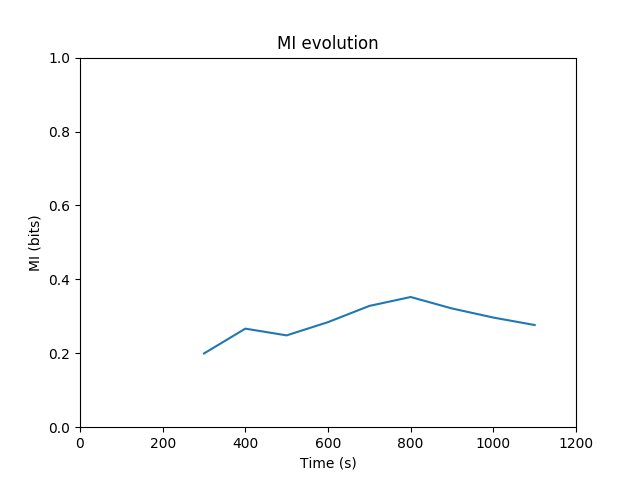

2018-04-12 14:46:27,822 - P13292 - MemTotal:1111M - Simulation - INFO: Running the simulation from 0.0s until time 300.0s
2018-04-12 14:46:27,848 - P13292 - MemTotal:1112M - Simulation - DEBUG: Running the simulation 0.062s until 0.062s
2018-04-12 14:46:28,751 - P13292 - MemTotal:1133M - Simulation - DEBUG: Simulation time is 0.901622056961 seconds. Real-time rate: 0.06876495480708691
2018-04-12 14:46:28,774 - P13292 - MemTotal:1133M - Simulation - DEBUG: Running the simulation 0.404s until 0.466s
2018-04-12 14:46:34,342 - P13292 - MemTotal:1139M - Simulation - DEBUG: Simulation time is 5.56487798691 seconds. Real-time rate: 0.072598177525268
2018-04-12 14:46:34,363 - P13292 - MemTotal:1139M - Simulation - DEBUG: Running the simulation 0.14399999999999996s until 0.61s
2018-04-12 14:46:36,310 - P13292 - MemTotal:1140M - Simulation - DEBUG: Simulation time is 1.94471096992 seconds. Real-time rate: 0.07404699321748512
2018-04-12 14:46:36,333 - P13292 - MemTotal:1140M - Simulation - DEBUG:

2018-04-12 14:47:39,849 - P13292 - MemTotal:1218M - Simulation - DEBUG: Simulation time is 0.101660966873 seconds. Real-time rate: 0.06885631934558317
2018-04-12 14:47:39,869 - P13292 - MemTotal:1218M - Simulation - DEBUG: Running the simulation 0.07699999999999996s until 5.276999999999999s
2018-04-12 14:47:40,886 - P13292 - MemTotal:1218M - Simulation - DEBUG: Simulation time is 1.01365709305 seconds. Real-time rate: 0.07596257208486429
2018-04-12 14:47:40,906 - P13292 - MemTotal:1218M - Simulation - DEBUG: Running the simulation 0.03200000000000003s until 5.308999999999999s
2018-04-12 14:47:41,355 - P13292 - MemTotal:1218M - Simulation - DEBUG: Simulation time is 0.446435213089 seconds. Real-time rate: 0.0716789336096151
2018-04-12 14:47:41,374 - P13292 - MemTotal:1218M - Simulation - DEBUG: Running the simulation 0.12100000000000044s until 5.43s
2018-04-12 14:47:43,031 - P13292 - MemTotal:1218M - Simulation - DEBUG: Simulation time is 1.65427112579 seconds. Real-time rate: 0.0731439

2018-04-12 14:49:55,880 - P13292 - MemTotal:1351M - Simulation - DEBUG: Running the simulation 0.18099999999999916s until 15.275s
2018-04-12 14:49:58,311 - P13292 - MemTotal:1352M - Simulation - DEBUG: Simulation time is 2.42816996574 seconds. Real-time rate: 0.07454173412631711
2018-04-12 14:49:58,332 - P13292 - MemTotal:1352M - Simulation - DEBUG: Running the simulation 0.13100000000000023s until 15.406s
2018-04-12 14:50:00,210 - P13292 - MemTotal:1354M - Simulation - DEBUG: Simulation time is 1.87574195862 seconds. Real-time rate: 0.06983903057566954
2018-04-12 14:50:00,230 - P13292 - MemTotal:1354M - Simulation - DEBUG: Running the simulation 0.38400000000000034s until 15.790000000000001s
2018-04-12 14:50:05,529 - P13292 - MemTotal:1357M - Simulation - DEBUG: Simulation time is 5.29551315308 seconds. Real-time rate: 0.07251421890566623
2018-04-12 14:50:05,550 - P13292 - MemTotal:1357M - Simulation - DEBUG: Running the simulation 0.35100000000000087s until 16.141000000000002s
2018-0

2018-04-12 14:51:23,359 - P13292 - MemTotal:1455M - Simulation - DEBUG: Simulation time is 4.25742006302 seconds. Real-time rate: 0.07351870272769388
2018-04-12 14:51:23,378 - P13292 - MemTotal:1455M - Simulation - DEBUG: Running the simulation 0.047999999999998266s until 21.538000000000007s
2018-04-12 14:51:24,042 - P13292 - MemTotal:1455M - Simulation - DEBUG: Simulation time is 0.660194158554 seconds. Real-time rate: 0.07270588413736553
2018-04-12 14:51:24,062 - P13292 - MemTotal:1455M - Simulation - DEBUG: Running the simulation 0.8460000000000001s until 22.384000000000007s
2018-04-12 14:51:35,504 - P13292 - MemTotal:1459M - Simulation - DEBUG: Simulation time is 11.4394688606 seconds. Real-time rate: 0.07395448252950515
2018-04-12 14:51:35,523 - P13292 - MemTotal:1459M - Simulation - DEBUG: Running the simulation 0.010000000000001563s until 22.39400000000001s
2018-04-12 14:51:35,666 - P13292 - MemTotal:1459M - Simulation - DEBUG: Simulation time is 0.14012503624 seconds. Real-time

2018-04-12 14:53:07,584 - P13292 - MemTotal:1495M - Simulation - DEBUG: Running the simulation 0.13599999999999923s until 29.279000000000018s
2018-04-12 14:53:09,446 - P13292 - MemTotal:1495M - Simulation - DEBUG: Simulation time is 1.85959601402 seconds. Real-time rate: 0.07313416407351461
2018-04-12 14:53:09,466 - P13292 - MemTotal:1495M - Simulation - DEBUG: Running the simulation 0.1980000000000004s until 29.477000000000018s
2018-04-12 14:53:12,188 - P13292 - MemTotal:1497M - Simulation - DEBUG: Simulation time is 2.71958589554 seconds. Real-time rate: 0.072805201823128
2018-04-12 14:53:12,208 - P13292 - MemTotal:1497M - Simulation - DEBUG: Running the simulation 0.20899999999999963s until 29.686000000000018s
2018-04-12 14:53:15,032 - P13292 - MemTotal:1498M - Simulation - DEBUG: Simulation time is 2.82163500786 seconds. Real-time rate: 0.07407052982328789
2018-04-12 14:53:15,052 - P13292 - MemTotal:1498M - Simulation - DEBUG: Running the simulation 0.4450000000000003s until 30.131

2018-04-12 14:54:47,187 - P13292 - MemTotal:1532M - Simulation - DEBUG: Simulation time is 9.19412207603 seconds. Real-time rate: 0.07363400163727127
2018-04-12 14:54:47,208 - P13292 - MemTotal:1532M - Simulation - DEBUG: Running the simulation 0.3149999999999977s until 36.74600000000004s
2018-04-12 14:54:51,508 - P13292 - MemTotal:1534M - Simulation - DEBUG: Simulation time is 4.29758810997 seconds. Real-time rate: 0.07329692654101043
2018-04-12 14:54:51,528 - P13292 - MemTotal:1534M - Simulation - DEBUG: Running the simulation 0.22099999999999653s until 36.967000000000034s
2018-04-12 14:54:54,535 - P13292 - MemTotal:1535M - Simulation - DEBUG: Simulation time is 3.00415897369 seconds. Real-time rate: 0.07356468214072566
2018-04-12 14:54:54,556 - P13292 - MemTotal:1536M - Simulation - DEBUG: Running the simulation 0.0020000000000024443s until 36.96900000000004s
2018-04-12 14:54:54,604 - P13292 - MemTotal:1536M - Simulation - DEBUG: Simulation time is 0.0452220439911 seconds. Real-time

2018-04-12 14:56:16,326 - P13292 - MemTotal:1688M - Simulation - DEBUG: Running the simulation 0.012999999999998124s until 42.91200000000003s
2018-04-12 14:56:16,512 - P13292 - MemTotal:1688M - Simulation - DEBUG: Simulation time is 0.183472156525 seconds. Real-time rate: 0.0708554379380773
2018-04-12 14:56:16,531 - P13292 - MemTotal:1688M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 42.989000000000026s
2018-04-12 14:56:17,612 - P13292 - MemTotal:1689M - Simulation - DEBUG: Simulation time is 1.07795786858 seconds. Real-time rate: 0.07143136317722035
2018-04-12 14:56:17,633 - P13292 - MemTotal:1689M - Simulation - DEBUG: Running the simulation 0.32399999999999807s until 43.313000000000024s
2018-04-12 14:56:22,022 - P13292 - MemTotal:1691M - Simulation - DEBUG: Simulation time is 4.38684678078 seconds. Real-time rate: 0.07385714983704371
2018-04-12 14:56:22,042 - P13292 - MemTotal:1691M - Simulation - DEBUG: Running the simulation 0.1910000000000025s until 43.

2018-04-12 14:57:48,033 - P13292 - MemTotal:1742M - Simulation - DEBUG: Simulation time is 3.92908906937 seconds. Real-time rate: 0.0730449208285004
2018-04-12 14:57:48,053 - P13292 - MemTotal:1742M - Simulation - DEBUG: Running the simulation 0.18999999999999773s until 49.79200000000002s
2018-04-12 14:57:50,615 - P13292 - MemTotal:1744M - Simulation - DEBUG: Simulation time is 2.55927395821 seconds. Real-time rate: 0.07423980515676049
2018-04-12 14:57:50,635 - P13292 - MemTotal:1744M - Simulation - DEBUG: Running the simulation 0.4350000000000023s until 50.227000000000025s
2018-04-12 14:57:56,525 - P13292 - MemTotal:1747M - Simulation - DEBUG: Simulation time is 5.88790392876 seconds. Real-time rate: 0.07388028155069722
2018-04-12 14:57:56,546 - P13292 - MemTotal:1747M - Simulation - DEBUG: Running the simulation 0.23499999999999943s until 50.462000000000025s
2018-04-12 14:57:59,744 - P13292 - MemTotal:1749M - Simulation - DEBUG: Simulation time is 3.19458818436 seconds. Real-time rat

2018-04-12 14:59:47,435 - P13292 - MemTotal:1813M - Simulation - DEBUG: Running the simulation 0.13400000000000034s until 58.49000000000001s
2018-04-12 14:59:49,255 - P13292 - MemTotal:1814M - Simulation - DEBUG: Simulation time is 1.81700491905 seconds. Real-time rate: 0.073747736505801
2018-04-12 14:59:49,274 - P13292 - MemTotal:1814M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 58.56200000000001s
2018-04-12 14:59:50,273 - P13292 - MemTotal:1814M - Simulation - DEBUG: Simulation time is 0.995640993118 seconds. Real-time rate: 0.07231522255276289
2018-04-12 14:59:50,292 - P13292 - MemTotal:1814M - Simulation - DEBUG: Running the simulation 0.1490000000000009s until 58.71100000000001s
2018-04-12 14:59:52,332 - P13292 - MemTotal:1816M - Simulation - DEBUG: Simulation time is 2.03816795349 seconds. Real-time rate: 0.07310486839162415
2018-04-12 14:59:52,353 - P13292 - MemTotal:1816M - Simulation - DEBUG: Running the simulation 0.8819999999999979s until 59.59300

2018-04-12 15:01:21,538 - P13292 - MemTotal:1869M - Simulation - DEBUG: Simulation time is 0.492165803909 seconds. Real-time rate: 0.06908241029738767
2018-04-12 15:01:21,558 - P13292 - MemTotal:1869M - Simulation - DEBUG: Running the simulation 0.7319999999999993s until 65.93600000000004s
2018-04-12 15:01:31,465 - P13292 - MemTotal:1875M - Simulation - DEBUG: Simulation time is 9.9039618969 seconds. Real-time rate: 0.07390981585151177
2018-04-12 15:01:31,484 - P13292 - MemTotal:1875M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 66.04200000000003s
2018-04-12 15:01:32,932 - P13292 - MemTotal:1876M - Simulation - DEBUG: Simulation time is 1.4449930191 seconds. Real-time rate: 0.07335675577569357
2018-04-12 15:01:32,952 - P13292 - MemTotal:1876M - Simulation - DEBUG: Running the simulation 0.659000000000006s until 66.70100000000004s
2018-04-12 15:01:41,944 - P13292 - MemTotal:1881M - Simulation - DEBUG: Simulation time is 8.98926615715 seconds. Real-time rate: 0

2018-04-12 15:03:29,408 - P13292 - MemTotal:1944M - Simulation - DEBUG: Running the simulation 0.4159999999999968s until 74.92400000000006s
2018-04-12 15:03:35,082 - P13292 - MemTotal:1947M - Simulation - DEBUG: Simulation time is 5.67090392113 seconds. Real-time rate: 0.0733569120171763
2018-04-12 15:03:35,101 - P13292 - MemTotal:1947M - Simulation - DEBUG: Running the simulation 0.3709999999999951s until 75.29500000000006s
2018-04-12 15:03:40,188 - P13292 - MemTotal:1950M - Simulation - DEBUG: Simulation time is 5.08392620087 seconds. Real-time rate: 0.07297509549543572
2018-04-12 15:03:40,207 - P13292 - MemTotal:1950M - Simulation - DEBUG: Running the simulation 1.1260000000000048s until 76.42100000000006s
2018-04-12 15:03:55,460 - P13292 - MemTotal:1959M - Simulation - DEBUG: Simulation time is 15.2509469986 seconds. Real-time rate: 0.07383148076664682
2018-04-12 15:03:55,480 - P13292 - MemTotal:1959M - Simulation - DEBUG: Running the simulation 0.09499999999999886s until 76.516000

2018-04-12 15:05:36,991 - P13292 - MemTotal:2018M - Simulation - DEBUG: Simulation time is 1.32451701164 seconds. Real-time rate: 0.07172425809933156
2018-04-12 15:05:37,011 - P13292 - MemTotal:2018M - Simulation - DEBUG: Running the simulation 0.04000000000000625s until 83.80000000000007s
2018-04-12 15:05:37,592 - P13292 - MemTotal:2019M - Simulation - DEBUG: Simulation time is 0.578790903091 seconds. Real-time rate: 0.0691095865300556
2018-04-12 15:05:37,611 - P13292 - MemTotal:2019M - Simulation - DEBUG: Running the simulation 0.6800000000000068s until 84.48000000000008s
2018-04-12 15:05:46,960 - P13292 - MemTotal:2025M - Simulation - DEBUG: Simulation time is 9.34620904922 seconds. Real-time rate: 0.07275677190811433
2018-04-12 15:05:46,981 - P13292 - MemTotal:2025M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 84.59300000000007s
2018-04-12 15:05:48,549 - P13292 - MemTotal:2025M - Simulation - DEBUG: Simulation time is 1.56546592712 seconds. Real-time rate

2018-04-12 15:07:01,811 - P13292 - MemTotal:2068M - Simulation - DEBUG: Running the simulation 0.31399999999999295s until 90.20000000000009s
2018-04-12 15:07:06,148 - P13292 - MemTotal:2071M - Simulation - DEBUG: Simulation time is 4.33477401733 seconds. Real-time rate: 0.07243745550387708
2018-04-12 15:07:06,169 - P13292 - MemTotal:2071M - Simulation - DEBUG: Running the simulation 0.06300000000000239s until 90.26300000000009s
2018-04-12 15:07:07,020 - P13292 - MemTotal:2071M - Simulation - DEBUG: Simulation time is 0.848769903183 seconds. Real-time rate: 0.07422506354636897
2018-04-12 15:07:07,041 - P13292 - MemTotal:2071M - Simulation - DEBUG: Running the simulation 0.06900000000000261s until 90.3320000000001s
2018-04-12 15:07:08,037 - P13292 - MemTotal:2072M - Simulation - DEBUG: Simulation time is 0.993397951126 seconds. Real-time rate: 0.06945856886636963
2018-04-12 15:07:08,057 - P13292 - MemTotal:2072M - Simulation - DEBUG: Running the simulation 0.23199999999999932s until 90.5

2018-04-12 15:08:20,790 - P13292 - MemTotal:2114M - Simulation - DEBUG: Simulation time is 2.29680299759 seconds. Real-time rate: 0.07358053789436508
2018-04-12 15:08:20,808 - P13292 - MemTotal:2114M - Simulation - DEBUG: Running the simulation 0.1560000000000059s until 95.7460000000001s
2018-04-12 15:08:22,975 - P13292 - MemTotal:2115M - Simulation - DEBUG: Simulation time is 2.16500902176 seconds. Real-time rate: 0.07205512699123007
2018-04-12 15:08:22,996 - P13292 - MemTotal:2115M - Simulation - DEBUG: Running the simulation 0.8160000000000025s until 96.5620000000001s
2018-04-12 15:08:34,069 - P13292 - MemTotal:2122M - Simulation - DEBUG: Simulation time is 11.0700440407 seconds. Real-time rate: 0.07371244387117028
2018-04-12 15:08:34,089 - P13292 - MemTotal:2122M - Simulation - DEBUG: Running the simulation 0.19599999999999795s until 96.7580000000001s
2018-04-12 15:08:36,777 - P13292 - MemTotal:2123M - Simulation - DEBUG: Simulation time is 2.68507599831 seconds. Real-time rate: 0.

2018-04-12 15:10:29,355 - P13292 - MemTotal:2161M - Simulation - DEBUG: Running the simulation 1.284000000000006s until 104.69000000000011s
2018-04-12 15:10:47,019 - P13292 - MemTotal:2172M - Simulation - DEBUG: Simulation time is 17.6605741978 seconds. Real-time rate: 0.07270431785633547
2018-04-12 15:10:47,040 - P13292 - MemTotal:2172M - Simulation - DEBUG: Running the simulation 0.39400000000000546s until 105.08400000000012s
2018-04-12 15:10:52,436 - P13292 - MemTotal:2175M - Simulation - DEBUG: Simulation time is 5.39256715775 seconds. Real-time rate: 0.07306353142660486
2018-04-12 15:10:52,457 - P13292 - MemTotal:2175M - Simulation - DEBUG: Running the simulation 0.07399999999999807s until 105.15800000000011s
2018-04-12 15:10:53,461 - P13292 - MemTotal:2175M - Simulation - DEBUG: Simulation time is 1.00140881538 seconds. Real-time rate: 0.07389589432726194
2018-04-12 15:10:53,483 - P13292 - MemTotal:2175M - Simulation - DEBUG: Running the simulation 0.08499999999999375s until 105.

2018-04-12 15:12:20,062 - P13292 - MemTotal:2225M - Simulation - DEBUG: Simulation time is 0.600896835327 seconds. Real-time rate: 0.07488806289935308
2018-04-12 15:12:20,082 - P13292 - MemTotal:2225M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 111.47000000000013s
2018-04-12 15:12:21,115 - P13292 - MemTotal:2226M - Simulation - DEBUG: Simulation time is 1.02999401093 seconds. Real-time rate: 0.06990331908369223
2018-04-12 15:12:21,137 - P13292 - MemTotal:2226M - Simulation - DEBUG: Running the simulation 0.41200000000000614s until 111.88200000000013s
2018-04-12 15:12:26,842 - P13292 - MemTotal:2229M - Simulation - DEBUG: Simulation time is 5.70199298859 seconds. Real-time rate: 0.07225543784860819
2018-04-12 15:12:26,863 - P13292 - MemTotal:2229M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 112.04300000000013s
2018-04-12 15:12:29,104 - P13292 - MemTotal:2231M - Simulation - DEBUG: Simulation time is 2.23872995377 seconds. Real-time

2018-04-12 15:13:53,998 - P13292 - MemTotal:2280M - Simulation - DEBUG: Running the simulation 0.16200000000000614s until 118.30700000000014s
2018-04-12 15:13:56,251 - P13292 - MemTotal:2281M - Simulation - DEBUG: Simulation time is 2.24996709824 seconds. Real-time rate: 0.07200105287184419
2018-04-12 15:13:56,272 - P13292 - MemTotal:2281M - Simulation - DEBUG: Running the simulation 0.15900000000000603s until 118.46600000000015s
2018-04-12 15:13:58,498 - P13292 - MemTotal:2283M - Simulation - DEBUG: Simulation time is 2.22252392769 seconds. Real-time rate: 0.07154028715693708
2018-04-12 15:13:58,520 - P13292 - MemTotal:2283M - Simulation - DEBUG: Running the simulation 0.13299999999999557s until 118.59900000000015s
2018-04-12 15:14:00,339 - P13292 - MemTotal:2284M - Simulation - DEBUG: Simulation time is 1.81632399559 seconds. Real-time rate: 0.07322482130000026
2018-04-12 15:14:00,360 - P13292 - MemTotal:2284M - Simulation - DEBUG: Running the simulation 0.15500000000000114s until 11

2018-04-12 15:15:23,753 - P13292 - MemTotal:2332M - Simulation - DEBUG: Simulation time is 2.21667695045 seconds. Real-time rate: 0.07353349344231695
2018-04-12 15:15:23,775 - P13292 - MemTotal:2332M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 124.92200000000014s
2018-04-12 15:15:28,268 - P13292 - MemTotal:2335M - Simulation - DEBUG: Simulation time is 4.49055695534 seconds. Real-time rate: 0.07281947501218584
2018-04-12 15:15:28,290 - P13292 - MemTotal:2335M - Simulation - DEBUG: Running the simulation 0.0030000000000001137s until 124.92500000000014s
2018-04-12 15:15:28,353 - P13292 - MemTotal:2335M - Simulation - DEBUG: Simulation time is 0.0597441196442 seconds. Real-time rate: 0.05021414689626465
2018-04-12 15:15:28,374 - P13292 - MemTotal:2335M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 125.05700000000014s
2018-04-12 15:15:30,190 - P13292 - MemTotal:2336M - Simulation - DEBUG: Simulation time is 1.81395506859 seconds. Real-time

2018-04-12 15:17:08,575 - P13292 - MemTotal:2393M - Simulation - DEBUG: Running the simulation 0.054000000000002046s until 132.17500000000018s
2018-04-12 15:17:09,363 - P13292 - MemTotal:2394M - Simulation - DEBUG: Simulation time is 0.785226821899 seconds. Real-time rate: 0.06876993818089333
2018-04-12 15:17:09,385 - P13292 - MemTotal:2394M - Simulation - DEBUG: Running the simulation 0.132000000000005s until 132.3070000000002s
2018-04-12 15:17:11,243 - P13292 - MemTotal:2395M - Simulation - DEBUG: Simulation time is 1.85475802422 seconds. Real-time rate: 0.0711683132120819
2018-04-12 15:17:11,264 - P13292 - MemTotal:2395M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 132.3930000000002s
2018-04-12 15:17:12,476 - P13292 - MemTotal:2395M - Simulation - DEBUG: Simulation time is 1.20834803581 seconds. Real-time rate: 0.07117154780840483
2018-04-12 15:17:12,497 - P13292 - MemTotal:2395M - Simulation - DEBUG: Running the simulation 0.02600000000001046s until 132.4

2018-04-12 15:18:14,341 - P13292 - MemTotal:2431M - Simulation - DEBUG: Simulation time is 1.07735085487 seconds. Real-time rate: 0.06868700169982266
2018-04-12 15:18:14,362 - P13292 - MemTotal:2431M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 136.99100000000033s
2018-04-12 15:18:16,722 - P13292 - MemTotal:2433M - Simulation - DEBUG: Simulation time is 2.35717606544 seconds. Real-time rate: 0.07127172317028184
2018-04-12 15:18:16,746 - P13292 - MemTotal:2433M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 137.06300000000033s
2018-04-12 15:18:17,747 - P13292 - MemTotal:2433M - Simulation - DEBUG: Simulation time is 0.998324155807 seconds. Real-time rate: 0.0721208633299727
2018-04-12 15:18:17,768 - P13292 - MemTotal:2433M - Simulation - DEBUG: Running the simulation 0.11699999999999022s until 137.18000000000032s
2018-04-12 15:18:19,384 - P13292 - MemTotal:2434M - Simulation - DEBUG: Simulation time is 1.6134622097 seconds. Real-time r

2018-04-12 15:20:10,327 - P13292 - MemTotal:2498M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 145.31700000000032s
2018-04-12 15:20:12,687 - P13292 - MemTotal:2499M - Simulation - DEBUG: Simulation time is 2.35652017593 seconds. Real-time rate: 0.07129156020632482
2018-04-12 15:20:12,708 - P13292 - MemTotal:2499M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 145.3320000000003s
2018-04-12 15:20:12,910 - P13292 - MemTotal:2499M - Simulation - DEBUG: Simulation time is 0.199265003204 seconds. Real-time rate: 0.0752766404475145
2018-04-12 15:20:12,931 - P13292 - MemTotal:2499M - Simulation - DEBUG: Running the simulation 0.2400000000000091s until 145.57200000000032s
2018-04-12 15:20:16,219 - P13292 - MemTotal:2502M - Simulation - DEBUG: Simulation time is 3.28572106361 seconds. Real-time rate: 0.07304332758424674
2018-04-12 15:20:16,240 - P13292 - MemTotal:2502M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 145

2018-04-12 15:22:10,469 - P13292 - MemTotal:2568M - Simulation - DEBUG: Simulation time is 5.61461496353 seconds. Real-time rate: 0.07266749414698283
2018-04-12 15:22:10,491 - P13292 - MemTotal:2568M - Simulation - DEBUG: Running the simulation 0.4410000000000025s until 154.1720000000003s
2018-04-12 15:22:16,579 - P13292 - MemTotal:2571M - Simulation - DEBUG: Simulation time is 6.08545303345 seconds. Real-time rate: 0.07246789969064742
2018-04-12 15:22:16,600 - P13292 - MemTotal:2571M - Simulation - DEBUG: Running the simulation 0.2009999999999934s until 154.3730000000003s
2018-04-12 15:22:19,369 - P13292 - MemTotal:2573M - Simulation - DEBUG: Simulation time is 2.76590490341 seconds. Real-time rate: 0.0726706112535001
2018-04-12 15:22:19,389 - P13292 - MemTotal:2573M - Simulation - DEBUG: Running the simulation 0.12899999999999068s until 154.5020000000003s
2018-04-12 15:22:21,168 - P13292 - MemTotal:2574M - Simulation - DEBUG: Simulation time is 1.77536487579 seconds. Real-time rate: 

2018-04-12 15:24:06,659 - P13292 - MemTotal:2634M - Simulation - DEBUG: Running the simulation 0.30299999999999727s until 162.2990000000002s
2018-04-12 15:24:10,911 - P13292 - MemTotal:2637M - Simulation - DEBUG: Simulation time is 4.24921298027 seconds. Real-time rate: 0.07130732241637763
2018-04-12 15:24:10,933 - P13292 - MemTotal:2637M - Simulation - DEBUG: Running the simulation 0.125s until 162.4240000000002s
2018-04-12 15:24:12,700 - P13292 - MemTotal:2638M - Simulation - DEBUG: Simulation time is 1.7636590004 seconds. Real-time rate: 0.0708753789547082
2018-04-12 15:24:12,722 - P13292 - MemTotal:2638M - Simulation - DEBUG: Running the simulation 0.5260000000000105s until 162.95000000000022s
2018-04-12 15:24:20,098 - P13292 - MemTotal:2643M - Simulation - DEBUG: Simulation time is 7.37337803841 seconds. Real-time rate: 0.07133772298940694
2018-04-12 15:24:20,120 - P13292 - MemTotal:2643M - Simulation - DEBUG: Running the simulation 0.23799999999999955s until 163.18800000000022s
2

2018-04-12 15:25:19,393 - P13292 - MemTotal:2676M - Simulation - DEBUG: Simulation time is 3.64380598068 seconds. Real-time rate: 0.07080508714453954
2018-04-12 15:25:19,414 - P13292 - MemTotal:2676M - Simulation - DEBUG: Running the simulation 0.563999999999993s until 167.7100000000002s
2018-04-12 15:25:27,299 - P13292 - MemTotal:2681M - Simulation - DEBUG: Simulation time is 7.8814201355 seconds. Real-time rate: 0.0715607073729933
2018-04-12 15:25:27,319 - P13292 - MemTotal:2681M - Simulation - DEBUG: Running the simulation 0.5109999999999957s until 168.2210000000002s
2018-04-12 15:25:34,488 - P13292 - MemTotal:2685M - Simulation - DEBUG: Simulation time is 7.16567993164 seconds. Real-time rate: 0.07131214411958799
2018-04-12 15:25:34,509 - P13292 - MemTotal:2685M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 168.3030000000002s
2018-04-12 15:25:35,626 - P13292 - MemTotal:2685M - Simulation - DEBUG: Simulation time is 1.11393499374 seconds. Real-time rate: 0.

2018-04-12 15:27:19,906 - P13292 - MemTotal:2745M - Simulation - DEBUG: Running the simulation 0.8269999999999982s until 176.6010000000002s
2018-04-12 15:27:31,359 - P13292 - MemTotal:2753M - Simulation - DEBUG: Simulation time is 11.4506049156 seconds. Real-time rate: 0.07222325860461316
2018-04-12 15:27:31,381 - P13292 - MemTotal:2753M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 176.7210000000002s
2018-04-12 15:27:33,095 - P13292 - MemTotal:2754M - Simulation - DEBUG: Simulation time is 1.71086502075 seconds. Real-time rate: 0.070139957591314
2018-04-12 15:27:33,116 - P13292 - MemTotal:2754M - Simulation - DEBUG: Running the simulation 0.2189999999999941s until 176.9400000000002s
2018-04-12 15:27:36,151 - P13292 - MemTotal:2755M - Simulation - DEBUG: Simulation time is 3.03202104568 seconds. Real-time rate: 0.07222905009570295
2018-04-12 15:27:36,171 - P13292 - MemTotal:2755M - Simulation - DEBUG: Running the simulation 0.03200000000001069s until 176.97200

2018-04-12 15:28:58,811 - P13292 - MemTotal:2803M - Simulation - DEBUG: Simulation time is 2.12151312828 seconds. Real-time rate: 0.07070425254524433
2018-04-12 15:28:58,833 - P13292 - MemTotal:2803M - Simulation - DEBUG: Running the simulation 0.06299999999998818s until 182.89300000000017s
2018-04-12 15:28:59,680 - P13292 - MemTotal:2803M - Simulation - DEBUG: Simulation time is 0.843945026398 seconds. Real-time rate: 0.0746494120226022
2018-04-12 15:28:59,705 - P13292 - MemTotal:2803M - Simulation - DEBUG: Running the simulation 0.561000000000007s until 183.45400000000018s
2018-04-12 15:29:07,547 - P13292 - MemTotal:2808M - Simulation - DEBUG: Simulation time is 7.83901715279 seconds. Real-time rate: 0.07156509407567867
2018-04-12 15:29:07,569 - P13292 - MemTotal:2808M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 183.45900000000017s
2018-04-12 15:29:07,645 - P13292 - MemTotal:2808M - Simulation - DEBUG: Simulation time is 0.0724840164185 seconds. Real-tim

2018-04-12 15:30:55,358 - P13292 - MemTotal:2869M - Simulation - DEBUG: Running the simulation 0.0800000000000125s until 191.23000000000022s
2018-04-12 15:30:56,494 - P13292 - MemTotal:2870M - Simulation - DEBUG: Simulation time is 1.13356399536 seconds. Real-time rate: 0.07057387172438569
2018-04-12 15:30:56,516 - P13292 - MemTotal:2870M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 191.30700000000022s
2018-04-12 15:30:57,633 - P13292 - MemTotal:2871M - Simulation - DEBUG: Simulation time is 1.11459088326 seconds. Real-time rate: 0.06908364419340178
2018-04-12 15:30:57,654 - P13292 - MemTotal:2871M - Simulation - DEBUG: Running the simulation 0.0800000000000125s until 191.38700000000023s
2018-04-12 15:30:58,751 - P13292 - MemTotal:2872M - Simulation - DEBUG: Simulation time is 1.0939540863 seconds. Real-time rate: 0.07312921172982607
2018-04-12 15:30:58,773 - P13292 - MemTotal:2872M - Simulation - DEBUG: Running the simulation 0.3640000000000043s until 191.75

2018-04-12 15:32:47,679 - P13292 - MemTotal:2934M - Simulation - DEBUG: Simulation time is 0.159720897675 seconds. Real-time rate: 0.07513105783096126
2018-04-12 15:32:47,700 - P13292 - MemTotal:2934M - Simulation - DEBUG: Running the simulation 0.09399999999999409s until 199.22900000000024s
2018-04-12 15:32:49,064 - P13292 - MemTotal:2935M - Simulation - DEBUG: Simulation time is 1.3612101078 seconds. Real-time rate: 0.06905620187590787
2018-04-12 15:32:49,085 - P13292 - MemTotal:2935M - Simulation - DEBUG: Running the simulation 0.42500000000001137s until 199.65400000000025s
2018-04-12 15:32:54,962 - P13292 - MemTotal:2938M - Simulation - DEBUG: Simulation time is 5.87386393547 seconds. Real-time rate: 0.07235441689984648
2018-04-12 15:32:54,982 - P13292 - MemTotal:2938M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 199.69600000000025s
2018-04-12 15:32:55,617 - P13292 - MemTotal:2939M - Simulation - DEBUG: Simulation time is 0.631795167923 seconds. Real-time

2018-04-12 15:34:13,521 - P13292 - MemTotal:2971M - Simulation - DEBUG: Running the simulation 0.3050000000000068s until 203.9050000000003s
2018-04-12 15:34:17,753 - P13292 - MemTotal:2973M - Simulation - DEBUG: Simulation time is 4.22901010513 seconds. Real-time rate: 0.0721208964787779
2018-04-12 15:34:17,774 - P13292 - MemTotal:2973M - Simulation - DEBUG: Running the simulation 0.37000000000000455s until 204.27500000000032s
2018-04-12 15:34:22,975 - P13292 - MemTotal:2976M - Simulation - DEBUG: Simulation time is 5.19793510437 seconds. Real-time rate: 0.07118211223701704
2018-04-12 15:34:22,996 - P13292 - MemTotal:2976M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 204.41900000000032s
2018-04-12 15:34:25,044 - P13292 - MemTotal:2977M - Simulation - DEBUG: Simulation time is 2.04515194893 seconds. Real-time rate: 0.0704104162409188
2018-04-12 15:34:25,069 - P13292 - MemTotal:2977M - Simulation - DEBUG: Running the simulation 0.056000000000011596s until 204.4

2018-04-12 15:36:11,931 - P13292 - MemTotal:3038M - Simulation - DEBUG: Simulation time is 3.09308600426 seconds. Real-time rate: 0.07047977317796617
2018-04-12 15:36:11,952 - P13292 - MemTotal:3038M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 212.2890000000004s
2018-04-12 15:36:16,101 - P13292 - MemTotal:3041M - Simulation - DEBUG: Simulation time is 4.14604592323 seconds. Real-time rate: 0.07187571134466
2018-04-12 15:36:16,122 - P13292 - MemTotal:3041M - Simulation - DEBUG: Running the simulation 0.5999999999999943s until 212.8890000000004s
2018-04-12 15:36:24,580 - P13292 - MemTotal:3045M - Simulation - DEBUG: Simulation time is 8.45447611809 seconds. Real-time rate: 0.0709683239528391
2018-04-12 15:36:24,601 - P13292 - MemTotal:3045M - Simulation - DEBUG: Running the simulation 0.0589999999999975s until 212.9480000000004s
2018-04-12 15:36:25,482 - P13292 - MemTotal:3046M - Simulation - DEBUG: Simulation time is 0.877465009689 seconds. Real-time rate: 0.0

2018-04-12 15:37:48,453 - P13292 - MemTotal:3094M - Simulation - DEBUG: Running the simulation 0.14799999999999613s until 218.9490000000004s
2018-04-12 15:37:50,584 - P13292 - MemTotal:3094M - Simulation - DEBUG: Simulation time is 2.12815785408 seconds. Real-time rate: 0.06954371345915147
2018-04-12 15:37:50,605 - P13292 - MemTotal:3094M - Simulation - DEBUG: Running the simulation 0.10499999999998977s until 219.0540000000004s
2018-04-12 15:37:52,072 - P13292 - MemTotal:3095M - Simulation - DEBUG: Simulation time is 1.46338677406 seconds. Real-time rate: 0.0717513659826623
2018-04-12 15:37:52,093 - P13292 - MemTotal:3095M - Simulation - DEBUG: Running the simulation 0.2220000000000084s until 219.2760000000004s
2018-04-12 15:37:55,195 - P13292 - MemTotal:3097M - Simulation - DEBUG: Simulation time is 3.09946084023 seconds. Real-time rate: 0.07162536048814121
2018-04-12 15:37:55,218 - P13292 - MemTotal:3097M - Simulation - DEBUG: Running the simulation 0.030000000000001137s until 219.30

2018-04-12 15:39:08,914 - P13292 - MemTotal:3140M - Simulation - DEBUG: Simulation time is 5.01781511307 seconds. Real-time rate: 0.0715450832504937
2018-04-12 15:39:08,937 - P13292 - MemTotal:3140M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 224.58200000000045s
2018-04-12 15:39:10,574 - P13292 - MemTotal:3141M - Simulation - DEBUG: Simulation time is 1.63463306427 seconds. Real-time rate: 0.0703521802621586
2018-04-12 15:39:10,595 - P13292 - MemTotal:3141M - Simulation - DEBUG: Running the simulation 0.3580000000000041s until 224.94000000000045s
2018-04-12 15:39:15,622 - P13292 - MemTotal:3143M - Simulation - DEBUG: Simulation time is 5.02412486076 seconds. Real-time rate: 0.07125619086337684
2018-04-12 15:39:15,643 - P13292 - MemTotal:3143M - Simulation - DEBUG: Running the simulation 0.2539999999999907s until 225.19400000000044s
2018-04-12 15:39:19,247 - P13292 - MemTotal:3146M - Simulation - DEBUG: Simulation time is 3.60010290146 seconds. Real-time rate:

2018-04-12 15:40:43,300 - P13292 - MemTotal:3193M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 231.1740000000004s
2018-04-12 15:40:44,264 - P13292 - MemTotal:3193M - Simulation - DEBUG: Simulation time is 0.961146831512 seconds. Real-time rate: 0.07282966317419147
2018-04-12 15:40:44,285 - P13292 - MemTotal:3193M - Simulation - DEBUG: Running the simulation 0.0519999999999925s until 231.2260000000004s
2018-04-12 15:40:45,057 - P13292 - MemTotal:3194M - Simulation - DEBUG: Simulation time is 0.768832921982 seconds. Real-time rate: 0.06763498090840428
2018-04-12 15:40:45,078 - P13292 - MemTotal:3194M - Simulation - DEBUG: Running the simulation 0.17099999999999227s until 231.3970000000004s
2018-04-12 15:40:47,466 - P13292 - MemTotal:3195M - Simulation - DEBUG: Simulation time is 2.38562297821 seconds. Real-time rate: 0.07167939006366637
2018-04-12 15:40:47,498 - P13292 - MemTotal:3195M - Simulation - DEBUG: Running the simulation 0.06800000000001205s until 231.

2018-04-12 15:42:22,108 - P13292 - MemTotal:3249M - Simulation - DEBUG: Simulation time is 3.13829517365 seconds. Real-time rate: 0.0713763325646075
2018-04-12 15:42:22,130 - P13292 - MemTotal:3249M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 238.36700000000042s
2018-04-12 15:42:26,317 - P13292 - MemTotal:3251M - Simulation - DEBUG: Simulation time is 4.18374204636 seconds. Real-time rate: 0.07122810075242156
2018-04-12 15:42:26,338 - P13292 - MemTotal:3251M - Simulation - DEBUG: Running the simulation 0.003999999999990678s until 238.3710000000004s
2018-04-12 15:42:26,399 - P13292 - MemTotal:3251M - Simulation - DEBUG: Simulation time is 0.058130979538 seconds. Real-time rate: 0.06881012554378822
2018-04-12 15:42:26,421 - P13292 - MemTotal:3251M - Simulation - DEBUG: Running the simulation 0.242999999999995s until 238.6140000000004s
2018-04-12 15:42:29,828 - P13292 - MemTotal:3254M - Simulation - DEBUG: Simulation time is 3.40363693237 seconds. Real-time rate

2018-04-12 15:44:50,110 - P13292 - MemTotal:3334M - Simulation - DEBUG: Running the simulation 0.5449999999999875s until 249.07400000000038s
2018-04-12 15:44:57,796 - P13292 - MemTotal:3338M - Simulation - DEBUG: Simulation time is 7.68236112595 seconds. Real-time rate: 0.0709417314631735
2018-04-12 15:44:57,817 - P13292 - MemTotal:3338M - Simulation - DEBUG: Running the simulation 0.257000000000005s until 249.3310000000004s
2018-04-12 15:45:01,467 - P13292 - MemTotal:3340M - Simulation - DEBUG: Simulation time is 3.64721918106 seconds. Real-time rate: 0.07046464367552946
2018-04-12 15:45:01,488 - P13292 - MemTotal:3340M - Simulation - DEBUG: Running the simulation 0.27600000000001046s until 249.6070000000004s
2018-04-12 15:45:05,411 - P13292 - MemTotal:3342M - Simulation - DEBUG: Simulation time is 3.91963195801 seconds. Real-time rate: 0.0704147743861875
2018-04-12 15:45:05,432 - P13292 - MemTotal:3342M - Simulation - DEBUG: Running the simulation 0.18700000000001182s until 249.79400

2018-04-12 15:46:24,544 - P13292 - MemTotal:3387M - Simulation - DEBUG: Simulation time is 1.10199785233 seconds. Real-time rate: 0.0716879800022311
2018-04-12 15:46:24,565 - P13292 - MemTotal:3387M - Simulation - DEBUG: Running the simulation 0.11600000000001387s until 255.2720000000004s
2018-04-12 15:46:26,239 - P13292 - MemTotal:3388M - Simulation - DEBUG: Simulation time is 1.67060995102 seconds. Real-time rate: 0.06943571713387613
2018-04-12 15:46:26,260 - P13292 - MemTotal:3388M - Simulation - DEBUG: Running the simulation 0.10200000000000387s until 255.3740000000004s
2018-04-12 15:46:27,750 - P13292 - MemTotal:3388M - Simulation - DEBUG: Simulation time is 1.48672986031 seconds. Real-time rate: 0.06860694919992043
2018-04-12 15:46:27,771 - P13292 - MemTotal:3388M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 255.50900000000038s
2018-04-12 15:46:29,687 - P13292 - MemTotal:3390M - Simulation - DEBUG: Simulation time is 1.91239213943 seconds. Real-time rate

2018-04-12 15:48:22,376 - P13292 - MemTotal:3453M - Simulation - DEBUG: Running the simulation 0.29700000000002547s until 263.71500000000043s
2018-04-12 15:48:26,605 - P13292 - MemTotal:3456M - Simulation - DEBUG: Simulation time is 4.22486996651 seconds. Real-time rate: 0.07029802156149657
2018-04-12 15:48:26,625 - P13292 - MemTotal:3456M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 264.00300000000044s
2018-04-12 15:48:30,629 - P13292 - MemTotal:3458M - Simulation - DEBUG: Simulation time is 4.00068092346 seconds. Real-time rate: 0.07198774546378858
2018-04-12 15:48:30,650 - P13292 - MemTotal:3458M - Simulation - DEBUG: Running the simulation 0.3109999999999786s until 264.3140000000004s
2018-04-12 15:48:35,082 - P13292 - MemTotal:3461M - Simulation - DEBUG: Simulation time is 4.42920398712 seconds. Real-time rate: 0.07021577712479415
2018-04-12 15:48:35,104 - P13292 - MemTotal:3461M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 264.3

2018-04-12 15:50:52,345 - P13292 - MemTotal:3538M - Simulation - DEBUG: Simulation time is 1.4714550972 seconds. Real-time rate: 0.07067833751637499
2018-04-12 15:50:52,367 - P13292 - MemTotal:3538M - Simulation - DEBUG: Running the simulation 0.17099999999999227s until 274.1080000000005s
2018-04-12 15:50:54,806 - P13292 - MemTotal:3539M - Simulation - DEBUG: Simulation time is 2.43610787392 seconds. Real-time rate: 0.07019393592167529
2018-04-12 15:50:54,828 - P13292 - MemTotal:3539M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 274.2210000000005s
2018-04-12 15:50:56,457 - P13292 - MemTotal:3540M - Simulation - DEBUG: Simulation time is 1.62695097923 seconds. Real-time rate: 0.06945507359618561
2018-04-12 15:50:56,479 - P13292 - MemTotal:3540M - Simulation - DEBUG: Running the simulation 0.06400000000002137s until 274.28500000000054s
2018-04-12 15:50:57,377 - P13292 - MemTotal:3541M - Simulation - DEBUG: Simulation time is 0.895946979523 seconds. Real-time ra

2018-04-12 15:52:33,438 - P13292 - MemTotal:3595M - Simulation - DEBUG: Running the simulation 0.12299999999999045s until 281.1070000000005s
2018-04-12 15:52:35,205 - P13292 - MemTotal:3596M - Simulation - DEBUG: Simulation time is 1.76412510872 seconds. Real-time rate: 0.06972294617433027
2018-04-12 15:52:35,226 - P13292 - MemTotal:3596M - Simulation - DEBUG: Running the simulation 0.23500000000001364s until 281.3420000000005s
2018-04-12 15:52:38,598 - P13292 - MemTotal:3598M - Simulation - DEBUG: Simulation time is 3.36899495125 seconds. Real-time rate: 0.06975374062610251
2018-04-12 15:52:38,620 - P13292 - MemTotal:3598M - Simulation - DEBUG: Running the simulation 0.11200000000002319s until 281.4540000000005s
2018-04-12 15:52:40,237 - P13292 - MemTotal:3599M - Simulation - DEBUG: Simulation time is 1.61470413208 seconds. Real-time rate: 0.06936255241741635
2018-04-12 15:52:40,259 - P13292 - MemTotal:3599M - Simulation - DEBUG: Running the simulation 0.10700000000002774s until 281.5

2018-04-12 15:54:11,528 - P13292 - MemTotal:3651M - Simulation - DEBUG: Simulation time is 10.6260099411 seconds. Real-time rate: 0.07020509148165542
2018-04-12 15:54:11,550 - P13292 - MemTotal:3651M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 288.0560000000004s
2018-04-12 15:54:14,974 - P13292 - MemTotal:3652M - Simulation - DEBUG: Simulation time is 3.42103481293 seconds. Real-time rate: 0.07044652076889307
2018-04-12 15:54:14,995 - P13292 - MemTotal:3652M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 288.1690000000004s
2018-04-12 15:54:16,606 - P13292 - MemTotal:3653M - Simulation - DEBUG: Simulation time is 1.60757398605 seconds. Real-time rate: 0.07029225465224792
2018-04-12 15:54:16,626 - P13292 - MemTotal:3653M - Simulation - DEBUG: Running the simulation 0.02199999999999136s until 288.1910000000004s
2018-04-12 15:54:16,968 - P13292 - MemTotal:3653M - Simulation - DEBUG: Simulation time is 0.33909201622 seconds. Real-time rat

2018-04-12 15:55:59,426 - P13292 - MemTotal:3710M - Simulation - DEBUG: Running the simulation 0.18999999999999773s until 295.4820000000003s
2018-04-12 15:56:02,196 - P13292 - MemTotal:3712M - Simulation - DEBUG: Simulation time is 2.76688408852 seconds. Real-time rate: 0.06866930233491884
2018-04-12 15:56:02,217 - P13292 - MemTotal:3712M - Simulation - DEBUG: Running the simulation 0.3480000000000132s until 295.8300000000003s
2018-04-12 15:56:07,228 - P13292 - MemTotal:3715M - Simulation - DEBUG: Simulation time is 5.00808596611 seconds. Real-time rate: 0.06948762508370121
2018-04-12 15:56:07,250 - P13292 - MemTotal:3715M - Simulation - DEBUG: Running the simulation 0.37999999999999545s until 296.2100000000003s
2018-04-12 15:56:12,689 - P13292 - MemTotal:3718M - Simulation - DEBUG: Simulation time is 5.43656015396 seconds. Real-time rate: 0.06989713885960044
2018-04-12 15:56:12,710 - P13292 - MemTotal:3718M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 296.27

2018-04-12 15:57:31,956 - P13292 - MemTotal:3855M - Simulation - INFO: [[0.15022936 0.17545872 0.13130734 0.13933486 0.17316514 0.1565367
  0.10779817 0.16399083 0.18864679 0.14220183 0.12041284 0.13016055
  0.1462156  0.16341743 0.18520642 0.12844037 0.1662844  0.16456422
  0.15022936 0.14392202 0.16284404 0.17775229 0.19036697 0.12786697
  0.125      0.12098624 0.15080275 0.13761468 0.11983945 0.17087156
  0.19094037 0.13761468 0.17832569 0.10665138 0.14105505 0.12844037
  0.12385321 0.16055046 0.14678899 0.14506881 0.14392202 0.16513761
  0.18463303 0.1141055  0.11123853 0.13818807 0.14965596 0.14793578
  0.13302752 0.13933486 0.18176606 0.15194954 0.18520642 0.12844037
  0.18635321 0.14736239 0.16857798 0.17488532 0.14162844 0.11009174
  0.1559633  0.12844037 0.1353211  0.12098624 0.17144495 0.15883028
  0.16915138 0.14908257 0.15538991 0.12672018 0.14793578 0.20470183]]
2018-04-12 15:57:31,959 - P13292 - MemTotal:3855M - Simulation - DEBUG: Shannon entropy of the patterns: [0.8462

0.19948490602006594


2018-04-12 15:57:33,000 - P13292 - MemTotal:3855M - Simulation - INFO: Running the simulation from 300.0s until time 400.0s
2018-04-12 15:57:33,029 - P13292 - MemTotal:3855M - Simulation - DEBUG: Running the simulation 0.186000000000206s until 300.1860000000002s
2018-04-12 15:57:35,811 - P13292 - MemTotal:3857M - Simulation - DEBUG: Simulation time is 2.77799201012 seconds. Real-time rate: 0.06695483619925911
2018-04-12 15:57:35,832 - P13292 - MemTotal:3857M - Simulation - DEBUG: Running the simulation 0.6309999999999718s until 300.8170000000002s
2018-04-12 15:57:44,870 - P13292 - MemTotal:3862M - Simulation - DEBUG: Simulation time is 9.03475499153 seconds. Real-time rate: 0.06984140694367835
2018-04-12 15:57:44,892 - P13292 - MemTotal:3862M - Simulation - DEBUG: Running the simulation 0.4900000000000091s until 301.3070000000002s
2018-04-12 15:57:51,958 - P13292 - MemTotal:3865M - Simulation - DEBUG: Simulation time is 7.06366300583 seconds. Real-time rate: 0.06936910772720421
2018-04

2018-04-12 15:59:03,852 - P13292 - MemTotal:3906M - Simulation - DEBUG: Running the simulation 0.6669999999999732s until 306.9370000000001s
2018-04-12 15:59:13,464 - P13292 - MemTotal:3912M - Simulation - DEBUG: Simulation time is 9.60908508301 seconds. Real-time rate: 0.06941347633391862
2018-04-12 15:59:13,485 - P13292 - MemTotal:3912M - Simulation - DEBUG: Running the simulation 0.19999999999998863s until 307.1370000000001s
2018-04-12 15:59:16,325 - P13292 - MemTotal:3913M - Simulation - DEBUG: Simulation time is 2.83650493622 seconds. Real-time rate: 0.07050930793254194
2018-04-12 15:59:16,346 - P13292 - MemTotal:3913M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 307.4740000000001s
2018-04-12 15:59:21,239 - P13292 - MemTotal:3916M - Simulation - DEBUG: Simulation time is 4.88972616196 seconds. Real-time rate: 0.06892001491247667
2018-04-12 15:59:21,264 - P13292 - MemTotal:3916M - Simulation - DEBUG: Running the simulation 0.04099999999999682s until 307.515

2018-04-12 16:00:20,474 - P13292 - MemTotal:3948M - Simulation - DEBUG: Simulation time is 1.1514480114 seconds. Real-time rate: 0.07034620686143797
2018-04-12 16:00:20,495 - P13292 - MemTotal:3948M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 311.63900000000007s
2018-04-12 16:00:21,742 - P13292 - MemTotal:3949M - Simulation - DEBUG: Simulation time is 1.24432992935 seconds. Real-time rate: 0.06991714813555029
2018-04-12 16:00:21,763 - P13292 - MemTotal:3949M - Simulation - DEBUG: Running the simulation 0.20499999999998408s until 311.84400000000005s
2018-04-12 16:00:24,759 - P13292 - MemTotal:3951M - Simulation - DEBUG: Simulation time is 2.99310898781 seconds. Real-time rate: 0.0684906566499939
2018-04-12 16:00:24,781 - P13292 - MemTotal:3951M - Simulation - DEBUG: Running the simulation 0.21699999999998454s until 312.06100000000004s
2018-04-12 16:00:27,897 - P13292 - MemTotal:3953M - Simulation - DEBUG: Simulation time is 3.11347198486 seconds. Real-time ra

2018-04-12 16:01:41,267 - P13292 - MemTotal:3993M - Simulation - DEBUG: Running the simulation 0.6449999999999818s until 317.7030000000001s
2018-04-12 16:01:50,717 - P13292 - MemTotal:3998M - Simulation - DEBUG: Simulation time is 9.44678783417 seconds. Real-time rate: 0.06827717646702329
2018-04-12 16:01:50,738 - P13292 - MemTotal:3998M - Simulation - DEBUG: Running the simulation 0.4049999999999727s until 318.10800000000006s
2018-04-12 16:01:56,511 - P13292 - MemTotal:4002M - Simulation - DEBUG: Simulation time is 5.76989912987 seconds. Real-time rate: 0.07019186832981418
2018-04-12 16:01:56,532 - P13292 - MemTotal:4002M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 318.1120000000001s
2018-04-12 16:01:56,597 - P13292 - MemTotal:4002M - Simulation - DEBUG: Simulation time is 0.0614941120148 seconds. Real-time rate: 0.06504687796871225
2018-04-12 16:01:56,622 - P13292 - MemTotal:4002M - Simulation - DEBUG: Running the simulation 0.45299999999997453s until 318

2018-04-12 16:03:33,532 - P13292 - MemTotal:4056M - Simulation - DEBUG: Simulation time is 8.33506298065 seconds. Real-time rate: 0.07054535776933468
2018-04-12 16:03:33,553 - P13292 - MemTotal:4056M - Simulation - DEBUG: Running the simulation 0.03300000000001546s until 324.8220000000001s
2018-04-12 16:03:34,082 - P13292 - MemTotal:4056M - Simulation - DEBUG: Simulation time is 0.526051044464 seconds. Real-time rate: 0.06273155494564712
2018-04-12 16:03:34,113 - P13292 - MemTotal:4056M - Simulation - DEBUG: Running the simulation 0.03500000000002501s until 324.85700000000014s
2018-04-12 16:03:34,639 - P13292 - MemTotal:4056M - Simulation - DEBUG: Simulation time is 0.521911859512 seconds. Real-time rate: 0.0670611318024633
2018-04-12 16:03:34,660 - P13292 - MemTotal:4056M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 324.91200000000015s
2018-04-12 16:03:35,454 - P13292 - MemTotal:4056M - Simulation - DEBUG: Simulation time is 0.79140496254 seconds. Real-time 

2018-04-12 16:05:21,484 - P13292 - MemTotal:4116M - Simulation - DEBUG: Running the simulation 0.2389999999999759s until 332.48600000000005s
2018-04-12 16:05:24,901 - P13292 - MemTotal:4118M - Simulation - DEBUG: Simulation time is 3.41322994232 seconds. Real-time rate: 0.07002165222932541
2018-04-12 16:05:24,922 - P13292 - MemTotal:4118M - Simulation - DEBUG: Running the simulation 0.06900000000001683s until 332.55500000000006s
2018-04-12 16:05:25,924 - P13292 - MemTotal:4118M - Simulation - DEBUG: Simulation time is 0.998675823212 seconds. Real-time rate: 0.06909148934648059
2018-04-12 16:05:25,945 - P13292 - MemTotal:4118M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 332.6480000000001s
2018-04-12 16:05:27,247 - P13292 - MemTotal:4119M - Simulation - DEBUG: Simulation time is 1.29880905151 seconds. Real-time rate: 0.0716040590351851
2018-04-12 16:05:27,268 - P13292 - MemTotal:4119M - Simulation - DEBUG: Running the simulation 0.27499999999997726s until 332.

2018-04-12 16:06:55,723 - P13292 - MemTotal:4168M - Simulation - DEBUG: Simulation time is 4.48745679855 seconds. Real-time rate: 0.0708641919633613
2018-04-12 16:06:55,744 - P13292 - MemTotal:4168M - Simulation - DEBUG: Running the simulation 0.5029999999999859s until 339.278s
2018-04-12 16:07:02,937 - P13292 - MemTotal:4173M - Simulation - DEBUG: Simulation time is 7.1893248558 seconds. Real-time rate: 0.06996484511252526
2018-04-12 16:07:02,958 - P13292 - MemTotal:4173M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 339.38300000000004s
2018-04-12 16:07:04,496 - P13292 - MemTotal:4174M - Simulation - DEBUG: Simulation time is 1.53482484818 seconds. Real-time rate: 0.06841171494250059
2018-04-12 16:07:04,517 - P13292 - MemTotal:4174M - Simulation - DEBUG: Running the simulation 0.14100000000001955s until 339.52400000000006s
2018-04-12 16:07:06,520 - P13292 - MemTotal:4175M - Simulation - DEBUG: Simulation time is 1.99912285805 seconds. Real-time rate: 0.070530

2018-04-12 16:08:38,669 - P13292 - MemTotal:4226M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 346.11s
2018-04-12 16:08:41,882 - P13292 - MemTotal:4228M - Simulation - DEBUG: Simulation time is 3.20938301086 seconds. Real-time rate: 0.06917217398125299
2018-04-12 16:08:41,905 - P13292 - MemTotal:4228M - Simulation - DEBUG: Running the simulation 0.06099999999997863s until 346.171s
2018-04-12 16:08:42,764 - P13292 - MemTotal:4228M - Simulation - DEBUG: Simulation time is 0.856984138489 seconds. Real-time rate: 0.07117984716443852
2018-04-12 16:08:42,785 - P13292 - MemTotal:4228M - Simulation - DEBUG: Running the simulation 0.0020000000000095497s until 346.173s
2018-04-12 16:08:42,826 - P13292 - MemTotal:4228M - Simulation - DEBUG: Simulation time is 0.0377399921417 seconds. Real-time rate: 0.05299418167600623
2018-04-12 16:08:42,847 - P13292 - MemTotal:4228M - Simulation - DEBUG: Running the simulation 0.30299999999999727s until 346.476s
2018-04-12 16:08:47,179 -

2018-04-12 16:10:11,694 - P13292 - MemTotal:4278M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 352.43100000000004s
2018-04-12 16:10:13,373 - P13292 - MemTotal:4279M - Simulation - DEBUG: Simulation time is 1.67514586449 seconds. Real-time rate: 0.06865073808676829
2018-04-12 16:10:13,394 - P13292 - MemTotal:4279M - Simulation - DEBUG: Running the simulation 0.46699999999998454s until 352.898s
2018-04-12 16:10:20,077 - P13292 - MemTotal:4282M - Simulation - DEBUG: Simulation time is 6.67955780029 seconds. Real-time rate: 0.06991480783046772
2018-04-12 16:10:20,098 - P13292 - MemTotal:4282M - Simulation - DEBUG: Running the simulation 0.5179999999999723s until 353.416s
2018-04-12 16:10:27,535 - P13292 - MemTotal:4287M - Simulation - DEBUG: Simulation time is 7.43376398087 seconds. Real-time rate: 0.06968206164915985
2018-04-12 16:10:27,557 - P13292 - MemTotal:4287M - Simulation - DEBUG: Running the simulation 0.3879999999999768s until 353.804s
2018-04-12 16:10:3

2018-04-12 16:12:07,461 - P13292 - MemTotal:4343M - Simulation - DEBUG: Running the simulation 0.1490000000000009s until 360.4730000000001s
2018-04-12 16:12:09,618 - P13292 - MemTotal:4344M - Simulation - DEBUG: Simulation time is 2.1547369957 seconds. Real-time rate: 0.06914997064493335
2018-04-12 16:12:09,642 - P13292 - MemTotal:4344M - Simulation - DEBUG: Running the simulation 0.9959999999999809s until 361.4690000000001s
2018-04-12 16:12:23,967 - P13292 - MemTotal:4352M - Simulation - DEBUG: Simulation time is 14.3222529888 seconds. Real-time rate: 0.06954213144941569
2018-04-12 16:12:23,989 - P13292 - MemTotal:4352M - Simulation - DEBUG: Running the simulation 0.18099999999998317s until 361.6500000000001s
2018-04-12 16:12:26,548 - P13292 - MemTotal:4353M - Simulation - DEBUG: Simulation time is 2.55615592003 seconds. Real-time rate: 0.07080945202980884
2018-04-12 16:12:26,570 - P13292 - MemTotal:4353M - Simulation - DEBUG: Running the simulation 0.011000000000024102s until 361.661

2018-04-12 16:14:37,967 - P13292 - MemTotal:4428M - Simulation - DEBUG: Simulation time is 4.26774501801 seconds. Real-time rate: 0.06935747069030256
2018-04-12 16:14:37,988 - P13292 - MemTotal:4428M - Simulation - DEBUG: Running the simulation 0.17300000000000182s until 370.91000000000025s
2018-04-12 16:14:40,408 - P13292 - MemTotal:4428M - Simulation - DEBUG: Simulation time is 2.41732501984 seconds. Real-time rate: 0.07156671055003944
2018-04-12 16:14:40,429 - P13292 - MemTotal:4428M - Simulation - DEBUG: Running the simulation 0.22399999999998954s until 371.13400000000024s
2018-04-12 16:14:43,642 - P13292 - MemTotal:4431M - Simulation - DEBUG: Simulation time is 3.21003007889 seconds. Real-time rate: 0.06978127758777593
2018-04-12 16:14:43,663 - P13292 - MemTotal:4431M - Simulation - DEBUG: Running the simulation 0.1360000000000241s until 371.27000000000027s
2018-04-12 16:14:45,618 - P13292 - MemTotal:4431M - Simulation - DEBUG: Simulation time is 1.95165896416 seconds. Real-time r

2018-04-12 16:16:19,843 - P13292 - MemTotal:4484M - Simulation - DEBUG: Running the simulation 0.11200000000002319s until 377.87500000000034s
2018-04-12 16:16:21,483 - P13292 - MemTotal:4485M - Simulation - DEBUG: Simulation time is 1.63661789894 seconds. Real-time rate: 0.0684338110150768
2018-04-12 16:16:21,504 - P13292 - MemTotal:4485M - Simulation - DEBUG: Running the simulation 0.5550000000000068s until 378.43000000000035s
2018-04-12 16:16:29,571 - P13292 - MemTotal:4489M - Simulation - DEBUG: Simulation time is 8.06329798698 seconds. Real-time rate: 0.06883039680486643
2018-04-12 16:16:29,592 - P13292 - MemTotal:4489M - Simulation - DEBUG: Running the simulation 0.17399999999997817s until 378.6040000000003s
2018-04-12 16:16:32,138 - P13292 - MemTotal:4491M - Simulation - DEBUG: Simulation time is 2.54268980026 seconds. Real-time rate: 0.06843146969088335
2018-04-12 16:16:32,158 - P13292 - MemTotal:4491M - Simulation - DEBUG: Running the simulation 0.19700000000000273s until 378.8

2018-04-12 16:18:08,276 - P13292 - MemTotal:4545M - Simulation - DEBUG: Simulation time is 3.63437414169 seconds. Real-time rate: 0.06851248393596156
2018-04-12 16:18:08,297 - P13292 - MemTotal:4545M - Simulation - DEBUG: Running the simulation 0.1379999999999768s until 385.3540000000004s
2018-04-12 16:18:10,299 - P13292 - MemTotal:4546M - Simulation - DEBUG: Simulation time is 1.99896788597 seconds. Real-time rate: 0.06903562631919843
2018-04-12 16:18:10,324 - P13292 - MemTotal:4546M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 385.4780000000004s
2018-04-12 16:18:12,153 - P13292 - MemTotal:4547M - Simulation - DEBUG: Simulation time is 1.8253698349 seconds. Real-time rate: 0.06793143922356065
2018-04-12 16:18:12,174 - P13292 - MemTotal:4547M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 385.5940000000004s
2018-04-12 16:18:13,882 - P13292 - MemTotal:4548M - Simulation - DEBUG: Simulation time is 1.70463013649 seconds. Real-time rate:

2018-04-12 16:19:46,972 - P13292 - MemTotal:4600M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 392.0780000000004s
2018-04-12 16:19:48,203 - P13292 - MemTotal:4600M - Simulation - DEBUG: Simulation time is 1.22785997391 seconds. Real-time rate: 0.06759728451436724
2018-04-12 16:19:48,225 - P13292 - MemTotal:4600M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 392.1020000000004s
2018-04-12 16:19:48,572 - P13292 - MemTotal:4600M - Simulation - DEBUG: Simulation time is 0.344217061996 seconds. Real-time rate: 0.06972344677164125
2018-04-12 16:19:48,593 - P13292 - MemTotal:4600M - Simulation - DEBUG: Running the simulation 0.2629999999999768s until 392.36500000000035s
2018-04-12 16:19:52,363 - P13292 - MemTotal:4603M - Simulation - DEBUG: Simulation time is 3.76784205437 seconds. Real-time rate: 0.06980122738827395
2018-04-12 16:19:52,385 - P13292 - MemTotal:4603M - Simulation - DEBUG: Running the simulation 0.06900000000001683s until 392.

2018-04-12 16:21:01,335 - P13292 - MemTotal:4641M - Simulation - DEBUG: Simulation time is 10.9859130383 seconds. Real-time rate: 0.06945257962111595
2018-04-12 16:21:01,357 - P13292 - MemTotal:4641M - Simulation - DEBUG: Running the simulation 0.2370000000000232s until 397.33200000000033s
2018-04-12 16:21:04,778 - P13292 - MemTotal:4643M - Simulation - DEBUG: Simulation time is 3.4174580574 seconds. Real-time rate: 0.06934979040535334
2018-04-12 16:21:04,799 - P13292 - MemTotal:4643M - Simulation - DEBUG: Running the simulation 0.5720000000000027s until 397.90400000000034s
2018-04-12 16:21:12,940 - P13292 - MemTotal:4647M - Simulation - DEBUG: Simulation time is 8.1384408474 seconds. Real-time rate: 0.07028373256321717
2018-04-12 16:21:12,961 - P13292 - MemTotal:4647M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 397.9530000000003s
2018-04-12 16:21:13,738 - P13292 - MemTotal:4648M - Simulation - DEBUG: Simulation time is 0.773337125778 seconds. Real-time rate

2018-04-12 16:22:09,559 - P13292 - MemTotal:4665M - Simulation - DEBUG: Shannon entropy of the population response: [0.67916469 0.79015623 0.65291673 0.63231222 0.68731509 0.72359163
 0.70753318 0.70925059 0.63430955 0.71181467 0.67825063 0.72025829
 0.77215514 0.67733486 0.80595204 0.71010688 0.70667207 0.73988683
 0.75248598 0.73988683 0.7601675  0.70234228 0.72442106 0.77141671
 0.71605627 0.68461345 0.63030741 0.69621226 0.75015276 0.78733491
 0.75248598 0.66621171 0.76919283 0.65865705 0.68098771 0.71774181
 0.75170972 0.74148274 0.81456346 0.82800128 0.72442106 0.6935605
 0.75170972 0.74544613 0.70753318 0.70059901 0.73018356 0.68280396
 0.68461345 0.69972493 0.76168623 0.77362772 0.66244845 0.69532999
 0.75557623 0.75787846 0.83235261 0.76993556 0.78090538 0.72854487
 0.71689983 0.74307261 0.68551568 0.73828487 0.76092759 0.67916469
 0.75248598 0.70321148 0.64320574 0.74937205 0.71858221 0.79848766]
2018-04-12 16:22:09,561 - P13292 - MemTotal:4665M - Simulation - DEBUG: Joint sh

0.266647860404273


2018-04-12 16:22:10,594 - P13292 - MemTotal:4665M - Simulation - INFO: Running the simulation from 400.0s until time 500.0s
2018-04-12 16:22:10,639 - P13292 - MemTotal:4665M - Simulation - DEBUG: Running the simulation 0.046000000000276486s until 400.0460000000003s
2018-04-12 16:22:11,441 - P13292 - MemTotal:4665M - Simulation - DEBUG: Simulation time is 0.796607971191 seconds. Real-time rate: 0.05774484020223765
2018-04-12 16:22:11,464 - P13292 - MemTotal:4665M - Simulation - DEBUG: Running the simulation 0.4379999999999882s until 400.48400000000026s
2018-04-12 16:22:17,799 - P13292 - MemTotal:4668M - Simulation - DEBUG: Simulation time is 6.33136796951 seconds. Real-time rate: 0.06917936251834732
2018-04-12 16:22:17,823 - P13292 - MemTotal:4668M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 400.82800000000026s
2018-04-12 16:22:22,878 - P13292 - MemTotal:4671M - Simulation - DEBUG: Simulation time is 5.05188584328 seconds. Real-time rate: 0.0680933834753585
20

2018-04-12 16:23:58,691 - P13292 - MemTotal:4724M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 407.7180000000003s
2018-04-12 16:24:03,009 - P13292 - MemTotal:4727M - Simulation - DEBUG: Simulation time is 4.31464195251 seconds. Real-time rate: 0.06929891362728621
2018-04-12 16:24:03,031 - P13292 - MemTotal:4727M - Simulation - DEBUG: Running the simulation 0.2839999999999918s until 408.0020000000003s
2018-04-12 16:24:07,076 - P13292 - MemTotal:4729M - Simulation - DEBUG: Simulation time is 4.04231405258 seconds. Real-time rate: 0.07025678764830351
2018-04-12 16:24:07,098 - P13292 - MemTotal:4729M - Simulation - DEBUG: Running the simulation 0.014000000000010004s until 408.0160000000003s
2018-04-12 16:24:07,289 - P13292 - MemTotal:4729M - Simulation - DEBUG: Simulation time is 0.188659906387 seconds. Real-time rate: 0.07420760599375703
2018-04-12 16:24:07,315 - P13292 - MemTotal:4729M - Simulation - DEBUG: Running the simulation 0.2470000000000141s until 408.2

2018-04-12 16:26:15,424 - P13292 - MemTotal:4801M - Simulation - DEBUG: Simulation time is 5.37077689171 seconds. Real-time rate: 0.06926372245593053
2018-04-12 16:26:15,446 - P13292 - MemTotal:4801M - Simulation - DEBUG: Running the simulation 0.17599999999998772s until 416.9760000000003s
2018-04-12 16:26:18,064 - P13292 - MemTotal:4802M - Simulation - DEBUG: Simulation time is 2.6146531105 seconds. Real-time rate: 0.06731294460933361
2018-04-12 16:26:18,085 - P13292 - MemTotal:4802M - Simulation - DEBUG: Running the simulation 0.09800000000001319s until 417.0740000000003s
2018-04-12 16:26:19,527 - P13292 - MemTotal:4803M - Simulation - DEBUG: Simulation time is 1.43887090683 seconds. Real-time rate: 0.06810895927830656
2018-04-12 16:26:19,548 - P13292 - MemTotal:4803M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 417.1030000000003s
2018-04-12 16:26:19,964 - P13292 - MemTotal:4803M - Simulation - DEBUG: Simulation time is 0.412847995758 seconds. Real-time ra

2018-04-12 16:27:44,388 - P13292 - MemTotal:4850M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 423.0120000000002s
2018-04-12 16:27:46,444 - P13292 - MemTotal:4851M - Simulation - DEBUG: Simulation time is 2.05203604698 seconds. Real-time rate: 0.0701742058633933
2018-04-12 16:27:46,466 - P13292 - MemTotal:4851M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 423.10700000000026s
2018-04-12 16:27:47,905 - P13292 - MemTotal:4851M - Simulation - DEBUG: Simulation time is 1.43662285805 seconds. Real-time rate: 0.06612730645894206
2018-04-12 16:27:47,927 - P13292 - MemTotal:4851M - Simulation - DEBUG: Running the simulation 0.10700000000002774s until 423.2140000000003s
2018-04-12 16:27:49,517 - P13292 - MemTotal:4852M - Simulation - DEBUG: Simulation time is 1.58733296394 seconds. Real-time rate: 0.06740866751371616
2018-04-12 16:27:49,538 - P13292 - MemTotal:4852M - Simulation - DEBUG: Running the simulation 0.49200000000001864s until 423.7

2018-04-12 16:29:12,475 - P13292 - MemTotal:4898M - Simulation - DEBUG: Simulation time is 4.16418886185 seconds. Real-time rate: 0.06988155668591144
2018-04-12 16:29:12,497 - P13292 - MemTotal:4898M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 428.9280000000004s
2018-04-12 16:29:13,185 - P13292 - MemTotal:4898M - Simulation - DEBUG: Simulation time is 0.68568611145 seconds. Real-time rate: 0.06416930322086399
2018-04-12 16:29:13,206 - P13292 - MemTotal:4898M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 429.0490000000004s
2018-04-12 16:29:14,954 - P13292 - MemTotal:4900M - Simulation - DEBUG: Simulation time is 1.74477100372 seconds. Real-time rate: 0.06935007501946132
2018-04-12 16:29:14,975 - P13292 - MemTotal:4900M - Simulation - DEBUG: Running the simulation 0.1379999999999768s until 429.18700000000035s
2018-04-12 16:29:17,003 - P13292 - MemTotal:4900M - Simulation - DEBUG: Simulation time is 2.02437615395 seconds. Real-time rate

2018-04-12 16:30:56,510 - P13292 - MemTotal:4955M - Simulation - DEBUG: Running the simulation 0.16699999999997317s until 436.18700000000035s
2018-04-12 16:30:59,042 - P13292 - MemTotal:4957M - Simulation - DEBUG: Simulation time is 2.52956295013 seconds. Real-time rate: 0.0660193097748796
2018-04-12 16:30:59,065 - P13292 - MemTotal:4957M - Simulation - DEBUG: Running the simulation 0.007000000000005002s until 436.19400000000036s
2018-04-12 16:30:59,185 - P13292 - MemTotal:4958M - Simulation - DEBUG: Simulation time is 0.116344928741 seconds. Real-time rate: 0.060165922792910005
2018-04-12 16:30:59,206 - P13292 - MemTotal:4958M - Simulation - DEBUG: Running the simulation 0.17700000000002092s until 436.3710000000004s
2018-04-12 16:31:01,744 - P13292 - MemTotal:4959M - Simulation - DEBUG: Simulation time is 2.53468799591 seconds. Real-time rate: 0.06983107991420838
2018-04-12 16:31:01,765 - P13292 - MemTotal:4959M - Simulation - DEBUG: Running the simulation 0.10300000000000864s until 4

2018-04-12 16:33:06,672 - P13292 - MemTotal:5028M - Simulation - DEBUG: Simulation time is 4.4209189415 seconds. Real-time rate: 0.07012116804271797
2018-04-12 16:33:06,693 - P13292 - MemTotal:5028M - Simulation - DEBUG: Running the simulation 1.2930000000000064s until 446.19700000000046s
2018-04-12 16:33:25,554 - P13292 - MemTotal:5038M - Simulation - DEBUG: Simulation time is 18.8577139378 seconds. Real-time rate: 0.06856610532260707
2018-04-12 16:33:25,575 - P13292 - MemTotal:5038M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 446.45300000000043s
2018-04-12 16:33:29,280 - P13292 - MemTotal:5041M - Simulation - DEBUG: Simulation time is 3.70161104202 seconds. Real-time rate: 0.06915907616811176
2018-04-12 16:33:29,305 - P13292 - MemTotal:5041M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 446.7900000000004s
2018-04-12 16:33:34,165 - P13292 - MemTotal:5043M - Simulation - DEBUG: Simulation time is 4.85683107376 seconds. Real-time rate:

2018-04-12 16:35:29,077 - P13292 - MemTotal:5107M - Simulation - DEBUG: Running the simulation 0.18400000000002592s until 454.8220000000004s
2018-04-12 16:35:31,802 - P13292 - MemTotal:5109M - Simulation - DEBUG: Simulation time is 2.72231006622 seconds. Real-time rate: 0.06758965566890854
2018-04-12 16:35:31,823 - P13292 - MemTotal:5109M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 454.8900000000004s
2018-04-12 16:35:32,747 - P13292 - MemTotal:5109M - Simulation - DEBUG: Simulation time is 0.921158075333 seconds. Real-time rate: 0.07382012036905608
2018-04-12 16:35:32,769 - P13292 - MemTotal:5109M - Simulation - DEBUG: Running the simulation 0.353999999999985s until 455.24400000000037s
2018-04-12 16:35:37,984 - P13292 - MemTotal:5112M - Simulation - DEBUG: Simulation time is 5.2126789093 seconds. Real-time rate: 0.06791133813523219
2018-04-12 16:35:38,007 - P13292 - MemTotal:5112M - Simulation - DEBUG: Running the simulation 0.24500000000000455s until 455.48

2018-04-12 16:37:13,390 - P13292 - MemTotal:5165M - Simulation - DEBUG: Simulation time is 5.92555403709 seconds. Real-time rate: 0.06885432103832406
2018-04-12 16:37:13,413 - P13292 - MemTotal:5165M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 461.79000000000036s
2018-04-12 16:37:14,239 - P13292 - MemTotal:5165M - Simulation - DEBUG: Simulation time is 0.822434186935 seconds. Real-time rate: 0.0693064574715835
2018-04-12 16:37:14,260 - P13292 - MemTotal:5165M - Simulation - DEBUG: Running the simulation 0.09899999999998954s until 461.88900000000035s
2018-04-12 16:37:15,691 - P13292 - MemTotal:5166M - Simulation - DEBUG: Simulation time is 1.42787194252 seconds. Real-time rate: 0.06933394869098568
2018-04-12 16:37:15,713 - P13292 - MemTotal:5166M - Simulation - DEBUG: Running the simulation 0.012000000000000455s until 461.90100000000035s
2018-04-12 16:37:15,876 - P13292 - MemTotal:5166M - Simulation - DEBUG: Simulation time is 0.159443855286 seconds. Real-tim

2018-04-12 16:38:32,387 - P13292 - MemTotal:5208M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 467.2310000000003s
2018-04-12 16:38:34,203 - P13292 - MemTotal:5209M - Simulation - DEBUG: Simulation time is 1.81258606911 seconds. Real-time rate: 0.06841054453271311
2018-04-12 16:38:34,224 - P13292 - MemTotal:5209M - Simulation - DEBUG: Running the simulation 0.2540000000000191s until 467.4850000000003s
2018-04-12 16:38:37,916 - P13292 - MemTotal:5211M - Simulation - DEBUG: Simulation time is 3.68904280663 seconds. Real-time rate: 0.06885254883566158
2018-04-12 16:38:37,937 - P13292 - MemTotal:5211M - Simulation - DEBUG: Running the simulation 0.12700000000000955s until 467.6120000000003s
2018-04-12 16:38:39,770 - P13292 - MemTotal:5212M - Simulation - DEBUG: Simulation time is 1.82957410812 seconds. Real-time rate: 0.06941506191856175
2018-04-12 16:38:39,791 - P13292 - MemTotal:5212M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 467.71

2018-04-12 16:40:05,548 - P13292 - MemTotal:5259M - Simulation - DEBUG: Simulation time is 5.41094899178 seconds. Real-time rate: 0.06893430349591906
2018-04-12 16:40:05,569 - P13292 - MemTotal:5259M - Simulation - DEBUG: Running the simulation 0.23799999999999955s until 473.6800000000004s
2018-04-12 16:40:09,033 - P13292 - MemTotal:5262M - Simulation - DEBUG: Simulation time is 3.46098184586 seconds. Real-time rate: 0.06876661323288596
2018-04-12 16:40:09,058 - P13292 - MemTotal:5262M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 473.8910000000004s
2018-04-12 16:40:12,116 - P13292 - MemTotal:5263M - Simulation - DEBUG: Simulation time is 3.05433797836 seconds. Real-time rate: 0.06908207326587266
2018-04-12 16:40:12,138 - P13292 - MemTotal:5263M - Simulation - DEBUG: Running the simulation 0.25200000000000955s until 474.1430000000004s
2018-04-12 16:40:15,783 - P13292 - MemTotal:5265M - Simulation - DEBUG: Simulation time is 3.6410009861 seconds. Real-time rate

2018-04-12 16:41:57,267 - P13292 - MemTotal:5321M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 481.29200000000026s
2018-04-12 16:42:00,596 - P13292 - MemTotal:5323M - Simulation - DEBUG: Simulation time is 3.3261449337 seconds. Real-time rate: 0.06914912145578925
2018-04-12 16:42:00,617 - P13292 - MemTotal:5323M - Simulation - DEBUG: Running the simulation 0.3299999999999841s until 481.62200000000024s
2018-04-12 16:42:05,448 - P13292 - MemTotal:5325M - Simulation - DEBUG: Simulation time is 4.82806682587 seconds. Real-time rate: 0.06835033811710858
2018-04-12 16:42:05,469 - P13292 - MemTotal:5325M - Simulation - DEBUG: Running the simulation 0.016999999999995907s until 481.63900000000024s
2018-04-12 16:42:05,706 - P13292 - MemTotal:5325M - Simulation - DEBUG: Simulation time is 0.233283042908 seconds. Real-time rate: 0.07287284917112895
2018-04-12 16:42:05,726 - P13292 - MemTotal:5325M - Simulation - DEBUG: Running the simulation 0.5s until 482.13900000000024s

2018-04-12 16:43:51,524 - P13292 - MemTotal:5384M - Simulation - DEBUG: Simulation time is 3.76776599884 seconds. Real-time rate: 0.06874099932950488
2018-04-12 16:43:51,546 - P13292 - MemTotal:5384M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 488.8570000000003s
2018-04-12 16:43:51,874 - P13292 - MemTotal:5384M - Simulation - DEBUG: Simulation time is 0.325038909912 seconds. Real-time rate: 0.07383731383572052
2018-04-12 16:43:51,895 - P13292 - MemTotal:5384M - Simulation - DEBUG: Running the simulation 0.012000000000000455s until 488.8690000000003s
2018-04-12 16:43:52,060 - P13292 - MemTotal:5384M - Simulation - DEBUG: Simulation time is 0.162781000137 seconds. Real-time rate: 0.0737186771790119
2018-04-12 16:43:52,082 - P13292 - MemTotal:5384M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 488.87300000000033s
2018-04-12 16:43:52,141 - P13292 - MemTotal:5384M - Simulation - DEBUG: Simulation time is 0.0561640262604 seconds. Real-ti

2018-04-12 16:45:34,752 - P13292 - MemTotal:5440M - Simulation - DEBUG: Running the simulation 0.27300000000002456s until 496.1140000000003s
2018-04-12 16:45:38,713 - P13292 - MemTotal:5442M - Simulation - DEBUG: Simulation time is 3.95749592781 seconds. Real-time rate: 0.06898301475980323
2018-04-12 16:45:38,733 - P13292 - MemTotal:5442M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 496.24300000000034s
2018-04-12 16:45:40,601 - P13292 - MemTotal:5444M - Simulation - DEBUG: Simulation time is 1.86466503143 seconds. Real-time rate: 0.06918132631085754
2018-04-12 16:45:40,622 - P13292 - MemTotal:5444M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 496.2870000000003s
2018-04-12 16:45:41,249 - P13292 - MemTotal:5444M - Simulation - DEBUG: Simulation time is 0.624332904816 seconds. Real-time rate: 0.07047522188979155
2018-04-12 16:45:41,272 - P13292 - MemTotal:5444M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 496.

2018-04-12 16:47:03,914 - P13292 - MemTotal:5474M - Simulation - INFO: Individual pattern false alarm matrix:
2018-04-12 16:47:03,915 - P13292 - MemTotal:5474M - Simulation - INFO: [[0.07033806 0.09923664 0.03816794 0.04907306 0.0785169  0.07906216
  0.04689204 0.06052345 0.05561614 0.05943293 0.04416576 0.05398037
  0.0823337  0.07306434 0.10250818 0.05779716 0.04798255 0.10087241
  0.06924755 0.06706652 0.07470011 0.06761178 0.087241   0.11559433
  0.07688113 0.05561614 0.05288986 0.05398037 0.06761178 0.0648855
  0.08778626 0.0648855  0.11886587 0.03816794 0.05670665 0.04852781
  0.07633588 0.06597601 0.10141767 0.10523446 0.06543075 0.06270447
  0.08069793 0.0823337  0.0523446  0.06870229 0.06379498 0.0523446
  0.04307525 0.04852781 0.08942203 0.10032715 0.04416576 0.06324973
  0.08069793 0.07906216 0.1308615  0.09760087 0.087241   0.04798255
  0.0910578  0.05997819 0.0561614  0.04525627 0.08778626 0.05943293
  0.08287895 0.0561614  0.03925845 0.09378408 0.06761178 0.10032715]]
201

0.24844224118401295


2018-04-12 16:47:04,962 - P13292 - MemTotal:5474M - Simulation - INFO: Running the simulation from 500.0s until time 600.0s
2018-04-12 16:47:05,006 - P13292 - MemTotal:5474M - Simulation - DEBUG: Running the simulation 0.10700000000031196s until 500.1070000000003s
2018-04-12 16:47:06,721 - P13292 - MemTotal:5475M - Simulation - DEBUG: Simulation time is 1.71024894714 seconds. Real-time rate: 0.06256399115404958
2018-04-12 16:47:06,742 - P13292 - MemTotal:5475M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 500.15900000000033s
2018-04-12 16:47:07,489 - P13292 - MemTotal:5475M - Simulation - DEBUG: Simulation time is 0.743296861649 seconds. Real-time rate: 0.06995858947216596
2018-04-12 16:47:07,509 - P13292 - MemTotal:5475M - Simulation - DEBUG: Running the simulation 0.07900000000000773s until 500.23800000000034s
2018-04-12 16:47:08,714 - P13292 - MemTotal:5476M - Simulation - DEBUG: Simulation time is 1.20231199265 seconds. Real-time rate: 0.06570673875272265


2018-04-12 16:49:24,073 - P13292 - MemTotal:5550M - Simulation - DEBUG: Running the simulation 0.3129999999999882s until 509.71500000000043s
2018-04-12 16:49:28,785 - P13292 - MemTotal:5553M - Simulation - DEBUG: Simulation time is 4.70858502388 seconds. Real-time rate: 0.06647432262825903
2018-04-12 16:49:28,806 - P13292 - MemTotal:5553M - Simulation - DEBUG: Running the simulation 0.8779999999999859s until 510.5930000000004s
2018-04-12 16:49:41,746 - P13292 - MemTotal:5560M - Simulation - DEBUG: Simulation time is 12.9376618862 seconds. Real-time rate: 0.06786388512251007
2018-04-12 16:49:41,769 - P13292 - MemTotal:5560M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 510.65000000000043s
2018-04-12 16:49:42,560 - P13292 - MemTotal:5560M - Simulation - DEBUG: Simulation time is 0.788908958435 seconds. Real-time rate: 0.0722516830244722
2018-04-12 16:49:42,581 - P13292 - MemTotal:5560M - Simulation - DEBUG: Running the simulation 0.339999999999975s until 510.990

2018-04-12 16:51:20,796 - P13292 - MemTotal:5614M - Simulation - DEBUG: Simulation time is 0.824100017548 seconds. Real-time rate: 0.07644703149924242
2018-04-12 16:51:20,817 - P13292 - MemTotal:5614M - Simulation - DEBUG: Running the simulation 0.05899999999996908s until 517.3310000000004s
2018-04-12 16:51:21,749 - P13292 - MemTotal:5615M - Simulation - DEBUG: Simulation time is 0.928344011307 seconds. Real-time rate: 0.06355402661231051
2018-04-12 16:51:21,769 - P13292 - MemTotal:5615M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 517.4270000000004s
2018-04-12 16:51:23,137 - P13292 - MemTotal:5615M - Simulation - DEBUG: Simulation time is 1.36474108696 seconds. Real-time rate: 0.0703430129841388
2018-04-12 16:51:23,158 - P13292 - MemTotal:5615M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 517.5340000000003s
2018-04-12 16:51:24,689 - P13292 - MemTotal:5616M - Simulation - DEBUG: Simulation time is 1.5283870697 seconds. Real-time rate

2018-04-12 16:52:50,513 - P13292 - MemTotal:5662M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 523.4760000000002s
2018-04-12 16:52:53,204 - P13292 - MemTotal:5664M - Simulation - DEBUG: Simulation time is 2.68816900253 seconds. Real-time rate: 0.06733207615648072
2018-04-12 16:52:53,225 - P13292 - MemTotal:5664M - Simulation - DEBUG: Running the simulation 0.05200000000002092s until 523.5280000000002s
2018-04-12 16:52:53,937 - P13292 - MemTotal:5664M - Simulation - DEBUG: Simulation time is 0.709197998047 seconds. Real-time rate: 0.07332225999400514
2018-04-12 16:52:53,958 - P13292 - MemTotal:5664M - Simulation - DEBUG: Running the simulation 0.36199999999996635s until 523.8900000000002s
2018-04-12 16:52:59,281 - P13292 - MemTotal:5667M - Simulation - DEBUG: Simulation time is 5.32010293007 seconds. Real-time rate: 0.06804379628709052
2018-04-12 16:52:59,302 - P13292 - MemTotal:5667M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 523.

2018-04-12 16:54:42,741 - P13292 - MemTotal:5724M - Simulation - DEBUG: Simulation time is 1.53956508636 seconds. Real-time rate: 0.0662524766918559
2018-04-12 16:54:42,763 - P13292 - MemTotal:5724M - Simulation - DEBUG: Running the simulation 0.5639999999999645s until 531.4150000000001s
2018-04-12 16:54:51,028 - P13292 - MemTotal:5728M - Simulation - DEBUG: Simulation time is 8.26194310188 seconds. Real-time rate: 0.06826481289509563
2018-04-12 16:54:51,050 - P13292 - MemTotal:5728M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 531.648s
2018-04-12 16:54:54,532 - P13292 - MemTotal:5730M - Simulation - DEBUG: Simulation time is 3.47917413712 seconds. Real-time rate: 0.06696991608276423
2018-04-12 16:54:54,554 - P13292 - MemTotal:5730M - Simulation - DEBUG: Running the simulation 0.35000000000002274s until 531.998s
2018-04-12 16:54:59,756 - P13292 - MemTotal:5732M - Simulation - DEBUG: Simulation time is 5.19880008698 seconds. Real-time rate: 0.06732322731102917

2018-04-12 16:56:47,995 - P13292 - MemTotal:5791M - Simulation - DEBUG: Simulation time is 0.584748029709 seconds. Real-time rate: 0.07011567019809707
2018-04-12 16:56:48,016 - P13292 - MemTotal:5791M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 539.2900000000001s
2018-04-12 16:56:48,154 - P13292 - MemTotal:5792M - Simulation - DEBUG: Simulation time is 0.134819030762 seconds. Real-time rate: 0.05933880368994436
2018-04-12 16:56:48,177 - P13292 - MemTotal:5792M - Simulation - DEBUG: Running the simulation 0.2999999999999545s until 539.59s
2018-04-12 16:56:52,694 - P13292 - MemTotal:5795M - Simulation - DEBUG: Simulation time is 4.51394200325 seconds. Real-time rate: 0.06646075642619001
2018-04-12 16:56:52,716 - P13292 - MemTotal:5795M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 539.643s
2018-04-12 16:56:53,444 - P13292 - MemTotal:5795M - Simulation - DEBUG: Simulation time is 0.724452018738 seconds. Real-time rate: 0.0731587443048

2018-04-12 16:58:36,169 - P13292 - MemTotal:5849M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 546.597s
2018-04-12 16:58:37,246 - P13292 - MemTotal:5851M - Simulation - DEBUG: Simulation time is 1.0741610527 seconds. Real-time rate: 0.0614433001772844
2018-04-12 16:58:37,267 - P13292 - MemTotal:5851M - Simulation - DEBUG: Running the simulation 0.40999999999996817s until 547.007s
2018-04-12 16:58:43,259 - P13292 - MemTotal:5854M - Simulation - DEBUG: Simulation time is 5.98866391182 seconds. Real-time rate: 0.0684626831689079
2018-04-12 16:58:43,281 - P13292 - MemTotal:5854M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 547.141s
2018-04-12 16:58:45,256 - P13292 - MemTotal:5855M - Simulation - DEBUG: Simulation time is 1.97200489044 seconds. Real-time rate: 0.06795114994364304
2018-04-12 16:58:45,277 - P13292 - MemTotal:5855M - Simulation - DEBUG: Running the simulation 0.16600000000005366s until 547.307s
2018-04-12 16:58:47,779 - P13

2018-04-12 17:01:25,877 - P13292 - MemTotal:5941M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 557.9399999999999s
2018-04-12 17:01:26,661 - P13292 - MemTotal:5943M - Simulation - DEBUG: Simulation time is 0.781274080276 seconds. Real-time rate: 0.06143810630837112
2018-04-12 17:01:26,682 - P13292 - MemTotal:5943M - Simulation - DEBUG: Running the simulation 0.7630000000000337s until 558.703s
2018-04-12 17:01:38,077 - P13292 - MemTotal:5949M - Simulation - DEBUG: Simulation time is 11.3917319775 seconds. Real-time rate: 0.06697840166091876
2018-04-12 17:01:38,099 - P13292 - MemTotal:5949M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 558.756s
2018-04-12 17:01:38,832 - P13292 - MemTotal:5949M - Simulation - DEBUG: Simulation time is 0.731021881104 seconds. Real-time rate: 0.07250124978474107
2018-04-12 17:01:38,853 - P13292 - MemTotal:5949M - Simulation - DEBUG: Running the simulation 0.47199999999998s until 559.228s
2018-04-12 17:01:4

2018-04-12 17:03:55,144 - P13292 - MemTotal:6022M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 567.99s
2018-04-12 17:03:56,975 - P13292 - MemTotal:6024M - Simulation - DEBUG: Simulation time is 1.82849597931 seconds. Real-time rate: 0.06617460545125296
2018-04-12 17:03:56,996 - P13292 - MemTotal:6024M - Simulation - DEBUG: Running the simulation 0.01599999999996271s until 568.006s
2018-04-12 17:03:57,214 - P13292 - MemTotal:6024M - Simulation - DEBUG: Simulation time is 0.2148001194 seconds. Real-time rate: 0.07448785431150413
2018-04-12 17:03:57,234 - P13292 - MemTotal:6024M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 568.0319999999999s
2018-04-12 17:03:57,619 - P13292 - MemTotal:6024M - Simulation - DEBUG: Simulation time is 0.382086992264 seconds. Real-time rate: 0.06804733091254554
2018-04-12 17:03:57,644 - P13292 - MemTotal:6024M - Simulation - DEBUG: Running the simulation 0.4370000000000118s until 568.4689999999999s
2018-04-

2018-04-12 17:05:20,290 - P13292 - MemTotal:6068M - Simulation - DEBUG: Simulation time is 10.0204501152 seconds. Real-time rate: 0.0674620393523402
2018-04-12 17:05:20,311 - P13292 - MemTotal:6068M - Simulation - DEBUG: Running the simulation 0.5059999999999718s until 574.0049999999998s
2018-04-12 17:05:27,822 - P13292 - MemTotal:6072M - Simulation - DEBUG: Simulation time is 7.50720119476 seconds. Real-time rate: 0.06740195005735872
2018-04-12 17:05:27,842 - P13292 - MemTotal:6072M - Simulation - DEBUG: Running the simulation 0.27099999999995816s until 574.2759999999997s
2018-04-12 17:05:31,880 - P13292 - MemTotal:6074M - Simulation - DEBUG: Simulation time is 4.03480696678 seconds. Real-time rate: 0.06716554279574932
2018-04-12 17:05:31,901 - P13292 - MemTotal:6074M - Simulation - DEBUG: Running the simulation 0.15800000000001546s until 574.4339999999997s
2018-04-12 17:05:34,325 - P13292 - MemTotal:6076M - Simulation - DEBUG: Simulation time is 2.42101979256 seconds. Real-time rate:

2018-04-12 17:07:45,294 - P13292 - MemTotal:6146M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 583.2310000000001s
2018-04-12 17:07:46,766 - P13292 - MemTotal:6147M - Simulation - DEBUG: Simulation time is 1.46910190582 seconds. Real-time rate: 0.06466535753816452
2018-04-12 17:07:46,789 - P13292 - MemTotal:6147M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 583.368s
2018-04-12 17:07:48,827 - P13292 - MemTotal:6148M - Simulation - DEBUG: Simulation time is 2.03550696373 seconds. Real-time rate: 0.06730510012547691
2018-04-12 17:07:48,848 - P13292 - MemTotal:6148M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 583.446s
2018-04-12 17:07:50,065 - P13292 - MemTotal:6148M - Simulation - DEBUG: Simulation time is 1.21358895302 seconds. Real-time rate: 0.06427217370921925
2018-04-12 17:07:50,090 - P13292 - MemTotal:6148M - Simulation - DEBUG: Running the simulation 0.5650000000000546s until 584.0110000000001s
2018-04-

2018-04-12 17:09:52,849 - P13292 - MemTotal:6214M - Simulation - DEBUG: Simulation time is 6.28259301186 seconds. Real-time rate: 0.06573718832663927
2018-04-12 17:09:52,871 - P13292 - MemTotal:6214M - Simulation - DEBUG: Running the simulation 0.20699999999999363s until 591.7940000000002s
2018-04-12 17:09:55,942 - P13292 - MemTotal:6215M - Simulation - DEBUG: Simulation time is 3.06865906715 seconds. Real-time rate: 0.0674561740063156
2018-04-12 17:09:55,963 - P13292 - MemTotal:6215M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 592.4480000000002s
2018-04-12 17:10:05,912 - P13292 - MemTotal:6221M - Simulation - DEBUG: Simulation time is 9.94527888298 seconds. Real-time rate: 0.06575984521853943
2018-04-12 17:10:05,932 - P13292 - MemTotal:6221M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 592.5850000000002s
2018-04-12 17:10:07,993 - P13292 - MemTotal:6222M - Simulation - DEBUG: Simulation time is 2.05714297295 seconds. Real-time rate: 

2018-04-12 17:11:33,369 - P13292 - MemTotal:6267M - Simulation - DEBUG: Simulation time is 1.01373314857 seconds. Real-time rate: 0.06116007954082925
2018-04-12 17:11:33,390 - P13292 - MemTotal:6267M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 598.334s
2018-04-12 17:11:35,467 - P13292 - MemTotal:6268M - Simulation - DEBUG: Simulation time is 2.07361197472 seconds. Real-time rate: 0.06606829130541392
2018-04-12 17:11:35,489 - P13292 - MemTotal:6268M - Simulation - DEBUG: Running the simulation 0.5449999999999591s until 598.8789999999999s
2018-04-12 17:11:43,679 - P13292 - MemTotal:6272M - Simulation - DEBUG: Simulation time is 8.18721699715 seconds. Real-time rate: 0.06656718640655322
2018-04-12 17:11:43,701 - P13292 - MemTotal:6272M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 598.9089999999999s
2018-04-12 17:11:44,132 - P13292 - MemTotal:6273M - Simulation - DEBUG: Simulation time is 0.427947998047 seconds. Real-time rate: 0.07010

2018-04-12 17:12:30,187 - P13292 - MemTotal:6282M - Simulation - DEBUG: Joint shannon entropy: [[1.31986665 1.28274608 1.17884024 1.20777724 1.24944404 1.23639371
  1.21917695 1.14329266 1.19859207 1.23846931 1.26802508 1.25254355
  1.21382461 1.11318787 1.3100587  1.23313032 1.28375268 1.38459998
  1.29421557 1.22439004 1.27279789 0.98086453 1.32915049 1.37374883
  1.3923413  1.25995214 1.23202892 1.05714872 1.26476481 1.19092275
  1.39857649 1.3127386  1.37424543 1.21933753 1.08387003 1.22782949
  1.24069232 1.16608767 1.32072141 1.33122193 1.24516484 1.22622284
  1.34798927 1.29578989 1.26091642 1.22717641 0.99740734 1.1148329
  1.07025105 1.31145208 1.29032934 1.34966393 1.1681417  1.35542046
  1.29133184 1.28547192 1.37698724 1.32602705 1.25021158 1.21032069
  1.41974145 1.21909832 1.08267943 1.17506034 1.27603753 1.19477283
  1.22509507 1.23484634 1.0135645  1.31500386 0.9985626  1.29715865]]
2018-04-12 17:12:30,189 - P13292 - MemTotal:6282M - Simulation - DEBUG: Average MI of in

0.2842552739765393


2018-04-12 17:12:31,221 - P13292 - MemTotal:6282M - Simulation - INFO: Running the simulation from 600.0s until time 700.0s
2018-04-12 17:12:31,267 - P13292 - MemTotal:6282M - Simulation - DEBUG: Running the simulation 0.03499999999996817s until 600.035s
2018-04-12 17:12:31,870 - P13292 - MemTotal:6282M - Simulation - DEBUG: Simulation time is 0.597861051559 seconds. Real-time rate: 0.05854203064186051
2018-04-12 17:12:31,891 - P13292 - MemTotal:6282M - Simulation - DEBUG: Running the simulation 0.3869999999999436s until 600.4219999999999s
2018-04-12 17:12:37,737 - P13292 - MemTotal:6285M - Simulation - DEBUG: Simulation time is 5.84290218353 seconds. Real-time rate: 0.06623420824853807
2018-04-12 17:12:37,758 - P13292 - MemTotal:6285M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 600.4649999999999s
2018-04-12 17:12:38,481 - P13292 - MemTotal:6286M - Simulation - DEBUG: Simulation time is 0.720191955566 seconds. Real-time rate: 0.059706304225778724
2018-04-12

2018-04-12 17:13:53,212 - P13292 - MemTotal:6325M - Simulation - DEBUG: Running the simulation 0.1470000000000482s until 605.5219999999998s
2018-04-12 17:13:55,403 - P13292 - MemTotal:6326M - Simulation - DEBUG: Simulation time is 2.18779611588 seconds. Real-time rate: 0.06719090455156045
2018-04-12 17:13:55,425 - P13292 - MemTotal:6326M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 605.5419999999998s
2018-04-12 17:13:55,764 - P13292 - MemTotal:6327M - Simulation - DEBUG: Simulation time is 0.33562707901 seconds. Real-time rate: 0.059589947446955935
2018-04-12 17:13:55,786 - P13292 - MemTotal:6327M - Simulation - DEBUG: Running the simulation 0.09400000000005093s until 605.6359999999999s
2018-04-12 17:13:57,173 - P13292 - MemTotal:6327M - Simulation - DEBUG: Simulation time is 1.38348412514 seconds. Real-time rate: 0.06794440087320856
2018-04-12 17:13:57,195 - P13292 - MemTotal:6327M - Simulation - DEBUG: Running the simulation 0.5389999999999873s until 606.17

2018-04-12 17:15:36,987 - P13292 - MemTotal:6381M - Simulation - DEBUG: Simulation time is 1.22270298004 seconds. Real-time rate: 0.06297522886333724
2018-04-12 17:15:37,009 - P13292 - MemTotal:6381M - Simulation - DEBUG: Running the simulation 0.30299999999999727s until 612.5129999999999s
2018-04-12 17:15:41,475 - P13292 - MemTotal:6383M - Simulation - DEBUG: Simulation time is 4.46241784096 seconds. Real-time rate: 0.06790040977762249
2018-04-12 17:15:41,496 - P13292 - MemTotal:6383M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 612.5139999999999s
2018-04-12 17:15:41,516 - P13292 - MemTotal:6383M - Simulation - DEBUG: Simulation time is 0.0171589851379 seconds. Real-time rate: 0.058278504931232704
2018-04-12 17:15:41,538 - P13292 - MemTotal:6383M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 612.6769999999999s
2018-04-12 17:15:44,034 - P13292 - MemTotal:6384M - Simulation - DEBUG: Simulation time is 2.49182009697 seconds. Real-tim

2018-04-12 17:16:55,922 - P13292 - MemTotal:6422M - Simulation - DEBUG: Running the simulation 0.053999999999973625s until 617.4479999999996s
2018-04-12 17:16:56,829 - P13292 - MemTotal:6423M - Simulation - DEBUG: Simulation time is 0.904423952103 seconds. Real-time rate: 0.0597065124982936
2018-04-12 17:16:56,851 - P13292 - MemTotal:6423M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 617.4879999999996s
2018-04-12 17:16:57,451 - P13292 - MemTotal:6423M - Simulation - DEBUG: Simulation time is 0.596967935562 seconds. Real-time rate: 0.06700527384657216
2018-04-12 17:16:57,473 - P13292 - MemTotal:6423M - Simulation - DEBUG: Running the simulation 0.29300000000000637s until 617.7809999999996s
2018-04-12 17:17:01,846 - P13292 - MemTotal:6425M - Simulation - DEBUG: Simulation time is 4.37003803253 seconds. Real-time rate: 0.06704747139929575
2018-04-12 17:17:01,868 - P13292 - MemTotal:6425M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 617

2018-04-12 17:18:21,262 - P13292 - MemTotal:6468M - Simulation - DEBUG: Simulation time is 2.84911990166 seconds. Real-time rate: 0.06668726012181755
2018-04-12 17:18:21,282 - P13292 - MemTotal:6468M - Simulation - DEBUG: Running the simulation 0.16200000000003456s until 623.1569999999996s
2018-04-12 17:18:23,708 - P13292 - MemTotal:6469M - Simulation - DEBUG: Simulation time is 2.42274904251 seconds. Real-time rate: 0.06686619090854515
2018-04-12 17:18:23,730 - P13292 - MemTotal:6469M - Simulation - DEBUG: Running the simulation 0.03200000000003911s until 623.1889999999996s
2018-04-12 17:18:24,283 - P13292 - MemTotal:6470M - Simulation - DEBUG: Simulation time is 0.550446987152 seconds. Real-time rate: 0.05813457198775958
2018-04-12 17:18:24,304 - P13292 - MemTotal:6470M - Simulation - DEBUG: Running the simulation 0.5209999999999582s until 623.7099999999996s
2018-04-12 17:18:32,169 - P13292 - MemTotal:6474M - Simulation - DEBUG: Simulation time is 7.86200404167 seconds. Real-time rat

2018-04-12 17:19:43,229 - P13292 - MemTotal:6511M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 628.8939999999994s
2018-04-12 17:19:51,703 - P13292 - MemTotal:6515M - Simulation - DEBUG: Simulation time is 8.4716360569 seconds. Real-time rate: 0.06456840170258517
2018-04-12 17:19:51,724 - P13292 - MemTotal:6515M - Simulation - DEBUG: Running the simulation 0.39200000000005275s until 629.2859999999995s
2018-04-12 17:19:57,638 - P13292 - MemTotal:6518M - Simulation - DEBUG: Simulation time is 5.91062808037 seconds. Real-time rate: 0.06632120895951277
2018-04-12 17:19:57,659 - P13292 - MemTotal:6518M - Simulation - DEBUG: Running the simulation 0.30299999999999727s until 629.5889999999995s
2018-04-12 17:20:02,305 - P13292 - MemTotal:6521M - Simulation - DEBUG: Simulation time is 4.64294481277 seconds. Real-time rate: 0.06526030616739599
2018-04-12 17:20:02,325 - P13292 - MemTotal:6521M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 629.60

2018-04-12 17:21:51,518 - P13292 - MemTotal:6578M - Simulation - DEBUG: Simulation time is 1.17737793922 seconds. Real-time rate: 0.07219432025033662
2018-04-12 17:21:51,539 - P13292 - MemTotal:6578M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 636.7799999999996s
2018-04-12 17:21:53,353 - P13292 - MemTotal:6578M - Simulation - DEBUG: Simulation time is 1.81095004082 seconds. Real-time rate: 0.06626356182959632
2018-04-12 17:21:53,375 - P13292 - MemTotal:6578M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 637.1859999999996s
2018-04-12 17:21:59,589 - P13292 - MemTotal:6582M - Simulation - DEBUG: Simulation time is 6.21144318581 seconds. Real-time rate: 0.06536323167660889
2018-04-12 17:21:59,611 - P13292 - MemTotal:6582M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 637.3509999999995s
2018-04-12 17:22:02,107 - P13292 - MemTotal:6584M - Simulation - DEBUG: Simulation time is 2.49246692657 seconds. Real-time rat

2018-04-12 17:24:08,637 - P13292 - MemTotal:6651M - Simulation - DEBUG: Running the simulation 0.09199999999998454s until 645.7139999999995s
2018-04-12 17:24:10,115 - P13292 - MemTotal:6651M - Simulation - DEBUG: Simulation time is 1.47447896004 seconds. Real-time rate: 0.06239492220198346
2018-04-12 17:24:10,138 - P13292 - MemTotal:6651M - Simulation - DEBUG: Running the simulation 0.41800000000000637s until 646.1319999999995s
2018-04-12 17:24:16,408 - P13292 - MemTotal:6654M - Simulation - DEBUG: Simulation time is 6.26767706871 seconds. Real-time rate: 0.06669137471787716
2018-04-12 17:24:16,431 - P13292 - MemTotal:6654M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 646.1779999999995s
2018-04-12 17:24:17,171 - P13292 - MemTotal:6655M - Simulation - DEBUG: Simulation time is 0.737509965897 seconds. Real-time rate: 0.062372038517643544
2018-04-12 17:24:17,193 - P13292 - MemTotal:6655M - Simulation - DEBUG: Running the simulation 0.125s until 646.3029999999995

2018-04-12 17:26:10,192 - P13292 - MemTotal:6715M - Simulation - DEBUG: Simulation time is 4.01931881905 seconds. Real-time rate: 0.06568277160523187
2018-04-12 17:26:10,214 - P13292 - MemTotal:6715M - Simulation - DEBUG: Running the simulation 0.2540000000000191s until 653.8299999999998s
2018-04-12 17:26:14,104 - P13292 - MemTotal:6717M - Simulation - DEBUG: Simulation time is 3.88651299477 seconds. Real-time rate: 0.0653542134921632
2018-04-12 17:26:14,125 - P13292 - MemTotal:6717M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 653.8739999999998s
2018-04-12 17:26:14,730 - P13292 - MemTotal:6717M - Simulation - DEBUG: Simulation time is 0.602220058441 seconds. Real-time rate: 0.07306299314220134
2018-04-12 17:26:14,751 - P13292 - MemTotal:6717M - Simulation - DEBUG: Running the simulation 0.3210000000000264s until 654.1949999999998s
2018-04-12 17:26:19,728 - P13292 - MemTotal:6720M - Simulation - DEBUG: Simulation time is 4.97388887405 seconds. Real-time rate:

2018-04-12 17:27:49,311 - P13292 - MemTotal:6767M - Simulation - DEBUG: Running the simulation 0.02800000000002001s until 660.0599999999997s
2018-04-12 17:27:49,813 - P13292 - MemTotal:6767M - Simulation - DEBUG: Simulation time is 0.499881982803 seconds. Real-time rate: 0.05601322104668714
2018-04-12 17:27:49,834 - P13292 - MemTotal:6767M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 660.3639999999997s
2018-04-12 17:27:54,498 - P13292 - MemTotal:6770M - Simulation - DEBUG: Simulation time is 4.66056990623 seconds. Real-time rate: 0.06522807427334015
2018-04-12 17:27:54,519 - P13292 - MemTotal:6770M - Simulation - DEBUG: Running the simulation 0.23699999999996635s until 660.6009999999997s
2018-04-12 17:27:58,165 - P13292 - MemTotal:6772M - Simulation - DEBUG: Simulation time is 3.64326882362 seconds. Real-time rate: 0.06505147203610469
2018-04-12 17:27:58,186 - P13292 - MemTotal:6772M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 660.71

2018-04-12 17:29:22,418 - P13292 - MemTotal:6816M - Simulation - DEBUG: Simulation time is 0.421066999435 seconds. Real-time rate: 0.059372973976820245
2018-04-12 17:29:22,438 - P13292 - MemTotal:6816M - Simulation - DEBUG: Running the simulation 0.09400000000005093s until 666.1749999999998s
2018-04-12 17:29:23,811 - P13292 - MemTotal:6817M - Simulation - DEBUG: Simulation time is 1.37017297745 seconds. Real-time rate: 0.06860447662247958
2018-04-12 17:29:23,832 - P13292 - MemTotal:6817M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 666.3679999999998s
2018-04-12 17:29:26,823 - P13292 - MemTotal:6818M - Simulation - DEBUG: Simulation time is 2.98746800423 seconds. Real-time rate: 0.06460320235293776
2018-04-12 17:29:26,843 - P13292 - MemTotal:6818M - Simulation - DEBUG: Running the simulation 0.3229999999999791s until 666.6909999999998s
2018-04-12 17:29:31,817 - P13292 - MemTotal:6821M - Simulation - DEBUG: Simulation time is 4.97104907036 seconds. Real-time ra

2018-04-12 17:31:03,941 - P13292 - MemTotal:6869M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 672.9529999999994s
2018-04-12 17:31:08,684 - P13292 - MemTotal:6872M - Simulation - DEBUG: Simulation time is 4.74033212662 seconds. Real-time rate: 0.06413052754109437
2018-04-12 17:31:08,706 - P13292 - MemTotal:6872M - Simulation - DEBUG: Running the simulation 0.051000000000044565s until 673.0039999999995s
2018-04-12 17:31:09,412 - P13292 - MemTotal:6872M - Simulation - DEBUG: Simulation time is 0.702513933182 seconds. Real-time rate: 0.07259642491225757
2018-04-12 17:31:09,432 - P13292 - MemTotal:6872M - Simulation - DEBUG: Running the simulation 0.6119999999999663s until 673.6159999999994s
2018-04-12 17:31:18,811 - P13292 - MemTotal:6877M - Simulation - DEBUG: Simulation time is 9.37567281723 seconds. Real-time rate: 0.06527531537526117
2018-04-12 17:31:18,833 - P13292 - MemTotal:6877M - Simulation - DEBUG: Running the simulation 0.3410000000000082s until 673.95

2018-04-12 17:32:49,324 - P13292 - MemTotal:6924M - Simulation - DEBUG: Simulation time is 0.765609025955 seconds. Real-time rate: 0.057470586824765815
2018-04-12 17:32:49,345 - P13292 - MemTotal:6924M - Simulation - DEBUG: Running the simulation 0.08900000000005548s until 679.5469999999993s
2018-04-12 17:32:50,637 - P13292 - MemTotal:6925M - Simulation - DEBUG: Simulation time is 1.28939390182 seconds. Real-time rate: 0.06902467886197446
2018-04-12 17:32:50,658 - P13292 - MemTotal:6925M - Simulation - DEBUG: Running the simulation 0.12199999999995725s until 679.6689999999993s
2018-04-12 17:32:52,516 - P13292 - MemTotal:6926M - Simulation - DEBUG: Simulation time is 1.85508704185 seconds. Real-time rate: 0.06576510818488188
2018-04-12 17:32:52,538 - P13292 - MemTotal:6926M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 679.6699999999993s
2018-04-12 17:32:52,562 - P13292 - MemTotal:6926M - Simulation - DEBUG: Simulation time is 0.0216279029846 seconds. Real-ti

2018-04-12 17:34:55,165 - P13292 - MemTotal:6990M - Simulation - DEBUG: Running the simulation 0.46500000000003183s until 688.0869999999994s
2018-04-12 17:35:02,343 - P13292 - MemTotal:6994M - Simulation - DEBUG: Simulation time is 7.17470598221 seconds. Real-time rate: 0.0648110182010431
2018-04-12 17:35:02,364 - P13292 - MemTotal:6994M - Simulation - DEBUG: Running the simulation 0.27499999999997726s until 688.3619999999994s
2018-04-12 17:35:06,506 - P13292 - MemTotal:6996M - Simulation - DEBUG: Simulation time is 4.13906288147 seconds. Real-time rate: 0.06644015997706428
2018-04-12 17:35:06,528 - P13292 - MemTotal:6996M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 688.4749999999995s
2018-04-12 17:35:08,286 - P13292 - MemTotal:6998M - Simulation - DEBUG: Simulation time is 1.75516200066 seconds. Real-time rate: 0.06438152145375406
2018-04-12 17:35:08,307 - P13292 - MemTotal:6998M - Simulation - DEBUG: Running the simulation 0.7169999999999845s until 689.191

2018-04-12 17:37:36,063 - P13292 - MemTotal:7074M - Simulation - DEBUG: Simulation time is 0.787160873413 seconds. Real-time rate: 0.07241213572121227
2018-04-12 17:37:36,084 - P13292 - MemTotal:7074M - Simulation - DEBUG: Running the simulation 0.7089999999999463s until 698.7359999999994s
2018-04-12 17:37:47,103 - P13292 - MemTotal:7081M - Simulation - DEBUG: Simulation time is 11.0157458782 seconds. Real-time rate: 0.06436241429659205
2018-04-12 17:37:47,125 - P13292 - MemTotal:7081M - Simulation - DEBUG: Running the simulation 0.19799999999997908s until 698.9339999999994s
2018-04-12 17:37:50,206 - P13292 - MemTotal:7082M - Simulation - DEBUG: Simulation time is 3.07873606682 seconds. Real-time rate: 0.06431210591059368
2018-04-12 17:37:50,228 - P13292 - MemTotal:7082M - Simulation - DEBUG: Running the simulation 0.43200000000001637s until 699.3659999999994s
2018-04-12 17:37:56,890 - P13292 - MemTotal:7085M - Simulation - DEBUG: Simulation time is 6.65889787674 seconds. Real-time rat

2018-04-12 17:38:37,872 - P13292 - MemTotal:7091M - Simulation - DEBUG: Average MI of individual cells: [0.27823027]
2018-04-12 17:38:37,873 - P13292 - MemTotal:7091M - Simulation - INFO: Mutual information
2018-04-12 17:38:37,875 - P13292 - MemTotal:7091M - Simulation - INFO: [0.27823027]
2018-04-12 17:38:37,876 - P13292 - MemTotal:7091M - Simulation - INFO: Theoretical maximum of MI
2018-04-12 17:38:37,878 - P13292 - MemTotal:7091M - Simulation - INFO: [0.84796482]


0.32811535043440665


2018-04-12 17:38:38,903 - P13292 - MemTotal:7091M - Simulation - INFO: Running the simulation from 700.0s until time 800.0s
2018-04-12 17:38:38,928 - P13292 - MemTotal:7091M - Simulation - DEBUG: Running the simulation 0.4019999999994752s until 700.4019999999995s
2018-04-12 17:38:45,204 - P13292 - MemTotal:7094M - Simulation - DEBUG: Simulation time is 6.27352595329 seconds. Real-time rate: 0.06407879763189209
2018-04-12 17:38:45,226 - P13292 - MemTotal:7094M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 700.4029999999995s
2018-04-12 17:38:45,253 - P13292 - MemTotal:7094M - Simulation - DEBUG: Simulation time is 0.0240349769592 seconds. Real-time rate: 0.04160603114671975
2018-04-12 17:38:45,274 - P13292 - MemTotal:7094M - Simulation - DEBUG: Running the simulation 0.3790000000000191s until 700.7819999999995s
2018-04-12 17:38:51,133 - P13292 - MemTotal:7097M - Simulation - DEBUG: Simulation time is 5.85616087914 seconds. Real-time rate: 0.06471816738340559
2

2018-04-12 17:40:21,878 - P13292 - MemTotal:7144M - Simulation - DEBUG: Running the simulation 0.3569999999999709s until 706.9639999999994s
2018-04-12 17:40:27,469 - P13292 - MemTotal:7147M - Simulation - DEBUG: Simulation time is 5.5874311924 seconds. Real-time rate: 0.06389340426879601
2018-04-12 17:40:27,490 - P13292 - MemTotal:7147M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 707.0319999999994s
2018-04-12 17:40:28,457 - P13292 - MemTotal:7148M - Simulation - DEBUG: Simulation time is 0.963455915451 seconds. Real-time rate: 0.07057925423411705
2018-04-12 17:40:28,477 - P13292 - MemTotal:7148M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 707.0509999999994s
2018-04-12 17:40:28,844 - P13292 - MemTotal:7148M - Simulation - DEBUG: Simulation time is 0.363588094711 seconds. Real-time rate: 0.05225693656194062
2018-04-12 17:40:28,864 - P13292 - MemTotal:7148M - Simulation - DEBUG: Running the simulation 0.43600000000003547s until 707.

2018-04-12 17:41:49,531 - P13292 - MemTotal:7190M - Simulation - DEBUG: Simulation time is 2.12950396538 seconds. Real-time rate: 0.06574300976948318
2018-04-12 17:41:49,553 - P13292 - MemTotal:7190M - Simulation - DEBUG: Running the simulation 0.47699999999997544s until 712.6959999999997s
2018-04-12 17:41:56,927 - P13292 - MemTotal:7193M - Simulation - DEBUG: Simulation time is 7.370844841 seconds. Real-time rate: 0.06471442694688982
2018-04-12 17:41:56,948 - P13292 - MemTotal:7193M - Simulation - DEBUG: Running the simulation 0.5819999999999936s until 713.2779999999997s
2018-04-12 17:42:05,893 - P13292 - MemTotal:7198M - Simulation - DEBUG: Simulation time is 8.94132995605 seconds. Real-time rate: 0.06509098790229613
2018-04-12 17:42:05,915 - P13292 - MemTotal:7198M - Simulation - DEBUG: Running the simulation 0.15800000000001546s until 713.4359999999997s
2018-04-12 17:42:08,469 - P13292 - MemTotal:7200M - Simulation - DEBUG: Simulation time is 2.5503590107 seconds. Real-time rate: 0

2018-04-12 17:43:46,904 - P13292 - MemTotal:7251M - Simulation - DEBUG: Running the simulation 0.7450000000000045s until 720.4919999999995s
2018-04-12 17:43:58,437 - P13292 - MemTotal:7257M - Simulation - DEBUG: Simulation time is 11.5298089981 seconds. Real-time rate: 0.06461512069473677
2018-04-12 17:43:58,458 - P13292 - MemTotal:7257M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 720.5449999999995s
2018-04-12 17:43:59,238 - P13292 - MemTotal:7257M - Simulation - DEBUG: Simulation time is 0.776906967163 seconds. Real-time rate: 0.06821923633086904
2018-04-12 17:43:59,259 - P13292 - MemTotal:7257M - Simulation - DEBUG: Running the simulation 0.11800000000005184s until 720.6629999999996s
2018-04-12 17:44:01,068 - P13292 - MemTotal:7258M - Simulation - DEBUG: Simulation time is 1.80677485466 seconds. Real-time rate: 0.06530974221591927
2018-04-12 17:44:01,093 - P13292 - MemTotal:7258M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 720.

2018-04-12 17:45:33,795 - P13292 - MemTotal:7306M - Simulation - DEBUG: Simulation time is 5.34153485298 seconds. Real-time rate: 0.06346490462583626
2018-04-12 17:45:33,816 - P13292 - MemTotal:7306M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 726.6159999999999s
2018-04-12 17:45:34,124 - P13292 - MemTotal:7306M - Simulation - DEBUG: Simulation time is 0.305298089981 seconds. Real-time rate: 0.06878523216853287
2018-04-12 17:45:34,144 - P13292 - MemTotal:7306M - Simulation - DEBUG: Running the simulation 0.5650000000000546s until 727.1809999999999s
2018-04-12 17:45:42,834 - P13292 - MemTotal:7311M - Simulation - DEBUG: Simulation time is 8.68678402901 seconds. Real-time rate: 0.06504133153459363
2018-04-12 17:45:42,856 - P13292 - MemTotal:7311M - Simulation - DEBUG: Running the simulation 0.2440000000000282s until 727.425s
2018-04-12 17:45:46,629 - P13292 - MemTotal:7312M - Simulation - DEBUG: Simulation time is 3.76928710938 seconds. Real-time rate: 0.06473

2018-04-12 17:47:14,796 - P13292 - MemTotal:7358M - Simulation - DEBUG: Simulation time is 4.11291885376 seconds. Real-time rate: 0.06370171873447979
2018-04-12 17:47:14,817 - P13292 - MemTotal:7358M - Simulation - DEBUG: Running the simulation 0.4379999999999882s until 733.5050000000001s
2018-04-12 17:47:21,539 - P13292 - MemTotal:7361M - Simulation - DEBUG: Simulation time is 6.71873497963 seconds. Real-time rate: 0.06519084341441614
2018-04-12 17:47:21,561 - P13292 - MemTotal:7361M - Simulation - DEBUG: Running the simulation 0.41200000000003456s until 733.9170000000001s
2018-04-12 17:47:27,896 - P13292 - MemTotal:7365M - Simulation - DEBUG: Simulation time is 6.33220386505 seconds. Real-time rate: 0.06506423494574251
2018-04-12 17:47:27,917 - P13292 - MemTotal:7365M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 733.9280000000001s
2018-04-12 17:47:28,147 - P13292 - MemTotal:7365M - Simulation - DEBUG: Simulation time is 0.227010965347 seconds. Real-time ra

2018-04-12 17:48:27,083 - P13292 - MemTotal:7396M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 738.089s
2018-04-12 17:48:33,502 - P13292 - MemTotal:7399M - Simulation - DEBUG: Simulation time is 6.41542696953 seconds. Real-time rate: 0.06328495389759024
2018-04-12 17:48:33,523 - P13292 - MemTotal:7399M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 738.1550000000001s
2018-04-12 17:48:34,447 - P13292 - MemTotal:7399M - Simulation - DEBUG: Simulation time is 0.921241044998 seconds. Real-time rate: 0.07164248744492502
2018-04-12 17:48:34,468 - P13292 - MemTotal:7399M - Simulation - DEBUG: Running the simulation 0.2480000000000473s until 738.4030000000001s
2018-04-12 17:48:38,300 - P13292 - MemTotal:7401M - Simulation - DEBUG: Simulation time is 3.82835698128 seconds. Real-time rate: 0.06477974786909589
2018-04-12 17:48:38,321 - P13292 - MemTotal:7401M - Simulation - DEBUG: Running the simulation 1.4510000000000218s until 739.854000000000

2018-04-12 17:50:25,443 - P13292 - MemTotal:7456M - Simulation - DEBUG: Simulation time is 3.84328889847 seconds. Real-time rate: 0.0634872908194046
2018-04-12 17:50:25,465 - P13292 - MemTotal:7456M - Simulation - DEBUG: Running the simulation 0.16099999999994452s until 745.4110000000001s
2018-04-12 17:50:27,931 - P13292 - MemTotal:7458M - Simulation - DEBUG: Simulation time is 2.46270990372 seconds. Real-time rate: 0.06537513807734417
2018-04-12 17:50:27,952 - P13292 - MemTotal:7458M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 745.542s
2018-04-12 17:50:30,003 - P13292 - MemTotal:7459M - Simulation - DEBUG: Simulation time is 2.04760599136 seconds. Real-time rate: 0.06397715212424111
2018-04-12 17:50:30,024 - P13292 - MemTotal:7459M - Simulation - DEBUG: Running the simulation 0.5159999999999627s until 746.058s
2018-04-12 17:50:38,135 - P13292 - MemTotal:7463M - Simulation - DEBUG: Simulation time is 8.10861492157 seconds. Real-time rate: 0.0636360223035558
2

2018-04-12 17:51:51,468 - P13292 - MemTotal:7501M - Simulation - DEBUG: Simulation time is 0.313956022263 seconds. Real-time rate: 0.0668883490388825
2018-04-12 17:51:51,489 - P13292 - MemTotal:7501M - Simulation - DEBUG: Running the simulation 0.1470000000000482s until 750.866s
2018-04-12 17:51:53,738 - P13292 - MemTotal:7502M - Simulation - DEBUG: Simulation time is 2.24642300606 seconds. Real-time rate: 0.06543736402433813
2018-04-12 17:51:53,760 - P13292 - MemTotal:7502M - Simulation - DEBUG: Running the simulation 0.08399999999994634s until 750.9499999999999s
2018-04-12 17:51:55,168 - P13292 - MemTotal:7503M - Simulation - DEBUG: Simulation time is 1.40529584885 seconds. Real-time rate: 0.05977389036543399
2018-04-12 17:51:55,189 - P13292 - MemTotal:7503M - Simulation - DEBUG: Running the simulation 0.6680000000000064s until 751.6179999999999s
2018-04-12 17:52:05,570 - P13292 - MemTotal:7508M - Simulation - DEBUG: Simulation time is 10.3781869411 seconds. Real-time rate: 0.0643657

2018-04-12 17:53:40,248 - P13292 - MemTotal:7556M - Simulation - DEBUG: Running the simulation 0.20799999999997s until 757.8529999999997s
2018-04-12 17:53:43,584 - P13292 - MemTotal:7558M - Simulation - DEBUG: Simulation time is 3.33215999603 seconds. Real-time rate: 0.06242197260864297
2018-04-12 17:53:43,609 - P13292 - MemTotal:7558M - Simulation - DEBUG: Running the simulation 0.33399999999994634s until 758.1869999999997s
2018-04-12 17:53:48,814 - P13292 - MemTotal:7561M - Simulation - DEBUG: Simulation time is 5.20236611366 seconds. Real-time rate: 0.06420155611939315
2018-04-12 17:53:48,835 - P13292 - MemTotal:7561M - Simulation - DEBUG: Running the simulation 0.06100000000003547s until 758.2479999999997s
2018-04-12 17:53:49,754 - P13292 - MemTotal:7561M - Simulation - DEBUG: Simulation time is 0.916232824326 seconds. Real-time rate: 0.06657696426117186
2018-04-12 17:53:49,777 - P13292 - MemTotal:7561M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 758.313

2018-04-12 17:55:28,549 - P13292 - MemTotal:7613M - Simulation - DEBUG: Simulation time is 0.539041042328 seconds. Real-time rate: 0.07049555973679787
2018-04-12 17:55:28,570 - P13292 - MemTotal:7613M - Simulation - DEBUG: Running the simulation 0.4249999999999545s until 764.9479999999996s
2018-04-12 17:55:35,285 - P13292 - MemTotal:7616M - Simulation - DEBUG: Simulation time is 6.71112203598 seconds. Real-time rate: 0.06332771147975097
2018-04-12 17:55:35,306 - P13292 - MemTotal:7616M - Simulation - DEBUG: Running the simulation 0.9610000000000127s until 765.9089999999997s
2018-04-12 17:55:50,169 - P13292 - MemTotal:7623M - Simulation - DEBUG: Simulation time is 14.8599691391 seconds. Real-time rate: 0.06467039002601004
2018-04-12 17:55:50,190 - P13292 - MemTotal:7623M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 766.0609999999997s
2018-04-12 17:55:52,681 - P13292 - MemTotal:7625M - Simulation - DEBUG: Simulation time is 2.48777699471 seconds. Real-time rate

2018-04-12 17:57:36,144 - P13292 - MemTotal:7678M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 772.7319999999997s
2018-04-12 17:57:38,066 - P13292 - MemTotal:7679M - Simulation - DEBUG: Simulation time is 1.91916513443 seconds. Real-time rate: 0.06252718843584522
2018-04-12 17:57:38,088 - P13292 - MemTotal:7679M - Simulation - DEBUG: Running the simulation 0.19799999999997908s until 772.9299999999997s
2018-04-12 17:57:41,173 - P13292 - MemTotal:7681M - Simulation - DEBUG: Simulation time is 3.08170199394 seconds. Real-time rate: 0.06425020991296047
2018-04-12 17:57:41,194 - P13292 - MemTotal:7681M - Simulation - DEBUG: Running the simulation 0.6779999999999973s until 773.6079999999997s
2018-04-12 17:57:51,885 - P13292 - MemTotal:7686M - Simulation - DEBUG: Simulation time is 10.6874630451 seconds. Real-time rate: 0.06343881584784179
2018-04-12 17:57:51,906 - P13292 - MemTotal:7686M - Simulation - DEBUG: Running the simulation 0.5620000000000118s until 774.169

2018-04-12 17:59:32,624 - P13292 - MemTotal:7738M - Simulation - DEBUG: Simulation time is 0.7940928936 seconds. Real-time rate: 0.06296492564396539
2018-04-12 17:59:32,646 - P13292 - MemTotal:7738M - Simulation - DEBUG: Running the simulation 0.9600000000000364s until 780.9429999999999s
2018-04-12 17:59:47,756 - P13292 - MemTotal:7745M - Simulation - DEBUG: Simulation time is 15.1077489853 seconds. Real-time rate: 0.06354354979916124
2018-04-12 17:59:47,778 - P13292 - MemTotal:7745M - Simulation - DEBUG: Running the simulation 0.25499999999999545s until 781.1979999999999s
2018-04-12 17:59:51,784 - P13292 - MemTotal:7748M - Simulation - DEBUG: Simulation time is 4.00224804878 seconds. Real-time rate: 0.06371419184714879
2018-04-12 17:59:51,805 - P13292 - MemTotal:7748M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 781.2379999999998s
2018-04-12 17:59:52,387 - P13292 - MemTotal:7748M - Simulation - DEBUG: Simulation time is 0.579072952271 seconds. Real-time rate

2018-04-12 18:01:17,972 - P13292 - MemTotal:7791M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 786.6789999999996s
2018-04-12 18:01:18,823 - P13292 - MemTotal:7792M - Simulation - DEBUG: Simulation time is 0.847845077515 seconds. Real-time rate: 0.05897303803015907
2018-04-12 18:01:18,844 - P13292 - MemTotal:7792M - Simulation - DEBUG: Running the simulation 0.09400000000005093s until 786.7729999999997s
2018-04-12 18:01:20,232 - P13292 - MemTotal:7792M - Simulation - DEBUG: Simulation time is 1.38528895378 seconds. Real-time rate: 0.06785587926871081
2018-04-12 18:01:20,254 - P13292 - MemTotal:7792M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 786.9159999999997s
2018-04-12 18:01:22,525 - P13292 - MemTotal:7793M - Simulation - DEBUG: Simulation time is 2.26885700226 seconds. Real-time rate: 0.06302733043893663
2018-04-12 18:01:22,548 - P13292 - MemTotal:7793M - Simulation - DEBUG: Running the simulation 0.29300000000000637s until 787.

2018-04-12 18:02:41,886 - P13292 - MemTotal:7834M - Simulation - DEBUG: Simulation time is 1.4096930027 seconds. Real-time rate: 0.06597181075722434
2018-04-12 18:02:41,908 - P13292 - MemTotal:7834M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 792.0769999999997s
2018-04-12 18:02:44,870 - P13292 - MemTotal:7835M - Simulation - DEBUG: Simulation time is 2.95893001556 seconds. Real-time rate: 0.06049484072229963
2018-04-12 18:02:44,890 - P13292 - MemTotal:7835M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 792.2339999999997s
2018-04-12 18:02:47,324 - P13292 - MemTotal:7837M - Simulation - DEBUG: Simulation time is 2.43078994751 seconds. Real-time rate: 0.06458805712969092
2018-04-12 18:02:47,345 - P13292 - MemTotal:7837M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 792.3439999999997s
2018-04-12 18:02:49,098 - P13292 - MemTotal:7837M - Simulation - DEBUG: Simulation time is 1.74923491478 seconds. Real-time rate:

2018-04-12 18:04:38,550 - P13292 - MemTotal:7893M - Simulation - DEBUG: Running the simulation 0.39599999999995816s until 799.6219999999994s
2018-04-12 18:04:44,760 - P13292 - MemTotal:7896M - Simulation - DEBUG: Simulation time is 6.20717310905 seconds. Real-time rate: 0.06379715742457748
2018-04-12 18:04:44,781 - P13292 - MemTotal:7896M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 799.7309999999994s
2018-04-12 18:04:46,552 - P13292 - MemTotal:7897M - Simulation - DEBUG: Simulation time is 1.7683467865 seconds. Real-time rate: 0.061639493357428896
2018-04-12 18:04:46,578 - P13292 - MemTotal:7897M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 799.7519999999994s
2018-04-12 18:04:46,884 - P13292 - MemTotal:7897M - Simulation - DEBUG: Simulation time is 0.302642822266 seconds. Real-time rate: 0.06938872642922549
2018-04-12 18:04:46,906 - P13292 - MemTotal:7897M - Simulation - DEBUG: Running the simulation 0.24800000000061573s until 800

2018-04-12 18:05:23,742 - P13292 - MemTotal:7900M - Simulation - INFO: [0.85029072]


0.3522342473011796


2018-04-12 18:05:24,791 - P13292 - MemTotal:7900M - Simulation - INFO: Running the simulation from 800.0s until time 900.0s
2018-04-12 18:05:24,875 - P13292 - MemTotal:7786M - Simulation - DEBUG: Running the simulation 0.5529999999994288s until 800.5529999999994s
2018-04-12 18:05:33,705 - P13292 - MemTotal:7790M - Simulation - DEBUG: Simulation time is 8.82466101646 seconds. Real-time rate: 0.06266529660093377
2018-04-12 18:05:33,725 - P13292 - MemTotal:7790M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 800.6499999999994s
2018-04-12 18:05:35,199 - P13292 - MemTotal:7790M - Simulation - DEBUG: Simulation time is 1.47067713737 seconds. Real-time rate: 0.06595601273378233
2018-04-12 18:05:35,221 - P13292 - MemTotal:7790M - Simulation - DEBUG: Running the simulation 0.4519999999999982s until 801.1019999999994s
2018-04-12 18:05:42,388 - P13292 - MemTotal:7794M - Simulation - DEBUG: Simulation time is 7.16465687752 seconds. Real-time rate: 0.06308745941740063
2018-

2018-04-12 18:07:02,730 - P13292 - MemTotal:7835M - Simulation - DEBUG: Running the simulation 0.7000000000000455s until 806.8509999999994s
2018-04-12 18:07:13,930 - P13292 - MemTotal:7841M - Simulation - DEBUG: Simulation time is 11.1969568729 seconds. Real-time rate: 0.06251698635115324
2018-04-12 18:07:13,951 - P13292 - MemTotal:7841M - Simulation - DEBUG: Running the simulation 0.28700000000003456s until 807.1379999999995s
2018-04-12 18:07:18,360 - P13292 - MemTotal:7843M - Simulation - DEBUG: Simulation time is 4.40641093254 seconds. Real-time rate: 0.06513237289799027
2018-04-12 18:07:18,381 - P13292 - MemTotal:7843M - Simulation - DEBUG: Running the simulation 0.08100000000001728s until 807.2189999999995s
2018-04-12 18:07:19,769 - P13292 - MemTotal:7844M - Simulation - DEBUG: Simulation time is 1.3853020668 seconds. Real-time rate: 0.05847100205874256
2018-04-12 18:07:19,791 - P13292 - MemTotal:7844M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 807.371999

2018-04-12 18:09:24,165 - P13292 - MemTotal:7907M - Simulation - DEBUG: Simulation time is 5.35407519341 seconds. Real-time rate: 0.06368980406177949
2018-04-12 18:09:24,187 - P13292 - MemTotal:7907M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 815.0489999999991s
2018-04-12 18:09:24,853 - P13292 - MemTotal:7908M - Simulation - DEBUG: Simulation time is 0.662609100342 seconds. Real-time rate: 0.058858231768730174
2018-04-12 18:09:24,873 - P13292 - MemTotal:7908M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 815.087999999999s
2018-04-12 18:09:25,539 - P13292 - MemTotal:7908M - Simulation - DEBUG: Simulation time is 0.662427902222 seconds. Real-time rate: 0.058874331635469096
2018-04-12 18:09:25,560 - P13292 - MemTotal:7908M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 815.1149999999991s
2018-04-12 18:09:25,937 - P13292 - MemTotal:7908M - Simulation - DEBUG: Simulation time is 0.373578071594 seconds. Real-tim

2018-04-12 18:10:30,979 - P13292 - MemTotal:7941M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 819.2109999999991s
2018-04-12 18:10:31,762 - P13292 - MemTotal:7941M - Simulation - DEBUG: Simulation time is 0.780328989029 seconds. Real-time rate: 0.05510496291252374
2018-04-12 18:10:31,783 - P13292 - MemTotal:7941M - Simulation - DEBUG: Running the simulation 0.49900000000002365s until 819.7099999999991s
2018-04-12 18:10:39,717 - P13292 - MemTotal:7945M - Simulation - DEBUG: Simulation time is 7.93078303337 seconds. Real-time rate: 0.06291938613127387
2018-04-12 18:10:39,738 - P13292 - MemTotal:7945M - Simulation - DEBUG: Running the simulation 0.5520000000000209s until 820.2619999999991s
2018-04-12 18:10:48,297 - P13292 - MemTotal:7950M - Simulation - DEBUG: Simulation time is 8.55558013916 seconds. Real-time rate: 0.0645192951292029
2018-04-12 18:10:48,322 - P13292 - MemTotal:7950M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 820.6

2018-04-12 18:12:40,360 - P13292 - MemTotal:8006M - Simulation - DEBUG: Simulation time is 6.10619616508 seconds. Real-time rate: 0.06321447748552707
2018-04-12 18:12:40,382 - P13292 - MemTotal:8006M - Simulation - DEBUG: Running the simulation 0.41800000000000637s until 827.702999999999s
2018-04-12 18:12:47,075 - P13292 - MemTotal:8010M - Simulation - DEBUG: Simulation time is 6.69063878059 seconds. Real-time rate: 0.06247535006857806
2018-04-12 18:12:47,097 - P13292 - MemTotal:8010M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 827.749999999999s
2018-04-12 18:12:47,751 - P13292 - MemTotal:8011M - Simulation - DEBUG: Simulation time is 0.650655031204 seconds. Real-time rate: 0.0722348982886346
2018-04-12 18:12:47,771 - P13292 - MemTotal:8011M - Simulation - DEBUG: Running the simulation 0.25699999999994816s until 828.0069999999989s
2018-04-12 18:12:51,852 - P13292 - MemTotal:8013M - Simulation - DEBUG: Simulation time is 4.07794594765 seconds. Real-time rate

2018-04-12 18:14:54,056 - P13292 - MemTotal:8074M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 835.753999999999s
2018-04-12 18:14:55,772 - P13292 - MemTotal:8075M - Simulation - DEBUG: Simulation time is 1.71254205704 seconds. Real-time rate: 0.06072843558654479
2018-04-12 18:14:55,792 - P13292 - MemTotal:8075M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 836.159999999999s
2018-04-12 18:15:02,240 - P13292 - MemTotal:8078M - Simulation - DEBUG: Simulation time is 6.44495606422 seconds. Real-time rate: 0.06299499887262891
2018-04-12 18:15:02,262 - P13292 - MemTotal:8078M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 836.167999999999s
2018-04-12 18:15:02,425 - P13292 - MemTotal:8078M - Simulation - DEBUG: Simulation time is 0.160764932632 seconds. Real-time rate: 0.0497620959312591
2018-04-12 18:15:02,446 - P13292 - MemTotal:8078M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 836.19

2018-04-12 18:16:24,247 - P13292 - MemTotal:8119M - Simulation - DEBUG: Simulation time is 4.30580711365 seconds. Real-time rate: 0.06247376923768767
2018-04-12 18:16:24,269 - P13292 - MemTotal:8119M - Simulation - DEBUG: Running the simulation 0.11800000000005184s until 841.3589999999989s
2018-04-12 18:16:26,187 - P13292 - MemTotal:8120M - Simulation - DEBUG: Simulation time is 1.91479206085 seconds. Real-time rate: 0.061625490523260155
2018-04-12 18:16:26,208 - P13292 - MemTotal:8120M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 841.3679999999989s
2018-04-12 18:16:26,332 - P13292 - MemTotal:8120M - Simulation - DEBUG: Simulation time is 0.121225833893 seconds. Real-time rate: 0.07424160107631513
2018-04-12 18:16:26,353 - P13292 - MemTotal:8120M - Simulation - DEBUG: Running the simulation 0.3020000000000209s until 841.6699999999989s
2018-04-12 18:16:31,171 - P13292 - MemTotal:8123M - Simulation - DEBUG: Simulation time is 4.81461215019 seconds. Real-time r

2018-04-12 18:18:31,477 - P13292 - MemTotal:8183M - Simulation - DEBUG: Running the simulation 0.03599999999994452s until 849.1809999999989s
2018-04-12 18:18:32,164 - P13292 - MemTotal:8184M - Simulation - DEBUG: Simulation time is 0.684320211411 seconds. Real-time rate: 0.05260695124836549
2018-04-12 18:18:32,186 - P13292 - MemTotal:8184M - Simulation - DEBUG: Running the simulation 0.20500000000004093s until 849.385999999999s
2018-04-12 18:18:35,411 - P13292 - MemTotal:8185M - Simulation - DEBUG: Simulation time is 3.22152495384 seconds. Real-time rate: 0.06363445974725322
2018-04-12 18:18:35,432 - P13292 - MemTotal:8185M - Simulation - DEBUG: Running the simulation 0.2459999999999809s until 849.6319999999989s
2018-04-12 18:18:39,398 - P13292 - MemTotal:8187M - Simulation - DEBUG: Simulation time is 3.96234607697 seconds. Real-time rate: 0.06208443059279328
2018-04-12 18:18:39,420 - P13292 - MemTotal:8187M - Simulation - DEBUG: Running the simulation 1.9519999999999982s until 851.583

2018-04-12 18:20:35,816 - P13292 - MemTotal:8246M - Simulation - DEBUG: Simulation time is 7.1665418148 seconds. Real-time rate: 0.06139641843589572
2018-04-12 18:20:35,838 - P13292 - MemTotal:8246M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 856.8709999999992s
2018-04-12 18:20:36,105 - P13292 - MemTotal:8246M - Simulation - DEBUG: Simulation time is 0.264802932739 seconds. Real-time rate: 0.07175147119202827
2018-04-12 18:20:36,126 - P13292 - MemTotal:8246M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 856.9149999999992s
2018-04-12 18:20:36,792 - P13292 - MemTotal:8246M - Simulation - DEBUG: Simulation time is 0.662817001343 seconds. Real-time rate: 0.06638333040770672
2018-04-12 18:20:36,817 - P13292 - MemTotal:8246M - Simulation - DEBUG: Running the simulation 0.18700000000001182s until 857.1019999999992s
2018-04-12 18:20:39,914 - P13292 - MemTotal:8248M - Simulation - DEBUG: Simulation time is 3.09385299683 seconds. Real-time r

2018-04-12 18:22:28,137 - P13292 - MemTotal:8302M - Simulation - DEBUG: Running the simulation 0.24699999999995725s until 864.0439999999987s
2018-04-12 18:22:32,058 - P13292 - MemTotal:8304M - Simulation - DEBUG: Simulation time is 3.91871619225 seconds. Real-time rate: 0.06303084680863875
2018-04-12 18:22:32,081 - P13292 - MemTotal:8304M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 864.0899999999988s
2018-04-12 18:22:32,937 - P13292 - MemTotal:8305M - Simulation - DEBUG: Simulation time is 0.852854967117 seconds. Real-time rate: 0.05393648600714762
2018-04-12 18:22:32,958 - P13292 - MemTotal:8305M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 864.2349999999988s
2018-04-12 18:22:35,261 - P13292 - MemTotal:8305M - Simulation - DEBUG: Simulation time is 2.29969191551 seconds. Real-time rate: 0.06305192405205019
2018-04-12 18:22:35,282 - P13292 - MemTotal:8305M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 864.

2018-04-12 18:23:48,044 - P13292 - MemTotal:8342M - Simulation - DEBUG: Simulation time is 7.66068792343 seconds. Real-time rate: 0.0614827290587543
2018-04-12 18:23:48,066 - P13292 - MemTotal:8342M - Simulation - DEBUG: Running the simulation 0.3869999999999436s until 869.1069999999986s
2018-04-12 18:23:54,219 - P13292 - MemTotal:8344M - Simulation - DEBUG: Simulation time is 6.15018105507 seconds. Real-time rate: 0.06292497676649353
2018-04-12 18:23:54,241 - P13292 - MemTotal:8344M - Simulation - DEBUG: Running the simulation 0.41800000000000637s until 869.5249999999986s
2018-04-12 18:24:00,825 - P13292 - MemTotal:8348M - Simulation - DEBUG: Simulation time is 6.58165097237 seconds. Real-time rate: 0.06350990074603133
2018-04-12 18:24:00,847 - P13292 - MemTotal:8348M - Simulation - DEBUG: Running the simulation 0.11099999999999s until 869.6359999999986s
2018-04-12 18:24:02,658 - P13292 - MemTotal:8349M - Simulation - DEBUG: Simulation time is 1.80741095543 seconds. Real-time rate: 0.

2018-04-12 18:25:05,418 - P13292 - MemTotal:8380M - Simulation - DEBUG: Running the simulation 0.34600000000000364s until 873.8249999999983s
2018-04-12 18:25:11,026 - P13292 - MemTotal:8383M - Simulation - DEBUG: Simulation time is 5.60457396507 seconds. Real-time rate: 0.061735290167683546
2018-04-12 18:25:11,046 - P13292 - MemTotal:8383M - Simulation - DEBUG: Running the simulation 0.49900000000002365s until 874.3239999999984s
2018-04-12 18:25:19,136 - P13292 - MemTotal:8387M - Simulation - DEBUG: Simulation time is 8.08661293983 seconds. Real-time rate: 0.061706922751545754
2018-04-12 18:25:19,157 - P13292 - MemTotal:8387M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 874.4399999999983s
2018-04-12 18:25:21,003 - P13292 - MemTotal:8388M - Simulation - DEBUG: Simulation time is 1.84309601784 seconds. Real-time rate: 0.06293757833413716
2018-04-12 18:25:21,025 - P13292 - MemTotal:8388M - Simulation - DEBUG: Running the simulation 0.4619999999999891s until 874.

2018-04-12 18:27:26,658 - P13292 - MemTotal:8450M - Simulation - DEBUG: Simulation time is 3.31951594353 seconds. Real-time rate: 0.06326223569117624
2018-04-12 18:27:26,680 - P13292 - MemTotal:8450M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 882.2349999999983s
2018-04-12 18:27:27,625 - P13292 - MemTotal:8451M - Simulation - DEBUG: Simulation time is 0.941956043243 seconds. Real-time rate: 0.06051237784276008
2018-04-12 18:27:27,646 - P13292 - MemTotal:8451M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 882.3649999999983s
2018-04-12 18:27:29,771 - P13292 - MemTotal:8452M - Simulation - DEBUG: Simulation time is 2.1218419075 seconds. Real-time rate: 0.061267524003750816
2018-04-12 18:27:29,792 - P13292 - MemTotal:8452M - Simulation - DEBUG: Running the simulation 0.3120000000000118s until 882.6769999999983s
2018-04-12 18:27:34,796 - P13292 - MemTotal:8454M - Simulation - DEBUG: Simulation time is 5.00071310997 seconds. Real-time rat

2018-04-12 18:29:19,241 - P13292 - MemTotal:8507M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 889.2629999999987s
2018-04-12 18:29:21,833 - P13292 - MemTotal:8508M - Simulation - DEBUG: Simulation time is 2.58915400505 seconds. Real-time rate: 0.06488605918083243
2018-04-12 18:29:21,855 - P13292 - MemTotal:8508M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 889.4199999999987s
2018-04-12 18:29:24,460 - P13292 - MemTotal:8509M - Simulation - DEBUG: Simulation time is 2.60254001617 seconds. Real-time rate: 0.06032568145900253
2018-04-12 18:29:24,483 - P13292 - MemTotal:8509M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 889.6299999999987s
2018-04-12 18:29:27,822 - P13292 - MemTotal:8511M - Simulation - DEBUG: Simulation time is 3.33619213104 seconds. Real-time rate: 0.06294601502294665
2018-04-12 18:29:27,844 - P13292 - MemTotal:8511M - Simulation - DEBUG: Running the simulation 0.66700000000003s until 890.29699

2018-04-12 18:30:45,464 - P13292 - MemTotal:8549M - Simulation - DEBUG: Simulation time is 1.12219977379 seconds. Real-time rate: 0.07039744780312468
2018-04-12 18:30:45,485 - P13292 - MemTotal:8549M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 894.4839999999988s
2018-04-12 18:30:47,005 - P13292 - MemTotal:8550M - Simulation - DEBUG: Simulation time is 1.516299963 seconds. Real-time rate: 0.057376510006639216
2018-04-12 18:30:47,027 - P13292 - MemTotal:8550M - Simulation - DEBUG: Running the simulation 0.4370000000000118s until 894.9209999999988s
2018-04-12 18:30:54,026 - P13292 - MemTotal:8554M - Simulation - DEBUG: Simulation time is 6.9964029789 seconds. Real-time rate: 0.062460667477004024
2018-04-12 18:30:54,048 - P13292 - MemTotal:8554M - Simulation - DEBUG: Running the simulation 0.16099999999994452s until 895.0819999999987s
2018-04-12 18:30:56,726 - P13292 - MemTotal:8555M - Simulation - DEBUG: Simulation time is 2.67483615875 seconds. Real-time rate:

2018-04-12 18:32:51,603 - P13292 - MemTotal:8706M - Simulation - INFO: Individual pattern hit matrix:
2018-04-12 18:32:51,604 - P13292 - MemTotal:8706M - Simulation - INFO: [[0.58466454 0.75878594 0.66134185 0.70127796 0.71884984 0.70127796
  0.7428115  0.63258786 0.6086262  0.76517572 0.72683706 0.73642173
  0.77795527 0.69329073 0.73482428 0.67731629 0.69968051 0.69648562
  0.73961661 0.76996805 0.69968051 0.63897764 0.70127796 0.69488818
  0.74440895 0.74920128 0.69648562 0.67571885 0.72364217 0.59105431
  0.67891374 0.65335463 0.74121406 0.6485623  0.69169329 0.75559105
  0.67891374 0.70766773 0.75239617 0.75239617 0.70926518 0.72364217
  0.60223642 0.59904153 0.70447284 0.72204473 0.74600639 0.69488818
  0.67412141 0.7571885  0.7428115  0.73961661 0.69169329 0.73322684
  0.71405751 0.68370607 0.73961661 0.67891374 0.75239617 0.73482428
  0.69329073 0.74600639 0.74121406 0.61661342 0.69488818 0.76677316
  0.70926518 0.75878594 0.55271565 0.80351438 0.69488818 0.65335463]]
2018-04-1

0.32121693955525893


2018-04-12 18:32:52,655 - P13292 - MemTotal:8706M - Simulation - INFO: Running the simulation from 900.0s until time 1000.0s
2018-04-12 18:32:52,701 - P13292 - MemTotal:8706M - Simulation - DEBUG: Running the simulation 0.2959999999985712s until 900.2959999999986s
2018-04-12 18:32:57,634 - P13292 - MemTotal:8708M - Simulation - DEBUG: Simulation time is 4.9275329113 seconds. Real-time rate: 0.060070628715585744
2018-04-12 18:32:57,659 - P13292 - MemTotal:8708M - Simulation - DEBUG: Running the simulation 0.3790000000000191s until 900.6749999999986s
2018-04-12 18:33:03,763 - P13292 - MemTotal:8711M - Simulation - DEBUG: Simulation time is 6.10160803795 seconds. Real-time rate: 0.06211477329301553
2018-04-12 18:33:03,784 - P13292 - MemTotal:8711M - Simulation - DEBUG: Running the simulation 0.0030000000000427463s until 900.6779999999986s
2018-04-12 18:33:03,848 - P13292 - MemTotal:8711M - Simulation - DEBUG: Simulation time is 0.0607280731201 seconds. Real-time rate: 0.04940054650027989


2018-04-12 18:35:00,353 - P13292 - MemTotal:8769M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 907.8659999999985s
2018-04-12 18:35:00,631 - P13292 - MemTotal:8769M - Simulation - DEBUG: Simulation time is 0.274730920792 seconds. Real-time rate: 0.06915857867493666
2018-04-12 18:35:00,652 - P13292 - MemTotal:8769M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 907.8919999999985s
2018-04-12 18:35:01,003 - P13292 - MemTotal:8769M - Simulation - DEBUG: Simulation time is 0.347513914108 seconds. Real-time rate: 0.07481714816130408
2018-04-12 18:35:01,027 - P13292 - MemTotal:8769M - Simulation - DEBUG: Running the simulation 0.04399999999998272s until 907.9359999999984s
2018-04-12 18:35:01,872 - P13292 - MemTotal:8770M - Simulation - DEBUG: Simulation time is 0.841655015945 seconds. Real-time rate: 0.052277951377212833
2018-04-12 18:35:01,893 - P13292 - MemTotal:8770M - Simulation - DEBUG: Running the simulation 0.5660000000000309s until 

2018-04-12 18:37:25,642 - P13292 - MemTotal:8841M - Simulation - DEBUG: Simulation time is 4.46873688698 seconds. Real-time rate: 0.06310508027934784
2018-04-12 18:37:25,664 - P13292 - MemTotal:8841M - Simulation - DEBUG: Running the simulation 0.05499999999994998s until 916.8239999999984s
2018-04-12 18:37:26,707 - P13292 - MemTotal:8842M - Simulation - DEBUG: Simulation time is 1.03915500641 seconds. Real-time rate: 0.05292761874864982
2018-04-12 18:37:26,730 - P13292 - MemTotal:8842M - Simulation - DEBUG: Running the simulation 0.5710000000000264s until 917.3949999999984s
2018-04-12 18:37:35,893 - P13292 - MemTotal:8846M - Simulation - DEBUG: Simulation time is 9.15973806381 seconds. Real-time rate: 0.062338027138122976
2018-04-12 18:37:35,915 - P13292 - MemTotal:8846M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 917.7509999999984s
2018-04-12 18:37:41,781 - P13292 - MemTotal:8849M - Simulation - DEBUG: Simulation time is 5.86269307137 seconds. Real-time rat

2018-04-12 18:39:57,756 - P13292 - MemTotal:8916M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 926.1829999999986s
2018-04-12 18:39:59,999 - P13292 - MemTotal:8917M - Simulation - DEBUG: Simulation time is 2.24051785469 seconds. Real-time rate: 0.06025392733084753
2018-04-12 18:40:00,020 - P13292 - MemTotal:8917M - Simulation - DEBUG: Running the simulation 0.20699999999999363s until 926.3899999999986s
2018-04-12 18:40:03,314 - P13292 - MemTotal:8919M - Simulation - DEBUG: Simulation time is 3.29032301903 seconds. Real-time rate: 0.06291175632390102
2018-04-12 18:40:03,336 - P13292 - MemTotal:8919M - Simulation - DEBUG: Running the simulation 0.3429999999999609s until 926.7329999999986s
2018-04-12 18:40:09,026 - P13292 - MemTotal:8922M - Simulation - DEBUG: Simulation time is 5.68659496307 seconds. Real-time rate: 0.06031729043957824
2018-04-12 18:40:09,047 - P13292 - MemTotal:8922M - Simulation - DEBUG: Running the simulation 0.1330000000000382s until 926.8659

2018-04-12 18:41:49,921 - P13292 - MemTotal:8972M - Simulation - DEBUG: Simulation time is 9.95195794106 seconds. Real-time rate: 0.061193988520359385
2018-04-12 18:41:49,942 - P13292 - MemTotal:8972M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 932.9619999999987s
2018-04-12 18:41:51,379 - P13292 - MemTotal:8972M - Simulation - DEBUG: Simulation time is 1.43358898163 seconds. Real-time rate: 0.057896650339548536
2018-04-12 18:41:51,400 - P13292 - MemTotal:8972M - Simulation - DEBUG: Running the simulation 0.5s until 933.4619999999987s
2018-04-12 18:41:59,534 - P13292 - MemTotal:8977M - Simulation - DEBUG: Simulation time is 8.13094711304 seconds. Real-time rate: 0.06149345126083813
2018-04-12 18:41:59,558 - P13292 - MemTotal:8977M - Simulation - DEBUG: Running the simulation 0.3709999999999809s until 933.8329999999987s
2018-04-12 18:42:05,620 - P13292 - MemTotal:8980M - Simulation - DEBUG: Simulation time is 6.05890512466 seconds. Real-time rate: 0.0612321850

2018-04-12 18:44:33,654 - P13292 - MemTotal:9052M - Simulation - DEBUG: Running the simulation 0.04499999999995907s until 942.9279999999985s
2018-04-12 18:44:34,450 - P13292 - MemTotal:9052M - Simulation - DEBUG: Simulation time is 0.793127059937 seconds. Real-time rate: 0.056737441291639414
2018-04-12 18:44:34,472 - P13292 - MemTotal:9052M - Simulation - DEBUG: Running the simulation 0.8319999999999936s until 943.7599999999985s
2018-04-12 18:44:48,019 - P13292 - MemTotal:9060M - Simulation - DEBUG: Simulation time is 13.5445570946 seconds. Real-time rate: 0.061426888615892614
2018-04-12 18:44:48,041 - P13292 - MemTotal:9060M - Simulation - DEBUG: Running the simulation 0.4199999999999591s until 944.1799999999985s
2018-04-12 18:44:55,004 - P13292 - MemTotal:9062M - Simulation - DEBUG: Simulation time is 6.96020579338 seconds. Real-time rate: 0.060343043362221495
2018-04-12 18:44:55,025 - P13292 - MemTotal:9062M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 944

2018-04-12 18:46:28,909 - P13292 - MemTotal:9109M - Simulation - DEBUG: Simulation time is 1.28973579407 seconds. Real-time rate: 0.06668032351711224
2018-04-12 18:46:28,931 - P13292 - MemTotal:9109M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 950.0729999999983s
2018-04-12 18:46:32,061 - P13292 - MemTotal:9111M - Simulation - DEBUG: Simulation time is 3.12682008743 seconds. Real-time rate: 0.058206099139346226
2018-04-12 18:46:32,083 - P13292 - MemTotal:9111M - Simulation - DEBUG: Running the simulation 0.37199999999995725s until 950.4449999999982s
2018-04-12 18:46:38,185 - P13292 - MemTotal:9114M - Simulation - DEBUG: Simulation time is 6.09936404228 seconds. Real-time rate: 0.060989965088355635
2018-04-12 18:46:38,206 - P13292 - MemTotal:9114M - Simulation - DEBUG: Running the simulation 0.40399999999999636s until 950.8489999999982s
2018-04-12 18:46:44,711 - P13292 - MemTotal:9117M - Simulation - DEBUG: Simulation time is 6.50149798393 seconds. Real-time r

2018-04-12 18:48:35,477 - P13292 - MemTotal:9171M - Simulation - DEBUG: Running the simulation 0.7770000000000437s until 958.350999999998s
2018-04-12 18:48:48,133 - P13292 - MemTotal:9178M - Simulation - DEBUG: Simulation time is 12.6533150673 seconds. Real-time rate: 0.06140683258639341
2018-04-12 18:48:48,154 - P13292 - MemTotal:9178M - Simulation - DEBUG: Running the simulation 0.03300000000001546s until 958.383999999998s
2018-04-12 18:48:48,600 - P13292 - MemTotal:9178M - Simulation - DEBUG: Simulation time is 0.442879915237 seconds. Real-time rate: 0.07451229749789906
2018-04-12 18:48:48,621 - P13292 - MemTotal:9178M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 958.4579999999979s
2018-04-12 18:48:49,957 - P13292 - MemTotal:9178M - Simulation - DEBUG: Simulation time is 1.3332490921 seconds. Real-time rate: 0.05550350676277922
2018-04-12 18:48:49,978 - P13292 - MemTotal:9178M - Simulation - DEBUG: Running the simulation 0.18600000000003547s until 958.6439

2018-04-12 18:50:54,000 - P13292 - MemTotal:9240M - Simulation - DEBUG: Simulation time is 1.0777361393 seconds. Real-time rate: 0.06680670469762238
2018-04-12 18:50:54,023 - P13292 - MemTotal:9240M - Simulation - DEBUG: Running the simulation 0.03499999999996817s until 966.041999999998s
2018-04-12 18:50:54,617 - P13292 - MemTotal:9240M - Simulation - DEBUG: Simulation time is 0.590816020966 seconds. Real-time rate: 0.059240099723036184
2018-04-12 18:50:54,638 - P13292 - MemTotal:9240M - Simulation - DEBUG: Running the simulation 0.006999999999948159s until 966.0489999999979s
2018-04-12 18:50:54,801 - P13292 - MemTotal:9240M - Simulation - DEBUG: Simulation time is 0.160169839859 seconds. Real-time rate: 0.043703608657597356
2018-04-12 18:50:54,822 - P13292 - MemTotal:9240M - Simulation - DEBUG: Running the simulation 0.69500000000005s until 966.743999999998s
2018-04-12 18:51:06,227 - P13292 - MemTotal:9245M - Simulation - DEBUG: Simulation time is 11.402151823 seconds. Real-time rate:

2018-04-12 18:52:57,354 - P13292 - MemTotal:9300M - Simulation - DEBUG: Running the simulation 0.3669999999999618s until 973.8209999999974s
2018-04-12 18:53:03,338 - P13292 - MemTotal:9302M - Simulation - DEBUG: Simulation time is 5.98078989983 seconds. Real-time rate: 0.061363131985398105
2018-04-12 18:53:03,359 - P13292 - MemTotal:9302M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 973.9509999999974s
2018-04-12 18:53:05,485 - P13292 - MemTotal:9304M - Simulation - DEBUG: Simulation time is 2.1232790947 seconds. Real-time rate: 0.06122605376030673
2018-04-12 18:53:05,507 - P13292 - MemTotal:9304M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 973.9609999999974s
2018-04-12 18:53:05,669 - P13292 - MemTotal:9304M - Simulation - DEBUG: Simulation time is 0.159609079361 seconds. Real-time rate: 0.06265307738149113
2018-04-12 18:53:05,690 - P13292 - MemTotal:9304M - Simulation - DEBUG: Running the simulation 0.6929999999999836s until 974.6

2018-04-12 18:55:13,441 - P13292 - MemTotal:9367M - Simulation - DEBUG: Simulation time is 2.30438184738 seconds. Real-time rate: 0.06031986415704152
2018-04-12 18:55:13,462 - P13292 - MemTotal:9367M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 981.7299999999973s
2018-04-12 18:55:13,856 - P13292 - MemTotal:9367M - Simulation - DEBUG: Simulation time is 0.391541004181 seconds. Real-time rate: 0.06640428389957476
2018-04-12 18:55:13,877 - P13292 - MemTotal:9367M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 981.8399999999973s
2018-04-12 18:55:15,746 - P13292 - MemTotal:9367M - Simulation - DEBUG: Simulation time is 1.86552500725 seconds. Real-time rate: 0.05896463439119948
2018-04-12 18:55:15,766 - P13292 - MemTotal:9367M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 982.0559999999973s
2018-04-12 18:55:19,233 - P13292 - MemTotal:9369M - Simulation - DEBUG: Simulation time is 3.46365499496 seconds. Real-time r

2018-04-12 18:57:09,421 - P13292 - MemTotal:9423M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 988.7189999999974s
2018-04-12 18:57:09,659 - P13292 - MemTotal:9423M - Simulation - DEBUG: Simulation time is 0.235265016556 seconds. Real-time rate: 0.06375788555214094
2018-04-12 18:57:09,682 - P13292 - MemTotal:9423M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 988.8589999999974s
2018-04-12 18:57:11,963 - P13292 - MemTotal:9424M - Simulation - DEBUG: Simulation time is 2.27851700783 seconds. Real-time rate: 0.0614434737678155
2018-04-12 18:57:11,985 - P13292 - MemTotal:9424M - Simulation - DEBUG: Running the simulation 0.28300000000001546s until 989.1419999999974s
2018-04-12 18:57:16,492 - P13292 - MemTotal:9426M - Simulation - DEBUG: Simulation time is 4.50359606743 seconds. Real-time rate: 0.06283867286561504
2018-04-12 18:57:16,513 - P13292 - MemTotal:9426M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 989.

2018-04-12 18:59:10,270 - P13292 - MemTotal:9482M - Simulation - DEBUG: Simulation time is 1.11197185516 seconds. Real-time rate: 0.06744775027512973
2018-04-12 18:59:10,291 - P13292 - MemTotal:9482M - Simulation - DEBUG: Running the simulation 0.09000000000003183s until 996.1029999999976s
2018-04-12 18:59:11,879 - P13292 - MemTotal:9482M - Simulation - DEBUG: Simulation time is 1.5847530365 seconds. Real-time rate: 0.05679118318577665
2018-04-12 18:59:11,903 - P13292 - MemTotal:9482M - Simulation - DEBUG: Running the simulation 0.11800000000005184s until 996.2209999999976s
2018-04-12 18:59:13,860 - P13292 - MemTotal:9483M - Simulation - DEBUG: Simulation time is 1.95435404778 seconds. Real-time rate: 0.06037800578374051
2018-04-12 18:59:13,882 - P13292 - MemTotal:9483M - Simulation - DEBUG: Running the simulation 0.07100000000002638s until 996.2919999999976s
2018-04-12 18:59:14,948 - P13292 - MemTotal:9484M - Simulation - DEBUG: Simulation time is 1.06306600571 seconds. Real-time rate

2018-04-12 19:00:53,206 - P13292 - MemTotal:9513M - Simulation - INFO: Individual pattern miss matrix:
2018-04-12 19:00:53,207 - P13292 - MemTotal:9513M - Simulation - INFO: [[0.38624339 0.28218695 0.43738977 0.31393298 0.35449735 0.28747795
  0.2680776  0.3968254  0.41093474 0.25749559 0.31746032 0.26455026
  0.2345679  0.2962963  0.31216931 0.32451499 0.32275132 0.31040564
  0.25925926 0.24867725 0.33156966 0.31393298 0.29100529 0.31746032
  0.2627866  0.2627866  0.27865961 0.31393298 0.34567901 0.44091711
  0.33862434 0.36155203 0.26455026 0.37037037 0.34038801 0.27336861
  0.35097002 0.34391534 0.25573192 0.25396825 0.28924162 0.29982363
  0.47795414 0.38095238 0.31393298 0.31216931 0.27689594 0.30687831
  0.34567901 0.24867725 0.25749559 0.26984127 0.30687831 0.27865961
  0.28395062 0.30511464 0.27865961 0.34744268 0.31569665 0.27513228
  0.37037037 0.25925926 0.26455026 0.45502646 0.29100529 0.27865961
  0.2962963  0.24867725 0.3968254  0.21164021 0.30687831 0.36507937]]
2018-04-

0.2966514324044786


2018-04-12 19:00:54,259 - P13292 - MemTotal:9513M - Simulation - INFO: Running the simulation from 1000.0s until time 1100.0s
2018-04-12 19:00:54,307 - P13292 - MemTotal:9513M - Simulation - DEBUG: Running the simulation 0.014999999997598934s until 1000.0149999999976s
2018-04-12 19:00:54,595 - P13292 - MemTotal:9513M - Simulation - DEBUG: Simulation time is 0.283441781998 seconds. Real-time rate: 0.052920920451035254
2018-04-12 19:00:54,619 - P13292 - MemTotal:9513M - Simulation - DEBUG: Running the simulation 0.1570000000000391s until 1000.1719999999976s
2018-04-12 19:00:57,308 - P13292 - MemTotal:9515M - Simulation - DEBUG: Simulation time is 2.68547821045 seconds. Real-time rate: 0.05846258569112598
2018-04-12 19:00:57,329 - P13292 - MemTotal:9515M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 1000.2439999999976s
2018-04-12 19:00:58,528 - P13292 - MemTotal:9515M - Simulation - DEBUG: Simulation time is 1.19648098946 seconds. Real-time rate: 0.06017646802121

2018-04-12 19:03:14,411 - P13292 - MemTotal:9582M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 1008.5209999999976s
2018-04-12 19:03:15,508 - P13292 - MemTotal:9583M - Simulation - DEBUG: Simulation time is 1.09384179115 seconds. Real-time rate: 0.07039409229266787
2018-04-12 19:03:15,529 - P13292 - MemTotal:9583M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 1008.5639999999976s
2018-04-12 19:03:16,374 - P13292 - MemTotal:9583M - Simulation - DEBUG: Simulation time is 0.841397047043 seconds. Real-time rate: 0.05110548004789547
2018-04-12 19:03:16,395 - P13292 - MemTotal:9583M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1008.5829999999976s
2018-04-12 19:03:16,771 - P13292 - MemTotal:9583M - Simulation - DEBUG: Simulation time is 0.372733831406 seconds. Real-time rate: 0.05097471278191566
2018-04-12 19:03:16,791 - P13292 - MemTotal:9583M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until

2018-04-12 19:05:02,042 - P13292 - MemTotal:9634M - Simulation - DEBUG: Simulation time is 0.649654150009 seconds. Real-time rate: 0.05387481939348025
2018-04-12 19:05:02,066 - P13292 - MemTotal:9634M - Simulation - DEBUG: Running the simulation 0.59699999999998s until 1015.5219999999977s
2018-04-12 19:05:11,832 - P13292 - MemTotal:9639M - Simulation - DEBUG: Simulation time is 9.76314997673 seconds. Real-time rate: 0.06114829757023908
2018-04-12 19:05:11,853 - P13292 - MemTotal:9639M - Simulation - DEBUG: Running the simulation 0.8909999999999627s until 1016.4129999999976s
2018-04-12 19:05:26,603 - P13292 - MemTotal:9646M - Simulation - DEBUG: Simulation time is 14.7470238209 seconds. Real-time rate: 0.06041897069011249
2018-04-12 19:05:26,624 - P13292 - MemTotal:9646M - Simulation - DEBUG: Running the simulation 0.30700000000001637s until 1016.7199999999976s
2018-04-12 19:05:31,807 - P13292 - MemTotal:9649M - Simulation - DEBUG: Simulation time is 5.17949390411 seconds. Real-time rat

2018-04-12 19:07:30,992 - P13292 - MemTotal:9706M - Simulation - DEBUG: Running the simulation 0.5920000000000982s until 1024.492999999998s
2018-04-12 19:07:40,802 - P13292 - MemTotal:9712M - Simulation - DEBUG: Simulation time is 9.80713415146 seconds. Real-time rate: 0.060364219644333354
2018-04-12 19:07:40,823 - P13292 - MemTotal:9712M - Simulation - DEBUG: Running the simulation 0.2639999999998963s until 1024.7569999999978s
2018-04-12 19:07:45,124 - P13292 - MemTotal:9713M - Simulation - DEBUG: Simulation time is 4.29781579971 seconds. Real-time rate: 0.061426550671975624
2018-04-12 19:07:45,146 - P13292 - MemTotal:9713M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 1024.9269999999979s
2018-04-12 19:07:48,043 - P13292 - MemTotal:9715M - Simulation - DEBUG: Simulation time is 2.89348912239 seconds. Real-time rate: 0.058752596885385956
2018-04-12 19:07:48,064 - P13292 - MemTotal:9715M - Simulation - DEBUG: Running the simulation 0.2760000000000673s until 102

2018-04-12 19:09:16,844 - P13292 - MemTotal:9758M - Simulation - DEBUG: Simulation time is 3.88571405411 seconds. Real-time rate: 0.05764706225954476
2018-04-12 19:09:16,866 - P13292 - MemTotal:9758M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1030.5369999999975s
2018-04-12 19:09:21,819 - P13292 - MemTotal:9761M - Simulation - DEBUG: Simulation time is 4.94992399216 seconds. Real-time rate: 0.06121306114603094
2018-04-12 19:09:21,841 - P13292 - MemTotal:9761M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 1030.7079999999976s
2018-04-12 19:09:24,798 - P13292 - MemTotal:9762M - Simulation - DEBUG: Simulation time is 2.95468020439 seconds. Real-time rate: 0.057874283567438324
2018-04-12 19:09:24,820 - P13292 - MemTotal:9762M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 1030.7729999999976s
2018-04-12 19:09:25,736 - P13292 - MemTotal:9762M - Simulation - DEBUG: Simulation time is 0.913203001022 seconds. Real-time

2018-04-12 19:11:31,460 - P13292 - MemTotal:9824M - Simulation - DEBUG: Running the simulation 1.0480000000000018s until 1039.3569999999975s
2018-04-12 19:11:48,981 - P13292 - MemTotal:9832M - Simulation - DEBUG: Simulation time is 17.5178079605 seconds. Real-time rate: 0.05982483666692028
2018-04-12 19:11:49,007 - P13292 - MemTotal:9832M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 1039.3809999999974s
2018-04-12 19:11:49,337 - P13292 - MemTotal:9832M - Simulation - DEBUG: Simulation time is 0.327425956726 seconds. Real-time rate: 0.07329901465315321
2018-04-12 19:11:49,358 - P13292 - MemTotal:9832M - Simulation - DEBUG: Running the simulation 0.37599999999997635s until 1039.7569999999973s
2018-04-12 19:11:55,618 - P13292 - MemTotal:9835M - Simulation - DEBUG: Simulation time is 6.25696897507 seconds. Real-time rate: 0.0600929941475284
2018-04-12 19:11:55,640 - P13292 - MemTotal:9835M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 10

2018-04-12 19:14:08,548 - P13292 - MemTotal:9899M - Simulation - DEBUG: Simulation time is 2.82044506073 seconds. Real-time rate: 0.05637408159936061
2018-04-12 19:14:08,570 - P13292 - MemTotal:9899M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1047.8259999999975s
2018-04-12 19:14:10,763 - P13292 - MemTotal:9901M - Simulation - DEBUG: Simulation time is 2.19036602974 seconds. Real-time rate: 0.06026390028326354
2018-04-12 19:14:10,786 - P13292 - MemTotal:9901M - Simulation - DEBUG: Running the simulation 0.7049999999999272s until 1048.5309999999974s
2018-04-12 19:14:22,334 - P13292 - MemTotal:9906M - Simulation - DEBUG: Simulation time is 11.5452740192 seconds. Real-time rate: 0.06106394692971128
2018-04-12 19:14:22,356 - P13292 - MemTotal:9906M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 1048.5969999999975s
2018-04-12 19:14:23,630 - P13292 - MemTotal:9907M - Simulation - DEBUG: Simulation time is 1.27030992508 seconds. Real-time r

2018-04-12 19:15:48,052 - P13292 - MemTotal:9947M - Simulation - DEBUG: Running the simulation 0.46299999999996544s until 1054.0789999999977s
2018-04-12 19:15:55,887 - P13292 - MemTotal:9951M - Simulation - DEBUG: Simulation time is 7.83220911026 seconds. Real-time rate: 0.05911486701669473
2018-04-12 19:15:55,909 - P13292 - MemTotal:9951M - Simulation - DEBUG: Running the simulation 0.26700000000005275s until 1054.3459999999977s
2018-04-12 19:16:00,377 - P13292 - MemTotal:9953M - Simulation - DEBUG: Simulation time is 4.46488189697 seconds. Real-time rate: 0.05980001401181249
2018-04-12 19:16:00,398 - P13292 - MemTotal:9953M - Simulation - DEBUG: Running the simulation 0.2139999999999418s until 1054.5599999999977s
2018-04-12 19:16:03,933 - P13292 - MemTotal:9955M - Simulation - DEBUG: Simulation time is 3.53169703484 seconds. Real-time rate: 0.06059409906600055
2018-04-12 19:16:03,954 - P13292 - MemTotal:9955M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 105

2018-04-12 19:17:33,325 - P13292 - MemTotal:9998M - Simulation - DEBUG: Simulation time is 4.78119897842 seconds. Real-time rate: 0.06190915737575378
2018-04-12 19:17:33,348 - P13292 - MemTotal:9998M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 1059.9449999999974s
2018-04-12 19:17:34,466 - P13292 - MemTotal:9999M - Simulation - DEBUG: Simulation time is 1.11505699158 seconds. Real-time rate: 0.0511184633884901
2018-04-12 19:17:34,488 - P13292 - MemTotal:9999M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1059.9639999999974s
2018-04-12 19:17:34,825 - P13292 - MemTotal:9999M - Simulation - DEBUG: Simulation time is 0.333696842194 seconds. Real-time rate: 0.05693790769821573
2018-04-12 19:17:34,846 - P13292 - MemTotal:9999M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 1060.2229999999975s
2018-04-12 19:17:39,143 - P13292 - MemTotal:10001M - Simulation - DEBUG: Simulation time is 4.29430818558 seconds. Real-tim

2018-04-12 19:19:17,380 - P13292 - MemTotal:10048M - Simulation - DEBUG: Simulation time is 0.363919973373 seconds. Real-time rate: 0.043965709965743005
2018-04-12 19:19:17,401 - P13292 - MemTotal:10048M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1066.126999999998s
2018-04-12 19:19:18,232 - P13292 - MemTotal:10049M - Simulation - DEBUG: Simulation time is 0.82842707634 seconds. Real-time rate: 0.06759798369636523
2018-04-12 19:19:18,253 - P13292 - MemTotal:10049M - Simulation - DEBUG: Running the simulation 0.4539999999999509s until 1066.5809999999979s
2018-04-12 19:19:25,905 - P13292 - MemTotal:10053M - Simulation - DEBUG: Simulation time is 7.64912486076 seconds. Real-time rate: 0.0593531950731723
2018-04-12 19:19:25,927 - P13292 - MemTotal:10053M - Simulation - DEBUG: Running the simulation 0.08300000000008367s until 1066.663999999998s
2018-04-12 19:19:27,154 - P13292 - MemTotal:10053M - Simulation - DEBUG: Simulation time is 1.22418618202 seconds. Real-

2018-04-12 19:20:32,672 - P13292 - MemTotal:10084M - Simulation - DEBUG: Simulation time is 2.70847892761 seconds. Real-time rate: 0.06018138016074791
2018-04-12 19:20:32,695 - P13292 - MemTotal:10084M - Simulation - DEBUG: Running the simulation 0.05300000000011096s until 1070.596999999998s
2018-04-12 19:20:33,682 - P13292 - MemTotal:10085M - Simulation - DEBUG: Simulation time is 0.984187841415 seconds. Real-time rate: 0.05385150859401926
2018-04-12 19:20:33,703 - P13292 - MemTotal:10085M - Simulation - DEBUG: Running the simulation 0.35400000000004184s until 1070.950999999998s
2018-04-12 19:20:39,612 - P13292 - MemTotal:10088M - Simulation - DEBUG: Simulation time is 5.90519118309 seconds. Real-time rate: 0.05994725471611102
2018-04-12 19:20:39,632 - P13292 - MemTotal:10088M - Simulation - DEBUG: Running the simulation 0.125s until 1071.075999999998s
2018-04-12 19:20:41,718 - P13292 - MemTotal:10089M - Simulation - DEBUG: Simulation time is 2.08231210709 seconds. Real-time rate: 0.0

2018-04-12 19:23:32,469 - P13292 - MemTotal:10171M - Simulation - DEBUG: Simulation time is 0.615628957748 seconds. Real-time rate: 0.07309597677902402
2018-04-12 19:23:32,490 - P13292 - MemTotal:10171M - Simulation - DEBUG: Running the simulation 0.125s until 1081.3989999999983s
2018-04-12 19:23:34,571 - P13292 - MemTotal:10172M - Simulation - DEBUG: Simulation time is 2.07756495476 seconds. Real-time rate: 0.06016659056254582
2018-04-12 19:23:34,593 - P13292 - MemTotal:10172M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 1081.4499999999982s
2018-04-12 19:23:35,644 - P13292 - MemTotal:10173M - Simulation - DEBUG: Simulation time is 1.04831409454 seconds. Real-time rate: 0.048649541454597614
2018-04-12 19:23:35,665 - P13292 - MemTotal:10173M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 1081.5159999999983s
2018-04-12 19:23:36,619 - P13292 - MemTotal:10173M - Simulation - DEBUG: Simulation time is 0.950395107269 seconds. Real-time rate

2018-04-12 19:25:10,893 - P13292 - MemTotal:10218M - Simulation - DEBUG: Simulation time is 3.39318990707 seconds. Real-time rate: 0.05864687961767261
2018-04-12 19:25:10,915 - P13292 - MemTotal:10218M - Simulation - DEBUG: Running the simulation 0.4639999999999418s until 1087.5829999999976s
2018-04-12 19:25:18,761 - P13292 - MemTotal:10222M - Simulation - DEBUG: Simulation time is 7.84275603294 seconds. Real-time rate: 0.05916287565887505
2018-04-12 19:25:18,786 - P13292 - MemTotal:10222M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1087.6849999999977s
2018-04-12 19:25:20,443 - P13292 - MemTotal:10223M - Simulation - DEBUG: Simulation time is 1.65417194366 seconds. Real-time rate: 0.06166227180357358
2018-04-12 19:25:20,464 - P13292 - MemTotal:10223M - Simulation - DEBUG: Running the simulation 0.3450000000000273s until 1088.0299999999977s
2018-04-12 19:25:26,122 - P13292 - MemTotal:10226M - Simulation - DEBUG: Simulation time is 5.65416002274 seconds. Real-

2018-04-12 19:26:47,503 - P13292 - MemTotal:10266M - Simulation - DEBUG: Simulation time is 5.3506538868 seconds. Real-time rate: 0.057376164950169194
2018-04-12 19:26:47,525 - P13292 - MemTotal:10266M - Simulation - DEBUG: Running the simulation 0.3250000000000455s until 1093.1629999999975s
2018-04-12 19:26:52,817 - P13292 - MemTotal:10267M - Simulation - DEBUG: Simulation time is 5.2890560627 seconds. Real-time rate: 0.061447637564695685
2018-04-12 19:26:52,838 - P13292 - MemTotal:10267M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 1093.3479999999975s
2018-04-12 19:26:56,029 - P13292 - MemTotal:10269M - Simulation - DEBUG: Simulation time is 3.18803787231 seconds. Real-time rate: 0.05802942355438176
2018-04-12 19:26:56,050 - P13292 - MemTotal:10269M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 1093.5469999999975s
2018-04-12 19:26:59,301 - P13292 - MemTotal:10271M - Simulation - DEBUG: Simulation time is 3.24843406677 seconds. Real

2018-04-12 19:29:24,782 - P13292 - MemTotal:10296M - Simulation - DEBUG: Saving network state to file ./results/TestGrCGoCPlasticity10/network.h5
2018-04-12 19:29:26,928 - P13292 - MemTotal:10297M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-04-12 19:29:26,942 - P13292 - MemTotal:10297M - Simulation - INFO: Analyzing mutual information from time 800.0 to 1100.0 seconds
2018-04-12 19:29:26,949 - P13292 - MemTotal:10297M - Simulation - INFO: Average firing rate in MI analysis: 1.672962962962963Hz
2018-04-12 19:29:26,969 - P13292 - MemTotal:10297M - Simulation - INFO: Individual pattern hit matrix:
2018-04-12 19:29:26,970 - P13292 - MemTotal:10297M - Simulation - INFO: [[0.57846715 0.65875912 0.53467153 0.63686131 0.56751825 0.69160584
  0.70620438 0.52554745 0.52919708 0.6879562  0.61678832 0.69160584
  0.73357664 0.65875912 0.64416058 0.63321168 0.56569343 0.6350365
  0.68248175 0.70437956 0.62956204 0.65875912 0.63868613 0.6

0.27643766330805736


In [7]:
#simulation.visualize_animation()
if analysis_step>0.0:
    MI_evolution = []
    time_evolution = []
    fig = plt.figure()
    axis = fig.subplots(1,1)
    line,= axis.plot(time_evolution,MI_evolution)
    axis.set_title('MI evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('MI (bits)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,1])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        av_MI=simulation.analyze_av_MI()[0][0]
        print av_MI
        time_evolution.append(sim_time)
        MI_evolution.append(av_MI)
        line.set_xdata(time_evolution)
        line.set_ydata(MI_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [8]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-04-12 19:29:30,242 - P13292 - MemTotal:10300M - Simulation - DEBUG: Saving network state to file ./results/TestGrCGoCPlasticity10/network.h5


## GrC activity analysis

Show the GrC acticity rasterplot

In [9]:
init_time = simulation.current_time - 1.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = 100
#max_neuron = simulation.cerebellum.get_number_of_elements(layer='grclayer')
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('Simulation time (s)')
plt.xlabel('GrC Cell Number')

Text(0.5,23.5222,u'GrC Cell Number')

Calculate the average firing frequency of each granular cells during the ending 100 seconds

Average spike per oscillatory cycle: 0.0017150390624999998 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

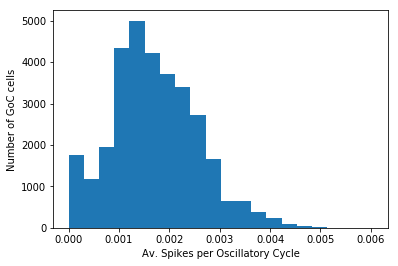

In [10]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GrC

Number of active synapses MF-GrC: 127854
Weight sum histogram MF-GrC: 127854


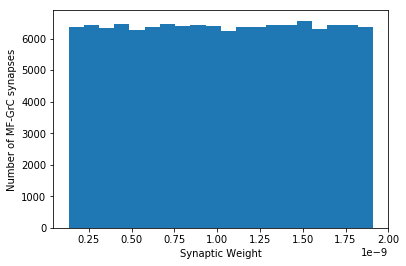

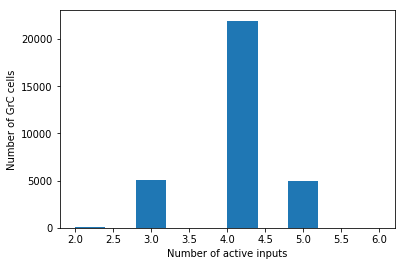

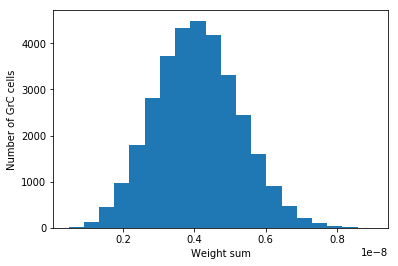

In [11]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.ylabel('Number of MF-GrC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.0
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GrC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.0
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GrC:',numpy.count_nonzero(active_synapses)


Histogram of active synapses connecting input fibers included in the pattern

Number of active MF-GrC synapses also included in pattern 0 : 12738


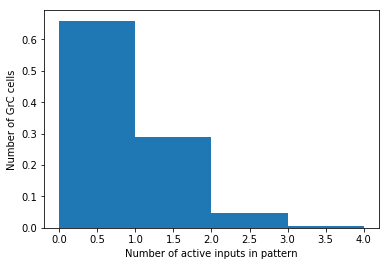

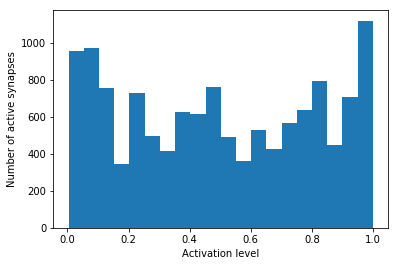

In [12]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
    plt.figure()
    n,_,_=plt.hist(number_of_active_inputs_in_pattern, bins=4, density=True)
    plt.ylabel('Number of GrC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GrC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

## GoC activity analysis

Show the GoC acticity rasterplot

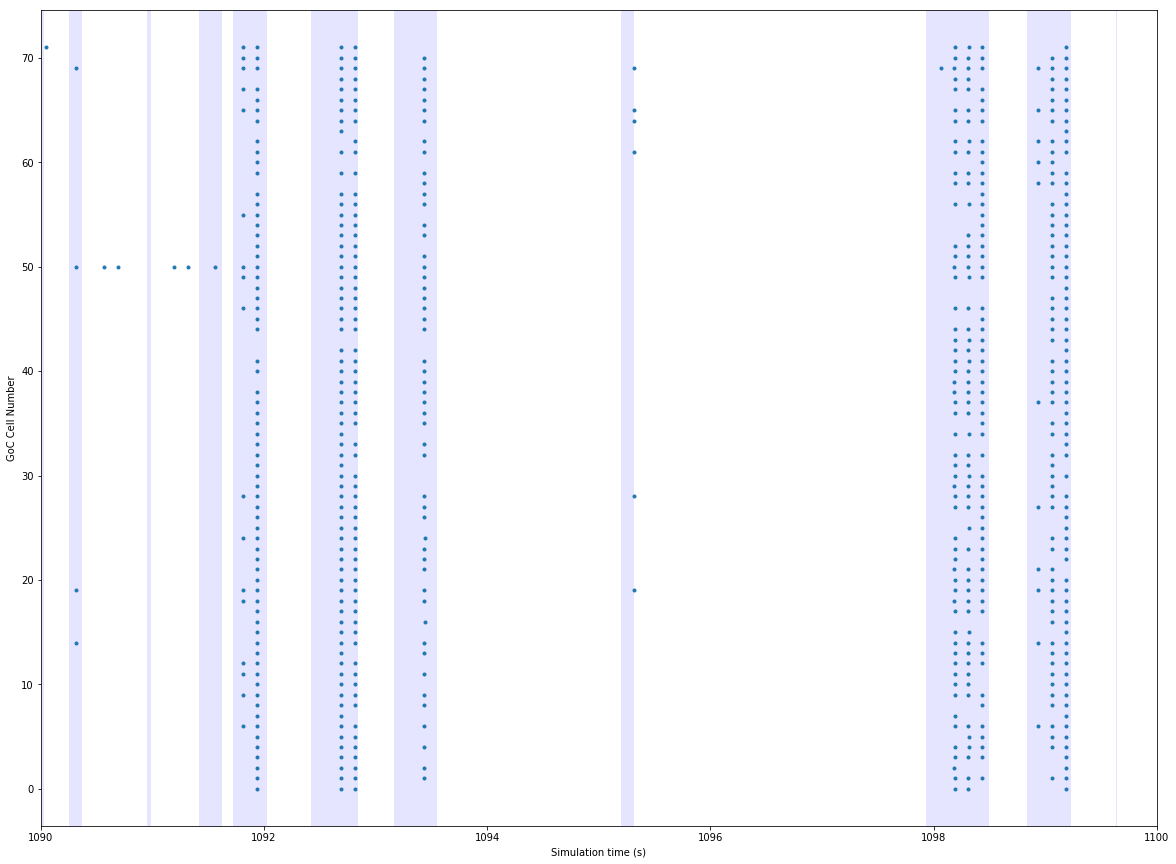

In [13]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

Average spike per oscillatory cycle: 0.21398871527777777 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

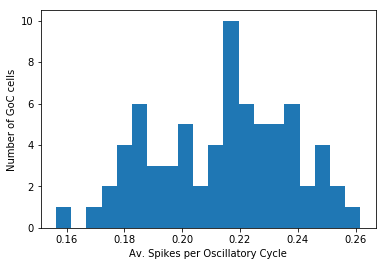

In [14]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between GrC and GoC

Number of active synapses GrC-GoC: 18863
Weight sum histogram GrC-GoC: 18863


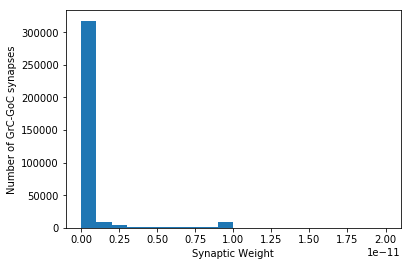

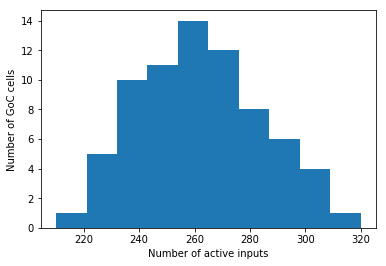

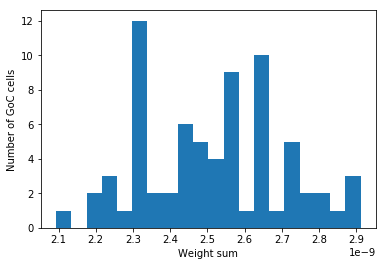

In [15]:
target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,2.0e-11))
plt.ylabel('Number of GrC-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses GrC-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram GrC-GoC:',numpy.count_nonzero(active_synapses)

## GrC-GoC weight analysis

Plot the GrC-GoC weight as a function of the number of MF-GrC synapses in pattern

Text(0.5,1,u'Weight vs Pattern input conductance')

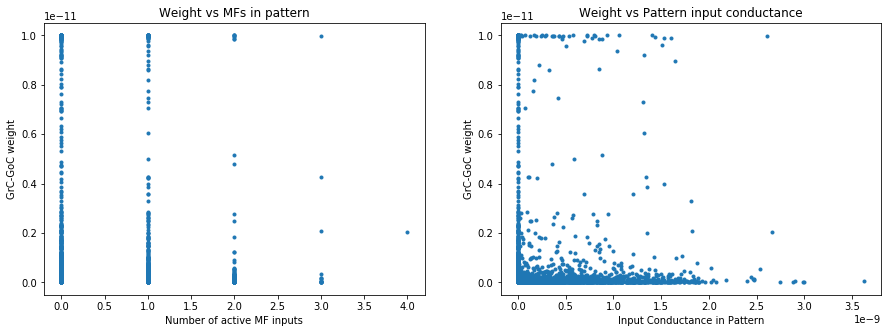

In [16]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==6
# Obtain the list of active GrC inputs
mfgrc_target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
mfgrc_source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
mfgrc_weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
mfgrc_max_weight = numpy.max(mfgrc_weight)
mfgrc_active_synapses = mfgrc_weight>mfgrc_max_weight*0.0
mfgrc_number_of_active_inputs = numpy.bincount(mfgrc_target_cell_index[mfgrc_active_synapses])
# Obtain the list of GrC active inputs in included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgrc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
included_and_active = numpy.logical_and(included_in_pattern,mfgrc_active_synapses)
number_of_active_inputs_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(number_of_active_inputs_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Number of active MF inputs')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs MFs in pattern')

# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgrc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")

# Calculate the normalized activation levels
normalized_activation = mfgrc_weight[included_in_pattern]*simulation.pattern_generator.pattern_activation[pattern_id][yindex]
input_conductance_in_pattern = numpy.bincount(mfgrc_target_cell_index[included_and_active],weights=normalized_activation,minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
# Plot the figure
plt.subplot(1,2,2)
plt.plot(input_conductance_in_pattern[grcgoc_source_cell_index[target_cell_index]],grcgoc_weight[target_cell_index],'.')
plt.xlabel('Input Conductance in Pattern')
plt.ylabel('GrC-GoC weight')
plt.title('Weight vs Pattern input conductance')

Analyze the GrC neurons which are strenghted

Text(0.5,0,u'Number of GrC cells')

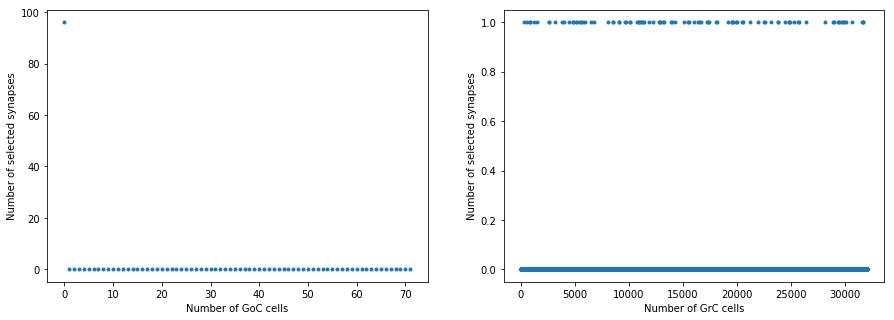

In [17]:
# Obtain the list of active GrC-GoC inputs
grcgoc_target_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].target_index
grcgoc_source_cell_index = simulation.cerebellum.layer_map['grcgocsynapsis'].source_index
grcgoc_weight = simulation.cerebellum.layer_map['grcgocsynapsis'].weights
target_cell_index = grcgoc_target_cell_index==0
grcgoc_max_weight = numpy.max(grcgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(grcgoc_weight>grcgoc_max_weight*0.95,target_cell_index)
target_count = numpy.bincount(grcgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(grcgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='grclayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='grclayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GrC cells')

Analyze the firing pattern of the selected GrCs and GoCs

Text(0.5,0,u'Firing phase (s)')

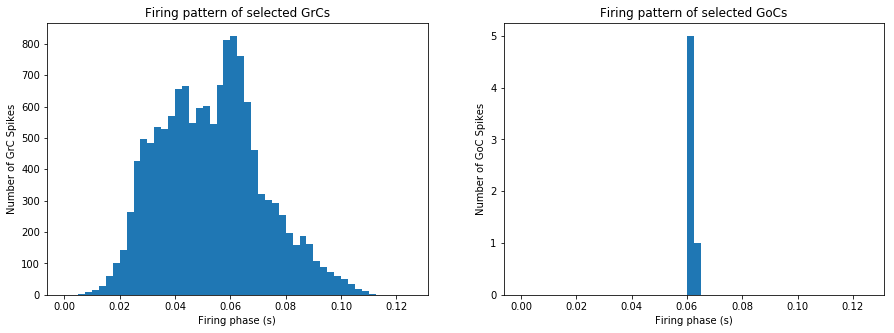

In [18]:
oscillation_frequency = 8.0
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
grc_time,grc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
grc_selected_spikes = numpy.isin(grc_cell,numpy.unique(grcgoc_source_cell_index[selected_synapses]))
cell_id = grc_cell[grc_selected_spikes]
sel_time = grc_time[grc_selected_spikes]
grc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(grc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GrCs')
plt.ylabel('Number of GrC Spikes')
plt.xlabel('Firing phase (s)')
goc_time,goc_cell = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = init_time, 
                                                          end_time = end_time)
goc_selected_spikes = numpy.isin(goc_cell,numpy.unique(grcgoc_target_cell_index[selected_synapses]))
cell_id = goc_cell[goc_selected_spikes]
sel_time = goc_time[goc_selected_spikes]
goc_phase = numpy.mod(sel_time,1./oscillation_frequency)
plt.subplot(1,2,2)
plt.hist(goc_phase,bins=50,range=(0,1./oscillation_frequency))
plt.title('Firing pattern of selected GoCs')
plt.ylabel('Number of GoC Spikes')
plt.xlabel('Firing phase (s)')

## Information Analysis

Mutual information analysis in the GoC layer

In [19]:
simulation.analyze_av_MI()

2018-04-12 19:30:38,912 - P13292 - MemTotal:10278M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-04-12 19:30:38,923 - P13292 - MemTotal:10278M - Simulation - INFO: Analyzing mutual information from time 800.0 to 1100.0 seconds
2018-04-12 19:30:38,934 - P13292 - MemTotal:10278M - Simulation - INFO: Average firing rate in MI analysis: 1.672962962962963Hz
2018-04-12 19:30:38,950 - P13292 - MemTotal:10278M - Simulation - INFO: Individual pattern hit matrix:
2018-04-12 19:30:38,957 - P13292 - MemTotal:10278M - Simulation - INFO: [[0.57846715 0.65875912 0.53467153 0.63686131 0.56751825 0.69160584
  0.70620438 0.52554745 0.52919708 0.6879562  0.61678832 0.69160584
  0.73357664 0.65875912 0.64416058 0.63321168 0.56569343 0.6350365
  0.68248175 0.70437956 0.62956204 0.65875912 0.63868613 0.64416058
  0.68978102 0.68248175 0.68430657 0.66605839 0.55109489 0.5620438
  0.62043796 0.58394161 0.69708029 0.61313869 0.52737226 0.67153285
  0

[array([0.27643766])]